# **FINAL PROJECT (BETA GROUP) - HOTEL BOOKING DEMAND**

**Created by:**

- Azhar Muhammad Fikri Fuadi (JCDS - 0208-008)
- Chasanah Nur Ikayanti (JCDS - 0208-006)
- Muhammad Zulfiqar (JCDS - 0208-013)

**Contents:**

- Business Problem Understanding
- Data Understanding
- Exploratory Data Analysis
- Preprocessing
- Methodology (Analysis / Modeling)
- Conclusion and Recommendation

In [239]:
# algorithm
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier
import lightgbm as lgb

# preprocessing
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_validate
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTENC
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline

# metrics
from sklearn.metrics import f1_score, precision_score, recall_score

# hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# data visualization
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

# evaluate model
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# statistics
from scipy.stats import chi2_contingency
from scipy.stats import normaltest

# miscellaneous
from termcolor import colored

# data manipulation
import pandas as pd
import numpy as np

# saving model
import pickle

# membuat shap
import shap

# warning handling
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)
warnings.filterwarnings("ignore")

# maximizing columns and columns width
pd.set_option("display.max_colwidth", 1)
pd.set_option('display.max_columns', None)

# palette
colorblind_palette = sns.color_palette("colorblind")
custom_palette = colorblind_palette + ["#1AFF1A", "#5D3A9B"]
sns.set_palette(custom_palette)

## **BUSINESS PROBLEM UNDERSTANDING**

**Context:**

Pembatalan pemesanan merupakan aspek kunci dari manajemen pendapatan hotel karena mempengaruhi sistem reservasi kamar. Pembatalan dalam reservasi pemesanan hotel dapat mengakibatkan kerugian bagi pihak hotel terhadap keputusan manajemen permintaan industri hotel. Banyak faktor yang menyebabkan pembatalan pemesanan seperti jadwal perjalanan bisnis, hari libur, lingkungan yang buruk (pandemi) dan faktor lainnya. Memahami alasan pembatalan pemesanan pelanggan merupakan aspek penting bagi pihak hotel. Mengidentifikasi faktor-faktor yang menyebabkan pembatalan pemesanan dapat membantu hotel mengatasi masalah, meningkatkan kepuasan pelanggan, dan menerapkan strategi untuk meminimalkan pembatalan. Hal ini dapat dilakukan pihak hotel untuk menyesuaikan layanan dan penawarannya agar memenuhi ekpetasi keinginan pelanggan. 

Namun hal ini menjadi tantangan untuk memprediksi faktor pembatalan pemesanan. Untuk mengurangi pembatalan reservasi, akan sangat membantu bagi hotel memiliki sistem yang dapat memprediksi apakah suatu pemesanan akan dibatalkan sehingga mereka dapat menawarkan kamar kepada pelanggan lain atau membuat rencana lainnya. Dalam industri perhotelan terdapat standard format yang bernama Passenger Name Record (PNR) yang dikembangkan oleh industri pariwisata dan perjalanan yang digunakan sebagai pengembangan model prediksi untuk mengklasifikasikan kemungkinan pembatalan pemesanan hotel.

**Problem Statement:**

LisGarve City & Resort Hotel adalah sebuah penginapan yang berada di Portugal. Saat ini mengalami penurunan pendapatan karena banyak mengalami pembatalan pemesanan yang menyebabkan kerugian bagi pihak hotel, datasets ini menunjukan banyaknya cancellation sekitar **37%**. Dampak tersebut memberika cukup banyak revenue loss pada pihak hotel akibat dari pesanan yang dibatalkan dapat mencapai **15%**.

Mereka ingin mengetahui tindakan yang harus diambil oleh pihak manajemen hotel untuk mengurangi peluang terjadinya pembatalan pemesanan dengan mengidentifikasi karakteristik yang dimiliki oleh hotel. Banyak faktor yang menyebabkan pembatalan hotel, namun sulit untuk pihak hotel untuk melakukan tracking alasan calon konsumen melakukan pembatalan pemesanan. Sehingga pihak hotel memerlukan kemampuan untuk memprediksi calon konsumen mana yang berpeluang membatalkan pemesanan hotel.

Sumber :
https://revenue-hub.com/three-most-common-trends-impacting-cancellation-rates/

**Goals:**

Tim Data mencoba membantu perusahaan LisGarve City & Resort Hotel menekan biaya marketing atau memberikan kondisi (deposit atau double booking) kepada konsumen yang berpeluang membatalkan pemesanan hotel dengan cara memahami `karakteristik penyebab pembatalan pemesanan hotel` agar tim marketing mengetahui action yang dilakukan lebih terarah, adapun beberapa poin yang dapat dijabarkan untuk menemukan karakteristik tersebut adalah :

1. Bagaimana karakteristik jarak hari dan waktu tertentu mempengaruhi kebiasaan pembatalan pemesanan hotel? (jarak hari antara tanggal pemesanan hingga tanggal dijadwalkan dan bulan tertentu)
2. Bagaimana karakteristik fasilitas dan pelayanan hotel mempengaruhi pelanggan dalam membatalkan pesanan hotel? (jenis hotel, paket makan, permintaan khusus fasilitas/layanan, perbedaan type kamar yang dipesan dan tipe kamar yang tersedia)
3. Bagaimana karakteristik pelanggan yang melakukan pembatalan pemesanan hotel? (jumlah pengunjung, banyak pembatalan sebelumnya, tipe pelanggan, sebelumnya membatalkan/tidak, tipe deposit, asal negara)

Berdasarkan permasalahan yang telah dipaparkan, pihak hotel ingin megetahui karakteristik konsumen yang berpeluang membatalkan pemesanan hotel berdasarkan fitur-fitur yang tersedia, dan mengarahkan target marketing kepada pelanggan yang memiliki karakteristik tersebut agar tim makrketing dapat menekan biaya promosi sehingga memiliki KPI yang baik sehingga mendapat conversion rate yang tinggi untuk menhindari campaign yang tidak terarah. Tim data ingin membuat program yang lebih tepat sasaran kepada calon konsumen yang berpeluang melakukan pembatalan pemesanan dengan karakteristik diatas.

Stakeholder : Tim Marketing LisGarve City & Resort Hotel

**Analytic Approach:**

Pendekatan analisis dilakukan beberapa tahapan proses seperti pengumpulan data yang komprehensif, melakukan data cleaning, dan melakukan pengolahan data untuk mendapatkan hasil analisis. Dengan data ini untuk mendapatkan hasil analisis yang akan digunakan untuk pengambilan keputusan, kami melakukan pengolahan data dengan menggunakan pemodelan machine learning untuk memprediksi calon konsumen berpeluang melakukan pembatalan pemesanan hotel atau tidak.

**Metric Evaluation:**

![alt text](https://www.researchgate.net/publication/328148379/figure/fig1/AS:679514740895744@1539020347601/Model-performance-metrics-Visual-representation-of-the-classification-model-metrics.png)


- *(TP) True Positive*: Pelanggan diprediksi (predict) cancel dan aktualnya (actual) benar-benar cancel.
- *(FP) False Positive*: Pelanggan diprediksi (predict) cancel, tetapi sebenarnya (actual) tidak cancel.
- *(FN) False Negative*: Pelanggan diprediksi (predict) TIDAK cancel, tetapi sebenarnya (actual) cancel.
- *(TN) True Negative*: Pelanggan diprediksi (predict) TIDAK cancel dan sebenarnya (actual) TIDAK cancel.

Untuk megetahui performa suatu model memprediksi targetnya maka kita membutuhkan metric evaluation dengan mengukur nilai errornya. Karena fokus utama kita ingin meningkatkan revenue dengan memaksimalkan model pada CLass Positif dengan mengurangi kerugian yang diakibatkan dari pemesanan hotel yang aktualnya cancel namun diprediksi tidak cancel (False Negative) atau diakibatkan dari pemesan hotel yang aktualnya tidak cancel namun di prediksi cancel (False Positif). Pada percobaan ini kita menggunakan identifikasi sebagai berikut :

Target :
- 0 : Not Canceled
- 1 : Canceled

Action pihak hotel terhadap hasil prediksi:
Cancel : Melakukan *double booking* pada transaksi yang *actual*-nya *cancel* atau memberlakukan deposit pada pemesan hotel, namun harus ditinjau kembali untuk deposit karena akan mengakibatkan kehilangan pelanggan jika deposit yang dibebankan kepada konsumen cukup tinggi.

Type I Error : False Positif (Pelanggan yang aktualnya tidak cancel tetapi diprediksi cancel)
<br>
Konsekuensi : promosi untuk pemesan hotel tidak tepat sasaran, sehingga revenue yang didapatkan tidak maksimal karena tanpa perlu mengeluarkan biaya marketing Hotel bisa mendapatkan revenue booking hotel secara penuh sehingga pihak hotel mendapatkan **penurunan revenue sekitar 11%** (4-5% digital marketing dan marketing convensional 6%) sesuai referensi dibawah. Biaya tersebut juga termasuk biaya dampak dari double booking yang menurut sumber dibawah dapat mengakibatkan negatif review, sehingga tim marketing membutuhkan biaya untuk menimilkan negatif review akibat double booking tersebut

Type II Error : False Negative (Pelanggan yang aktualnya cancel tetapi diprediksi tidak cancel) 
<br>
Konsekuensi : pihak hotel kehilangan potential pelanggan yang membatalkan pesanan dan tentu saja berdampak pada kehilangan revenue. Sehingga, pihak hotel kehilangan **revenue senilai harga booking hotel**.

Untuk memberikan gambaran konsekuensi secara kuantitatif, maka kita akan coba hitung dampak biaya berdasarkan asumsi berikut :
- Rata-rata harga hotel per malam di portugal : **91.85 Euro**
- Rata-rata biaya marketing hotel
- Gaji team marketing
- Dampak negatif review dari double booking 
- poin 2-4 : 11% x harga hotel per malam = 11% x 91.85 = **10 Euro** 

Berdasarkan konsekuensinya, maka sebisa mungkin yang akan kita lakukan adalah membuat model yang dapat memfokuskan kepada model evaluation yang tertarik kepada kelas **Positif** yaitu **(Recall, Presisi, F1)** namun dilihat secara sederhana diatas recall memiliki dampak yang cukup besar karena biaya yang ditanggung pihak hotel akan lebih besar (kehilangan kesempatan seharga satu kamar/malam). Selain itu alasan lain menggunakan recall adalah nilai Type II Error yang memiliki solusi menggunakan deposit dapat membuat Hotel kehilangan pelanggan karena pada dataset mayoritas pelanggan hotel memesan tanpa deposit sehingga dikhawatirkan akan terjadi chargebacks seperti sumber dibawah.

Namun kami harus menelusuri lagi keuntungan bisnis yang maksimal kami akan mencoba beberapa metric dan menyimpulkan metric terbaik untuk Bisnis sebagai metric utama.

sumber :
- https://www.bu.edu/bhr/2015/08/25/digital-marketing-budgets-for-independent-hotels-continuously-shifting-to-remain-competitive-in-the-online-world/
- https://www.orourkehospitality.com/resources/topic/hospitality-digital-marketing/4-tips-for-planning-your-2022-hospitality-marketing-budget/
- https://www.selecthub.com/hotel-management/double-booking/
- https://www.hoteliga.com/en/blog/how-to-minimize-hotel-booking-cancellations-and-chargebacks (deposit)

## **DATA UNDERSTANDING**

Sebelum masuk ke dalam tahap *Exploratory Data Analysis* (EDA), kita perlu mengenali *dataset*-nya terlebih dahulu pada tahap *data understanding*. *Dataset* dengan tema *Hotel Booking Demand* ini berasal dari sebuah [artikel](https://www.sciencedirect.com/science/article/pii/S2352340918315191) yang ditulis oleh Nuno Antonio, Ana Almeida, dan Luis Nunes dalam jurnal *Data in Brief* pada tahun 2019. *Dataset* ini mulanya berjumlah 2 buah *dataset* terkait data *hotel demand* yang terdiri dari *dataset* salah satu *City Hotel* di Lisbon serta *dataset* salah satu *Resort Hotel* di Algarve (kedua hotel terletak di Portugal), yang telah digabungkan menjadi 1 buah *dataset*. Kedua *dataset* tersebut mencakup pemesanan yang dijadwalkan tiba antara tanggal 1 Juli 2015 dan 31 Agustus 2017, serta memiliki struktur yang sama, yaitu dengan 32 kolom dan setiap barisnya merepresentasikan pemesanan hotel. Di karenakan *dataset* ini merupakan data hotel yang riil, semua elemen yang berkaitan dengan identitas hotel atau pemesan telah dihapus. Sumber dari *dataset* tersebut dapat diakses pada tautan [ini](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand/data), sedangkan deskripsi terkait semua *attribute*-nya dapat dilihat pada tabel berikut.

| Attribute | Data Type | Description |
| --- | --- | --- |
| `hotel` | String | Tipe hotel yang disediakan. |
| `is_canceled` | Integer | Nilai yang menunjukkan apakah *booking* hotel dibatalkan (1) atau tidak dibatalkan (0). |
| `lead_time` | Integer | Jarak hari antara tanggal *booking* hotel yang telah masuk ke dalam *Hotel Property Management System* (PMS) hingga tanggal yang dijadwalkan untuk *check-in*. |
| `arrival_date_year` | Integer | Tahun dari tanggal yang dijadwalkan untuk *check-in*. |
| `arrival_date_month` | String | Bulan dari tanggal yang dijadwalkan untuk *check-in*. |
| `arrival_date_week_number` | Integer | Urutan minggu dalam setahun dari tanggal yang dijadwalkan untuk *check-in*. |
| `arrival_date_day_of_month` | Integer | Tanggal yang dijadwalkan untuk *check-in*. |
| `stays_in_weekend_nights` | Integer | Jumlah malam di akhir pekan (Sabtu atau Minggu) yang di-*booking* oleh pemesan untuk menginap di hotel. |
| `stays_in_week_nights` | Integer | Jumlah malam dalam seminggu (Senin - Jum'at) yang di-*booking* oleh pemesan untuk menginap di hotel. |
| `adults` | Integer | Jumlah orang dewasa. |
| `children` | Float | Jumlah anak-anak. |
| `babies` | Integer | Jumlah bayi. |
| `meal` | String | Jenis makanan yang dipesan. Kategori disajikan dalam paket makanan standar perhotelan, yang mana *Undefined* atau SC berarti 'tidak memesan makanan'. |
| `country` | String | Negara asal pemesan. Kategori disajikan dalam format ISO 3166-3:2013 (sekarang [ISO 3166-3:2020](https://www.iso.org/standard/72484.html)). |
| `market_segment` | String | Pemilihan untuk segmentasi pasar (asumsi: segmentasi yang dibuat oleh pihak hotel). Dalam kategori, istilah "TA" ialah singkatan dari "Travel Agents", sedangkan "TO" ialah singkatan dari "Tour Operators". |
| `distribution_channel` | String | Saluran distribusi untuk setiap *booking* hotel. Dalam kategori, istilah "TA" ialah singkatan dari "Travel Agents", sedangkan "TO" ialah singkatan dari "Tour Operators". | |
| `is_repeated_guest` | Integer | Nilai yang menunjukkan apakah nama pemesan berasal dari pemesan yang berulang (1) atau tidak berulang (0). |
| `previous_cancellations` | Integer | Jumlah *booking* hotel sebelumnya yang dibatalkan oleh pemesan sebelum *booking* hotel terkini. Jika tidak ada profil pelanggan yang terkait dengan seluruh pemesanan, maka nilainya akan diatur ke 0. Sementara itu, jika ada profil pelanggan yang terkait dengan seluruh pemesanan, maka nilainya adalah jumlah seluruh pemesanan dengan profil sama yang dibuat sebelum pemesanan saat ini dan dibatalkan. |
| `previous_bookings_not_canceled` | Integer | Jumlah *booking* hotel sebelumnya yang tidak dibatalkan oleh pemesan sebelum *booking* hotel terkini. Jika tidak ada profil pelanggan yang terkait dengan seluruh pemesanan, maka nilainya akan diatur ke 0. Sementara itu, jika ada profil pelanggan yang terkait dengan seluruh pemesanan, maka nilainya adalah jumlah seluruh pemesanan dengan profil sama yang dibuat sebelum pemesanan saat ini dan tidak dibatalkan. |
| `reserved_room_type` | String | Kode untuk tipe kamar yang disediakan. Kode disajikan sebagai pengganti sebutan untuk alasan anonimitas. |
| `assigned_room_type` | String | Kode untuk tipe kamar yang ditetapkan untuk pemesanan. Terkadang tipe kamar yang ditetapkan berbeda dengan tipe kamar yang dipesan karena alasan operasional hotel (misalnya pemesanan berlebih), atau karena permintaan pelanggan. Kode disajikan sebagai pengganti sebutan untuk alasan anonimitas. |
| `booking_changes` | Integer | Jumlah perubahan yang dilakukan pada *booking* hotel sejak masuk ke dalam *Hotel Property Management System* (PMS) hingga saat *check-in* atau pembatalan. |
| `deposit_type` | String | Indikasi apakah pemesan melakukan deposit untuk menjamin *booking* hotel. Variabel ini hanya memiliki 3 kategori, pertama adalah *No Deposit* yang berarti 'tidak ada deposit yang dilakukan', kedua ialah *Non Refund* yang berarti 'deposit dilakukan senilai total biaya menginap', dan ketiga yaitu *Refundable* yang berarti 'deposit dilakukan dengan nilai di bawah total biaya menginap'. |
| `agent` | Float | ID dari *travel agency* yang melakukan *booking* hotel. |
| `company` | Float | ID dari perusahaan yang melakukan *booking* hotel atau yang bertanggung jawab untuk membayar *booking*-nya. ID ditampilkan sebagai pengganti sebutan untuk alasan anonimitas. |
| `days_in_waiting_list` | Integer | Jumlah hari untuk setiap *booking* hotel yang masuk ke dalam *waiting list* sebelum akhirnya dikonfirmasi kepada pemesan. |
| `customer_type` | String | Jenis *booking* hotel, dengan asumsi *Contract* berarti 'ketika *booking* hotel memiliki jatah atau jenis *Contract* lain yang terkait dengannya', *Group* berarti 'ketika *booking* hotel terkait dengan *Group*', *Transient* berarti 'ketika *booking* hotel bukan bagian dari *Group* atau *Contract*, dan tidak terikat dengan *transient booking* lainnya', serta *Transient-Party* berarti 'ketika *booking* hotel *Transient*, tetapi terkait dengan setidaknya *transient booking* lainnya'. |
| `adr` | Float | Rata-rata tarif harian atau *Average Daily Rate* yang ditentukan untuk membagi jumlah semua transaksi dengan jumlah malam yang di-*booking*. |
| `required_car_parking_spaces` | Integer | Jumlah ruang parkir mobil yang dibutuhkan oleh pemesan. |
| `total_of_special_requests` | Integer | Jumlah permintaan khusus yang dibuat oleh pemesan. Misalnya *twin bed* atau *high floor*. |
| `reservation_status` | String | Status *booking* hotel terakhir, dengan asumsi *Canceled* berarti '*booking* dibatalkan oleh pemesan', *Check-Out* berarti 'pemesan telah melakukan *check-in* namun telah meninggalkan hotel atau *check-out*', serta *No Show* berarti 'pemesan tidak melakukan *check-in* dan menginformasikan alasannya kepada hotel'. |
| `reservation_status_date` | String | Tanggal saat status terakhir ditetapkan. Variabel ini dapat digunakan bersamaan dengan kolom `reservation_status` untuk memahami kapan *booking* hotel dibatalkan atau kapan pemesan melakukan *check-out* dari hotel. |

In [2]:
# menampilkan isi dari dataset
df_source = pd.read_csv("hotel_bookings.csv")
df = df_source.copy()
display(df.head(), df.tail())

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel  0            342        2015               July                
1  Resort Hotel  0            737        2015               July                
2  Resort Hotel  0            7          2015               July                
3  Resort Hotel  0            13         2015               July                
4  Resort Hotel  0            14         2015               July                

   arrival_date_week_number  arrival_date_day_of_month  \
0  27                        1                           
1  27                        1                           
2  27                        1                           
3  27                        1                           
4  27                        1                           

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0  0                        0                     2       0.0       0        
1  0                        0                     2       0.0       0        
2  0                        1                     1       0.0       0        
3  0                        1                     1       0.0       0        
4  0                        2                     2       0.0       0        

  meal country market_segment distribution_channel  is_repeated_guest  \
0  BB   PRT     Direct         Direct               0                   
1  BB   PRT     Direct         Direct               0                   
2  BB   GBR     Direct         Direct               0                   
3  BB   GBR     Corporate      Corporate            0                   
4  BB   GBR     Online TA      TA/TO                0                   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0  0                       0                               C                   
1  0                       0                               C                   
2  0                       0                               A                   
3  0                       0                               A                   
4  0                       0                               A                   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0  C                  3                No Deposit  NaN    NaN        
1  C                  4                No Deposit  NaN    NaN        
2  C                  0                No Deposit  NaN    NaN        
3  A                  0                No Deposit   304.0 NaN        
4  A                  0                No Deposit   240.0 NaN        

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0  0                     Transient     0.0   0                             
1  0                     Transient     0.0   0                             
2  0                     Transient     75.0  0                             
3  0                     Transient     75.0  0                             
4  0                     Transient     98.0  0                             

   total_of_special_requests reservation_status reservation_status_date  
0  0                          Check-Out          2015-07-01              
1  0                          Check-Out          2015-07-01              
2  0                          Check-Out          2015-07-02              
3  0                          Check-Out          2015-07-02              
4  1                          Check-Out          2015-07-03

hotel  is_canceled  lead_time  arrival_date_year  \
119385  City Hotel  0            23         2017                
119386  City Hotel  0            102        2017                
119387  City Hotel  0            34         2017                
119388  City Hotel  0            109        2017                
119389  City Hotel  0            205        2017                

       arrival_date_month  arrival_date_week_number  \
119385  August             35                         
119386  August             35                         
119387  August             35                         
119388  August             35                         
119389  August             35                         

        arrival_date_day_of_month  stays_in_weekend_nights  \
119385  30                         2                         
119386  31                         2                         
119387  31                         2                         
119388  31                         2                         
119389  29                         2                         

        stays_in_week_nights  adults  children  babies meal country  \
119385  5                     2       0.0       0       BB   BEL      
119386  5                     3       0.0       0       BB   FRA      
119387  5                     2       0.0       0       BB   DEU      
119388  5                     2       0.0       0       BB   GBR      
119389  7                     2       0.0       0       HB   DEU      

       market_segment distribution_channel  is_repeated_guest  \
119385  Offline TA/TO  TA/TO                0                   
119386  Online TA      TA/TO                0                   
119387  Online TA      TA/TO                0                   
119388  Online TA      TA/TO                0                   
119389  Online TA      TA/TO                0                   

        previous_cancellations  previous_bookings_not_canceled  \
119385  0                       0                                
119386  0                       0                                
119387  0                       0                                
119388  0                       0                                
119389  0                       0                                

       reserved_room_type assigned_room_type  booking_changes deposit_type  \
119385  A                  A                  0                No Deposit    
119386  E                  E                  0                No Deposit    
119387  D                  D                  0                No Deposit    
119388  A                  A                  0                No Deposit    
119389  A                  A                  0                No Deposit    

        agent  company  days_in_waiting_list customer_type     adr  \
119385  394.0 NaN       0                     Transient     96.14    
119386  9.0   NaN       0                     Transient     225.43   
119387  9.0   NaN       0                     Transient     157.71   
119388  89.0  NaN       0                     Transient     104.40   
119389  9.0   NaN       0                     Transient     151.20   

        required_car_parking_spaces  total_of_special_requests  \
119385  0                            0                           
119386  0                            2                           
119387  0                            4                           
119388  0                            0                           
119389  0                            2                           

       reservation_status reservation_status_date  
119385  Check-Out          2017-09-06              
119386  Check-Out          2017-09-07              
119387  Check-Out          2017-09-07              
119388  Check-Out          2017-09-07              
119389  Check-Out          2017-09-07

In [3]:
# menampilkan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Secara garis besar, *dataset* di atas berisi kumpulan informasi mengenai pemesanan *City Hotel* dan *Resort Hotel*, serta mencakup informasi lainnya seperti waktu kedatangan yang dijadwalkan, lama menginap, jumlah orang yang akan melakukan *check-in*, status pemesanan, dll. Dalam *dataset* tersebut, setiap baris mewakili 1 data transaksi yang totalnya berisi 119.390 baris data serta terdapat 32 kolom. Dari informasi di atas pun, terlihat secara sekilas bahwa *dataset* memiliki *missing value* pada kolom `children`, `country`, `agent`, serta `company`, yang mana penanganan terhadap *missing value* tersebut akan dilakukan pada tahap *preprocessing*.

In [4]:
# melakukan skimming pada dataset
pd.DataFrame({
    "Attribute"                                 : df.columns.values,
    "Data Type"                                 : df.dtypes.values,
    "Number of Unique"                          : df.nunique().values,
    "Number of Duplicate"                       : df.duplicated().sum(),
    "Missing Value (%)"                         : df.isna().mean().values * 100,
    "Negative Value (%)"                        : [len(df[col][df[col] < 0]) / len(df) * 100 if col in df.select_dtypes(include = np.number).columns else 0 for col in df.columns],
    "'Zero' Value in Numerical Feature (%)"     : [len(df[col][df[col] == 0]) / len(df) * 100 if col in df.select_dtypes(include = np.number).columns else 0 for col in df.columns],
    "'Zero' Value in Categorical Feature (%)"   : [len(df[col][df[col] == "0"]) / len(df) * 100 if col in df.select_dtypes(include = np.object_).columns else 0 for col in df.columns],
    "Unique Sample"                             : [df[col].unique() for col in df.columns]}
).round(4)

Attribute Data Type  Number of Unique  \
0   hotel                           object    2                  
1   is_canceled                     int64     2                  
2   lead_time                       int64     479                
3   arrival_date_year               int64     3                  
4   arrival_date_month              object    12                 
5   arrival_date_week_number        int64     53                 
6   arrival_date_day_of_month       int64     31                 
7   stays_in_weekend_nights         int64     17                 
8   stays_in_week_nights            int64     35                 
9   adults                          int64     14                 
10  children                        float64   5                  
11  babies                          int64     5                  
12  meal                            object    5                  
13  country                         object    177                
14  market_segment                  object    8                  
15  distribution_channel            object    5                  
16  is_repeated_guest               int64     2                  
17  previous_cancellations          int64     15                 
18  previous_bookings_not_canceled  int64     73                 
19  reserved_room_type              object    10                 
20  assigned_room_type              object    12                 
21  booking_changes                 int64     21                 
22  deposit_type                    object    3                  
23  agent                           float64   333                
24  company                         float64   352                
25  days_in_waiting_list            int64     128                
26  customer_type                   object    4                  
27  adr                             float64   8879               
28  required_car_parking_spaces     int64     5                  
29  total_of_special_requests       int64     6                  
30  reservation_status              object    3                  
31  reservation_status_date         object    926                

    Number of Duplicate  Missing Value (%)  Negative Value (%)  \
0   31994                0.0000             0.0000               
1   31994                0.0000             0.0000               
2   31994                0.0000             0.0000               
3   31994                0.0000             0.0000               
4   31994                0.0000             0.0000               
5   31994                0.0000             0.0000               
6   31994                0.0000             0.0000               
7   31994                0.0000             0.0000               
8   31994                0.0000             0.0000               
9   31994                0.0000             0.0000               
10  31994                0.0034             0.0000               
11  31994                0.0000             0.0000               
12  31994                0.0000             0.0000               
13  31994                0.4087             0.0000               
14  31994                0.0000             0.0000               
15  31994                0.0000             0.0000               
16  31994                0.0000             0.0000               
17  31994                0.0000             0.0000               
18  31994                0.0000             0.0000               
19  31994                0.0000             0.0000               
20  31994                0.0000             0.0000               
21  31994                0.0000             0.0000               
22  31994                0.0000             0.0000               
23  31994                13.6862            0.0000               
24  31994                94.3069            0.0000               
25  31994                0.0000             0.0000               
26  31994                0.0000             0.0000              

*Output* di atas menampilkan hasil dari proses *skimming* pada keseluruhan *dataset*. *Skimming* di sini bertujuan untuk mengetahui sekaligus memahami *dataset* dengan cepat agar mendapatkan gambaran secara umumnya. Untuk lebih jelasnya mari kita lihat tabel di bawah ini.

| Term | Description |
| --- | --- |
| Data Type | Mayoritas *feature* kategorikal memiliki tipe data ***string***, sedangkan seluruh *feature* numerikal memiliki tipe data ***integer*** atau ***float***. Perlu diperhatikan bahwasanya tidak semua kolom yang *sample*-nya numerik termasuk ke dalam *feature* numerikal, akan tetapi ada juga kolom yang *sample*-nya numerik namun bersifat kategorikal, contohnya seperti *sample* pada kolom `is_canceled`, `is_repeated_guest`, dsb. |
| Number of Unique | Terdapat variasi nilai unik yang cukup baik dari *feature* kategorikal yang mengindikasikan bahwa *dataset*-nya cukup beragam. |
| Number of Duplicate | Adapun data duplikat yang terdapat pada *dataset*, yaitu sebanyak 31.994 baris data. Hal ini mungkin memerlukan penyelidikan lebih lanjut untuk mengetahui apakah data tersebut benar-benar duplikat atau hanya pengulangan yang valid. |
| Missing Value (%) | Terlihat secara jelas bahwa *dataset* memiliki *missing value* pada kolom `children` (0,003%), `country` (0,4%), `agent` (13,6%), serta `company` (94,3%), yang mana penanganannya akan dilakukan pada tahap *preprocessing*. |
| Negative Value (%) | *Term* ini bertujuan untuk menampilkan nilai yang negatif pada *feature* numerikal, yang mana hal itu dirasa sesuai untuk tipe data dan kolom seperti `adr`. Jika dilihat lebih teliti, kolom tersebut memiliki 0,0008% data yang nilainya negatif. |
| 'Zero' Value in Numerical & Categorical Features (%) | *Output* pada *term* ini cukup menjelaskan bahwa 96,8% pemesan **bukan** merupakan tamu yang datang berulang atau *repeated guest*, artinya hanya 3,2% pemesan yang merupakan *repeated guest*. Selain itu, *output*-nya cukup memperlihatkan juga betapa banyaknya transaksi yang di-*cancel* atau dibatalkan. Menilik transaksi yang tidak dibatalkanya sebesar 62,9%, itu berarti sekitar 37,1% transaksi berhasil dibatalkan. Tambahannya, terdapat data lain yang bernilai 0, di mana data-data tersebut akan di-*breakdown* lebih detail pada tahap EDA. Namun yang jelas, pada *attribute* yang bertipe data *string* tidak terdapat data yang bernilai 0. |
| Unique Sample | *Term* ini menampilkan *sample* yang sesuai dengan nilai uniknya. Setiap *feature* kategorikal memiliki beragam *sample* yang menunjukkan bahwa *dataset* terstruktur dengan cukup baik. |

In [5]:
# menampilkan descriptive statistics dari feature numerikal dan kategorikal
display(df.describe(), df.describe(include = "object"))

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000  119390.000000       
mean   0.370416       104.011416     2016.156554         
std    0.482918       106.863097     0.707476            
min    0.000000       0.000000       2015.000000         
25%    0.000000       18.000000      2016.000000         
50%    0.000000       69.000000      2016.000000         
75%    1.000000       160.000000     2017.000000         
max    1.000000       737.000000     2017.000000         

       arrival_date_week_number  arrival_date_day_of_month  \
count  119390.000000             119390.000000               
mean   27.165173                 15.798241                   
std    13.605138                 8.780829                    
min    1.000000                  1.000000                    
25%    16.000000                 8.000000                    
50%    28.000000                 16.000000                   
75%    38.000000                 23.000000                   
max    53.000000                 31.000000                   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count  119390.000000            119390.000000         119390.000000   
mean   0.927599                 2.500302              1.856403        
std    0.998613                 1.908286              0.579261        
min    0.000000                 0.000000              0.000000        
25%    0.000000                 1.000000              2.000000        
50%    1.000000                 2.000000              2.000000        
75%    2.000000                 3.000000              2.000000        
max    19.000000                50.000000             55.000000       

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000  119390.000000       
mean   0.103890       0.007949       0.031912            
std    0.398561       0.097436       0.175767            
min    0.000000       0.000000       0.000000            
25%    0.000000       0.000000       0.000000            
50%    0.000000       0.000000       0.000000            
75%    0.000000       0.000000       0.000000            
max    10.000000      10.000000      1.000000            

       previous_cancellations  previous_bookings_not_canceled  \
count  119390.000000           119390.000000                    
mean   0.087118                0.137097                         
std    0.844336                1.497437                         
min    0.000000                0.000000                         
25%    0.000000                0.000000                         
50%    0.000000                0.000000                         
75%    0.000000                0.000000                         
max    26.000000               72.000000                        

       booking_changes          agent      company  days_in_waiting_list  \
count  119390.000000    103050.000000  6797.000000  119390.000000          
mean   0.221124         86.693382      189.266735   2.321149               
std    0.652306         110.774548     131.655015   17.594721              
min    0.000000         1.000000       6.000000     0.000000               
25%    0.000000         9.000000       62.000000    0.000000               
50%    0.000000         14.000000      179.000000   0.000000               
75%    0.000000         229.000000     270.000000   0.000000               
max    21.000000        535.000000     543.000000   391.000000             

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000  119390.000000                119390.000000              
mean   101.831122     0.062518                     0.571363                   
std    50.535790      0.245291                     0.792798                   
min   -6.380000       0.000000                     0.000000                   
25%    69.290000      0.000000                     0.000000                   
50%    94.575000   

hotel arrival_date_month    meal country market_segment  \
count   119390      119390             119390  118902  119390          
unique  2           12                 5       177     8               
top     City Hotel  August             BB      PRT     Online TA       
freq    79330       13877              92310   48590   56477           

       distribution_channel reserved_room_type assigned_room_type  \
count   119390               119390             119390              
unique  5                    10                 12                  
top     TA/TO                A                  A                   
freq    97870                85994              74053               

       deposit_type customer_type reservation_status reservation_status_date  
count   119390       119390        119390             119390                  
unique  3            4             3                  926                     
top     No Deposit   Transient     Check-Out          2015-10-21              
freq    104641       89613         75166              1461

Selain *skimming*, adapun *descriptive statistics* yang bertujuan untuk meringkas dan mengorganisir karakteristik dasar dari suatu *dataset* secara komprehensif agar lebih mudah untuk dipahami. Proses ini membantu kita dalam menyajikan data dengan jelas dan membuat kesimpulan awal tentang karakteristik data yang diamati, baik itu data yang terdapat pada *feature* kategorikal maupun numerikal. Akan tetapi, kita tidak bisa mengatakan bahwa ***output* pertama merupakan *output* untuk *feature* numerikal, sedangkan *output* kedua untuk *feature* kategorikal**. Kita perlu melihat secara detail mengenai kolom mana yang benar-benar termasuk ke dalam *feature* numerikal dan kategorikal dengan cara melihat *sample*-nya. Maka dari itu, kita akan mencoba untuk mengelompokkan setiap *attribute*-nya ke dalam 2 tabel, sekaligus menjelaskan temuan dari *output* di atas yang mungkin akan didukung oleh *output* dari proses *skimming*.

***Numerical Features***

| Attribute | Insight |
| --- | --- |
| `lead_time` | Periode waktu terpendek dari tanggal melakukan *booking* hingga tanggal *check-in* yaitu **0** hari, sedangkan periode waktu terpanjang adalah **737** hari. Kita juga bisa mengetahui rata-rata jarak waktunya ada di angka **104** hari. |
| `stays_in_weekend_nights` | **19** malam merupakan angka tertinggi yang pernah di-*booking* oleh pemesan untuk menginap saat *weekend* (Sabtu atau Minggu). |
| `stays_in_week_nights` | **50** malam merupakan angka tertinggi yang pernah di-*booking* oleh pemesan untuk menginap selama *weekday* (Senin - Jum'at). |
| `adults` | Angka tertinggi orang dewasa yang pernah tercatat saat melakukan *booking* hotel mencapai **50** orang. |
| `children` | Sekitar 92,8% data *booking* hotel dipesan dengan tidak membawa atau bahkan tidak berniat membawa anak-anak. Meski begitu, angka tertinggi anak-anak yang pernah tercatat dalam data *booking* hotel berjumlah **10** anak-anak. |
| `babies` | Hampir semua pemesan yang melakukan *booking* hotel tidak membawa atau bahkan tidak berniat membawa bayi (sekitar 99,2% data), yang berarti sekitar 0,8% sisanya membawa atau berniat membawa bayi saat *check-in* hotel. Di dalam 0,8% data tersebut, tercatat bahwa angka tertinggi bayi yang pernah atau akan dibawa oleh pemesan mencapai **10** bayi. |
| `previous_cancellations` | Seorang pemesan pernah melakukan pembatalan *booking* hotel sebanyak **26** kali. Hal tersebut merupakan jumlah pembatalan terbanyak yang pernah ada. |
| `previous_bookings_not_canceled` | Rekor tertinggi seorang pelanggan dalam mempertahankan reservasinya tanpa melakukan pembatalan *booking* yaitu sebanyak **72** kali.|
| `booking_changes` | Perubahan data *booking* terbanyak yang pernah dilakukan oleh seorang pelanggan adalah **21** kali.  |
| `days_in_waiting_list` | Sebanyak **391** hari adalah periode terpanjang yang dicatat dalam *waiting list* sebelum akhirnya dikonfirmasi kepada pemesan. |
| `adr` | Rata-rata tarif harian atau *Average Daily Rate* terendah ada di angka **-6,38** EUR, sedangkan yang tertinggi ada di angka **5.400** EUR. |
| `required_car_parking_spaces` | Angka tertinggi yang pernah dicatat untuk jumlah ruang parkir mobil mencapai **8** buah. |
| `total_of_special_requests` | Terdapat sejumlah 6 permintaan khusus yang pernah dibuat oleh pemesan, dari mulai **0** hingga **5**. |

***Categorical Features***

| Attribute | Insight |
| --- | --- |
| `hotel` | Tipe hotel yang paling banyak di-*booking* yaitu ***City Hotel*** dengan total sebanyak 79.330 pemesanan. |
| `is_canceled` | Kolom ini merupakan *target* yang nilainya hanya **0** dan **1**. Merujuk pada tabel *skimming*, persentase *booking* yang tidak dibatalkan (62,9%) jauh lebih besar jika dibandingkan dengan yang dibatalkan (37,1%). |
| `arrival_date_year` | *Dataset* mencakup pemesanan yang dijadwalkan tiba di antara tahun **2015** dan **2017**. |
| `arrival_date_month` | Pemesan lebih sering menjadwalkan *check-in* hotel untuk bulan **August**. |
| `arrival_date_week_number` | Jadwal kedatangan tamu selalu ada di setiap minggunya (dalam setahun), dari mulai minggu ke-**1** hingga minggu ke-**53**. |
| `arrival_date_day_of_month`| Selalu ada pemesan yang menjadwalkan untuk *check-in* hotel di **setiap harinya**. |
| `meal` | Paket makanan **BB** atau [*Bed and Breakfast*](https://www.arbat-house.com/en/articles/types-of-food-in-hotels/) lebih sering dipilih saat melakukan *booking* hotel, dengan persentase pemesanannya mencapai lebih dari 75% dari keseluruhan data. |
| `country` | Banyaknya pemesan yang melakukan *booking* hotel berasal dari negara dengan kode **PRT** atau [Portugal](https://www.iso.org/obp/ui/#iso:code:3166:PT). Hal itu sangatlah masuk akal, lantaran *dataset* ini merupakan *dataset* yang berasal dari data sebuah hotel dan resort di negara tersebut. |
| `market_segment` | Mayoritas *booking* hotel dilakukan melalui *website* atau *travel marketplace* yang menyediakan layanan pemesanan hotel. Hal itu di konfirmasi dengan ***Online TA*** atau [*Online Travel Agency* (OTA)](https://welcome.expediagroup.com/en/resources/hotel-distribution-strategy-resources-tips/otas-work-use-one#:~:text=An%20online%20travel%20agency%20(OTA)%20is%20a%20web%2Dbased,more%2C%20directly%20with%20travel%20suppliers.) sebagai kategori yang paling sering muncul pada *dataset*. |
| `distribution_channel` | Melihat data yang paling sering muncul pada kolom `market_segment` adalah ***Online TA***, secara tidak langsung saluran distribusi yang paling banyak dipilih dalam memesan hotel pun juga berasal dari *travel agency*, baik itu yang dilakukan secara *online* maupun *offline*. Dari pernyataan tersebut, sangatlah masuk akal jika **TA/TO** menjadi kategori terbanyak pada *dataset*. |
| `is_repeated_guest` | Sekitar 96,8% pemesan **bukan** berasal dari tamu yang datang berulang atau *repeated guest* jika kita merujuk pada tabel *skimming*. |
| `reserved_room_type` | Tipe kamar yang paling banyak dipilih saat melakukan *booking* adalah tipe kamar **A**. |
| `assigned_room_type` | Sama halnya dengan tipe kamar yang paling banyak dipesan saat proses *booking* hotel, kamar yang ditetapkan oleh pihak hotel untuk para pemesan pun juga kebanyakan bertipe **A**. Meski begitu, tidak semua tipe kamar yang dipesan berakhir sama dengan yang ditetapkan oleh pihak hotel, seperti contoh pada tipe kamar **A** yang mengalami penurunan frekuensi dari yang mulanya 85.994 data menjadi hanya 74.053 data yang ditetapkan dengan tipe yang sama. |
| `deposit_type` | Lebih dari 85% pemesan memilih untuk tidak deposit atau ***No Deposit*** saat melakukan *booking* hotel. |
| `agent` | Terdapat **333** ID *travel agency* yang pernah melakukan *booking* hotel. |
| `company` | Terdapat **352** ID perusahaan yang pernah melakukan *booking* hotel atau yang bertanggung jawab untuk membayar *booking*. |
| `customer_type` | Tipe *customer* yang paling sering melakukan *booking* adalah ***Transient***, yang berarti 75% *customer* hanya memesan hotel untuk kebutuhan [jangka waktu yang cukup pendek](https://www.xotels.com/en/glossary/transient). |
| `reservation_status` | Lebih dari 60% *booking* hotel tidak dibatalkan atau pemesan berhasil melakukan ***Check-Out***. Hal ini dapat didukung oleh tabel *skimming* yang menunjukkan bahwa *booking* tidak dibatalkan (0) memiliki persentase sebesar 62,9% dari keseluruhan data. |
| `reservation_status_date` | Tanggal **21 Oktober 2015** menjadi tanggal yang paling banyak memiliki kejelasan terkait *booking* hotel, baik itu transaksi yang dibatalkan hingga transaksi yang berhasil. |

***Additional Insights***

- *Attribute* pada *feature* kategorikal serta numerikal sebelum dilakukan proses *cleaning* masing-masing berjumlah **19** dan **13** kolom.
- Semua kolom pada *feature* numerikal berisi data diskrit, terkecuali kolom `adr` yang memiliki data kontinu.
- Semua kolom pada *feature* kategorikal berisi data nominal.
- *Target* untuk pemodelan *machine learning* adalah kolom `is_canceled`.
- Jadwal *check-in* dipisah menjadi 3 kolom (`arrival_date_year`, `arrival_date_month`, dan `arrival_date_day_of_month`), yang mana hal tersebut dapat memudahkan kita dalam melakukan analisis dan *encoding* saat pemodelan *machine learning*. Meski begitu, jika kita ingin menampilkan *trend* atau pola dari waktu ke waktu, kita perlu menyatukannya menjadi 1 *feature* dengan membuat kolom baru dan men-*set* tipe datanya menjadi *datetime*.
- Tipe data pada kolom `children`, `agent`, dan `company` masih berbentuk *float* (seharusnya *integer*), sehingga kita perlu mengubahnya pada tahap *preprocessing*.
- Jika merujuk pada deskripsi kolom `meal`, di situ dijelaskan bahwa *Undefined* atau [*Self Catering*](https://www.arbat-house.com/en/articles/types-of-food-in-hotels/) (SC) berarti 'tidak memesan makanan', yang artinya terdapat 2 kategori berbeda namun memiliki nilai atau *value* yang sama. Maka dari itu, kita memutuskan untuk mengganti *Undefined* menjadi SC pada tahap *preprocessing* nanti.
- Terdapat data yang bernilai minus pada kolom `adr` yang dirasa kurang relevan untuk sebuah rata-rata tarif harian, sehingga kita perlu menanganinya pada tahap *preprocessing* nanti. 
- Sama halnya dengan jadwal *check-in*, kolom `reservation_status_date` pun juga harus diubah tipe datanya menjadi *datetime* jika kita ingin menampilkan *trend* atau pola dari waktu ke waktu. Selain itu, kita perlu membuat 2 kolom baru yang berisi tahun dan bulan dari kolom tersebut, yang mana tujuannya yaitu untuk memudahkan kita dalam melakukan analisis. Sedangkan untuk keperluan *modeling*, kita tidak perlu menggunakan kolom tersebut di karenakan data yang tercantum muncul setelah keterangan pemesanannya dibatalkan ataupun tidak dibatalkan.
- Kolom `arrival_date_day_of_month` tidak akan diikutsertakan dalam pengecekan distribusi data di karenakan *sample*-nya yang kurang relevan untuk divisualisasikan, begitu pun juga dengan kolom `reservation_status_date` yang akan diwakilkan menggunakan kolom baru (`reservation_status_date_year` dan `reservation_status_date_month`) hasil *splitting* setiap *sample*-nya.
- Berikut adalah *feature* numerikal yang akan dicek distribusi datanya, di antaranya meliputi:
    - `lead_time`
    - `stays_in_weekend_nights`
    - `stays_in_week_nights`
    - `adults`
    - `children`
    - `babies`
    - `previous_cancellations`
    - `previous_bookings_not_canceled`
    - `booking_changes`
    - `days_in_waiting_list`
    - `adr`
    - `required_car_parking_spaces`
    - `total_of_special_requests`
- Sedangkan *feature* kategorikal yang akan dicek distribusi datanya, di antaranya meliputi:
    - `hotel`
    - `is_canceled`
    - `arrival_date_year`
    - `arrival_date_month`
    - `arrival_date_week_number`
    - `meal`
    - `country`
    - `market_segment`
    - `distribution_channel`
    - `is_repeated_guest`
    - `reserved_room_type`
    - `assigned_room_type`
    - `deposit_type`
    - `agent`
    - `company`
    - `customer_type`
    - `reservation_status`
    - `reservation_status_date_year` (kolom baru)
    - `reservation_status_date_month` (kolom baru)

## **EXPLORATORY DATA ANALYSIS**

Agar dapat mempermudah analisis serta proses visualisasi pada tahap EDA, kita akan membuat 2 kolom baru yang berisi tahun dan bulan yang mengacu pada kolom `reservation_status_date`. Setelah prosesnya selesai, barulah kita akan memisahkan setiap *feature* numerikal dan kategorikal yang diperlukan untuk proses EDA ini.

In [6]:
# membuat 2 kolom baru yang berisi tahun dan bulan dari kolom reservation_status_date
def reserv_year(date):
    return int(date.split("-")[0])

def reserv_month(date):
    num_month = date.split("-")[1]
    if num_month == "01":
        return "January"
    elif num_month == "02":
        return "February"
    elif num_month == "03":
        return "March"
    elif num_month == "04":
        return "April"
    elif num_month == "05":
        return "May"
    elif num_month == "06":
        return "June"
    elif num_month == "07":
        return "July"
    elif num_month == "08":
        return "August"
    elif num_month == "09":
        return "September"
    elif num_month == "10":
        return "October"
    elif num_month == "11":
        return "November"
    elif num_month == "12":
        return "December"

df["reservation_status_date_year"] = df["reservation_status_date"].apply(reserv_year)
df["reservation_status_date_month"] = df["reservation_status_date"].apply(reserv_month)

In [7]:
# memisahkan feature numerikal dan kategorikal
numerical_features = [
    "lead_time",
    "stays_in_weekend_nights",
    "stays_in_week_nights",
    "adults",
    "children",
    "babies",
    "previous_cancellations",
    "previous_bookings_not_canceled",
    "booking_changes",
    "days_in_waiting_list",
    "adr",
    "required_car_parking_spaces",
    "total_of_special_requests"
]

categorical_features = []
for attribute in df.columns:
    if attribute == "arrival_date_day_of_month" or attribute == "reservation_status_date":
        continue
    elif attribute not in numerical_features:
        categorical_features.append(attribute)

### `Data Distribution (Numerical Features)`

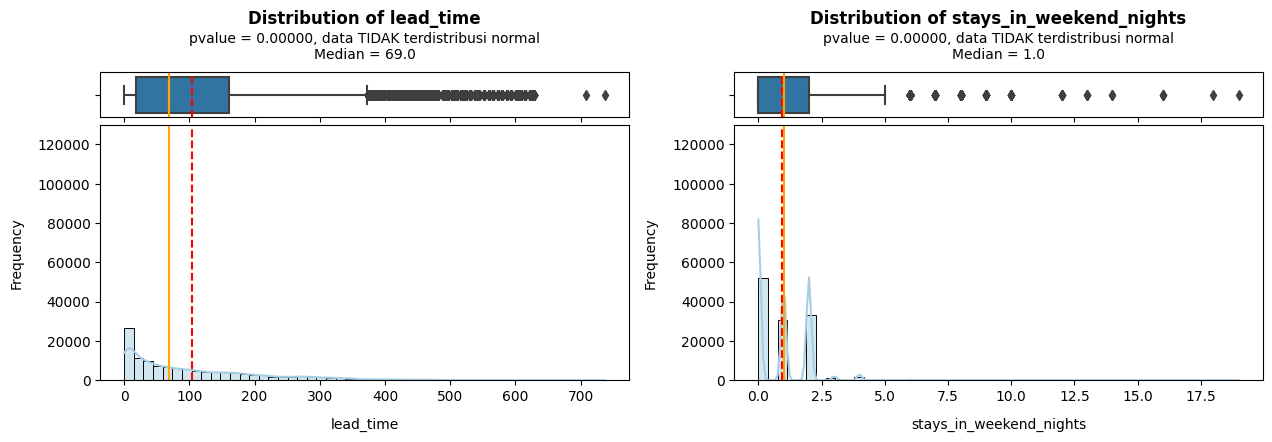

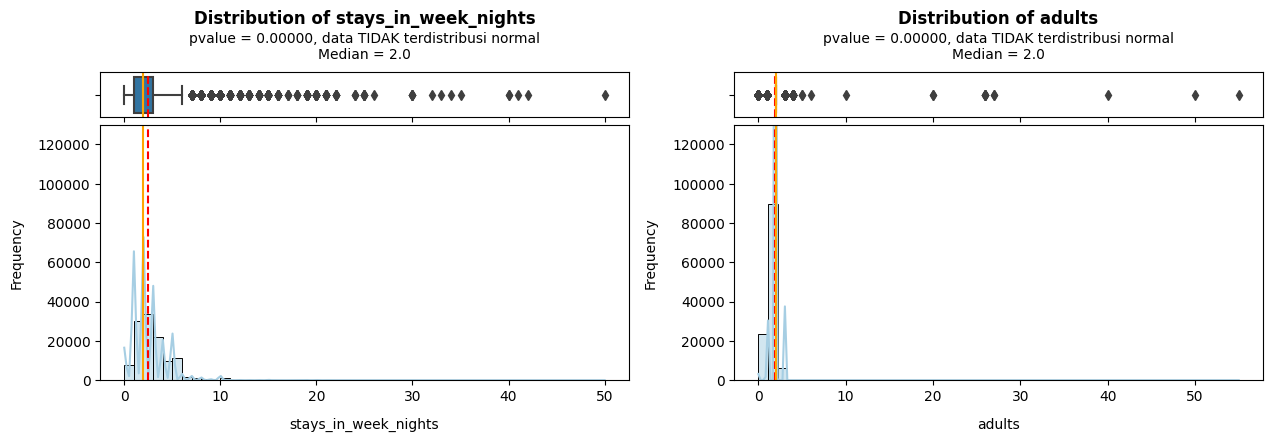

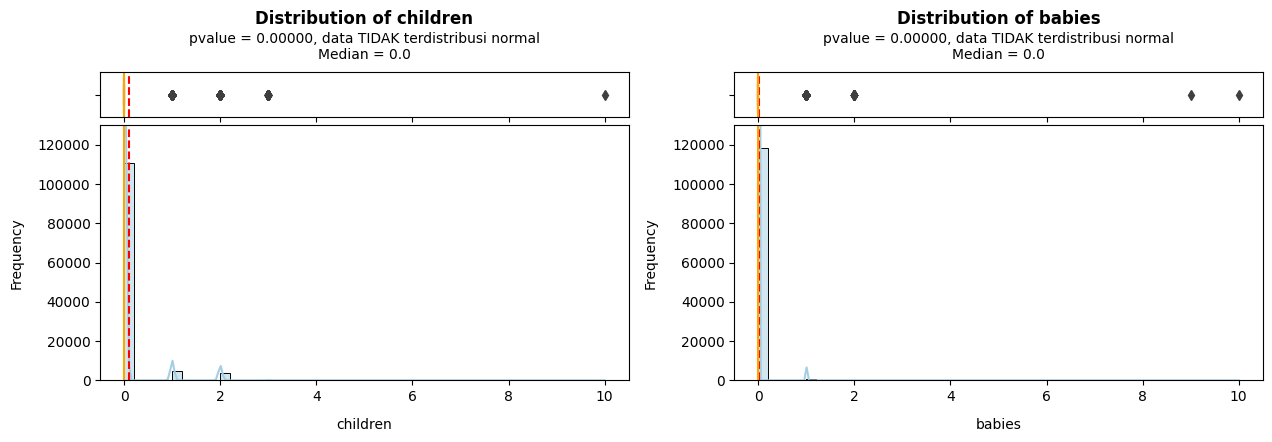

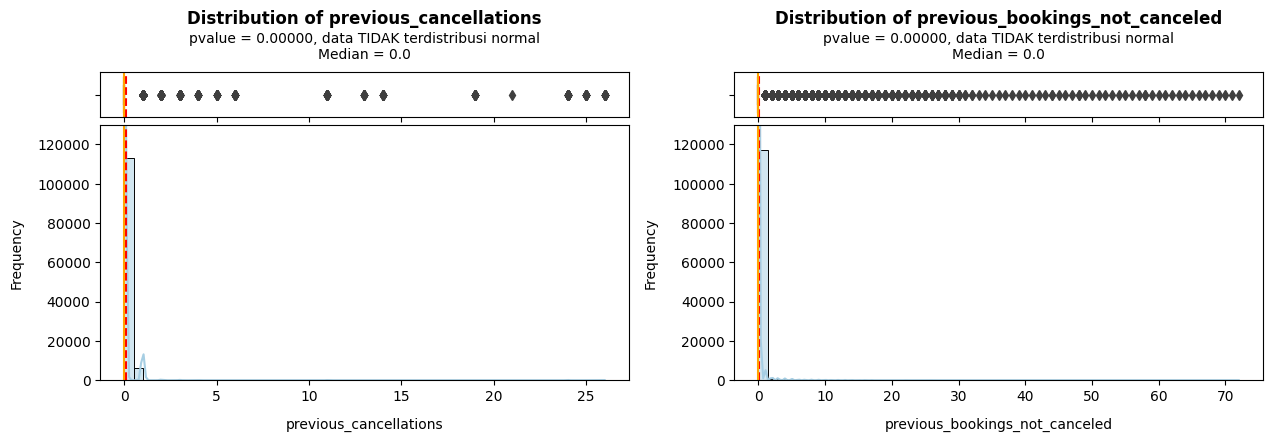

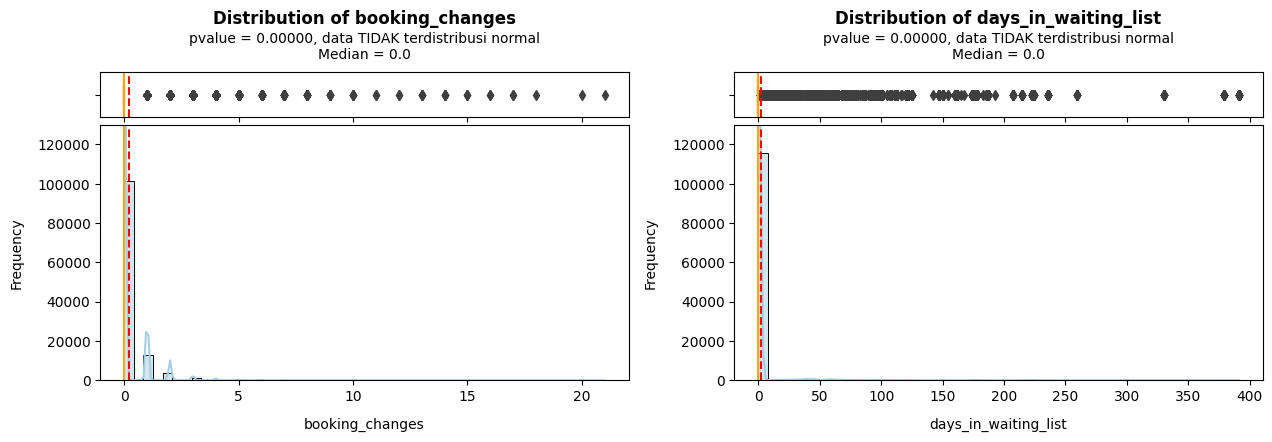

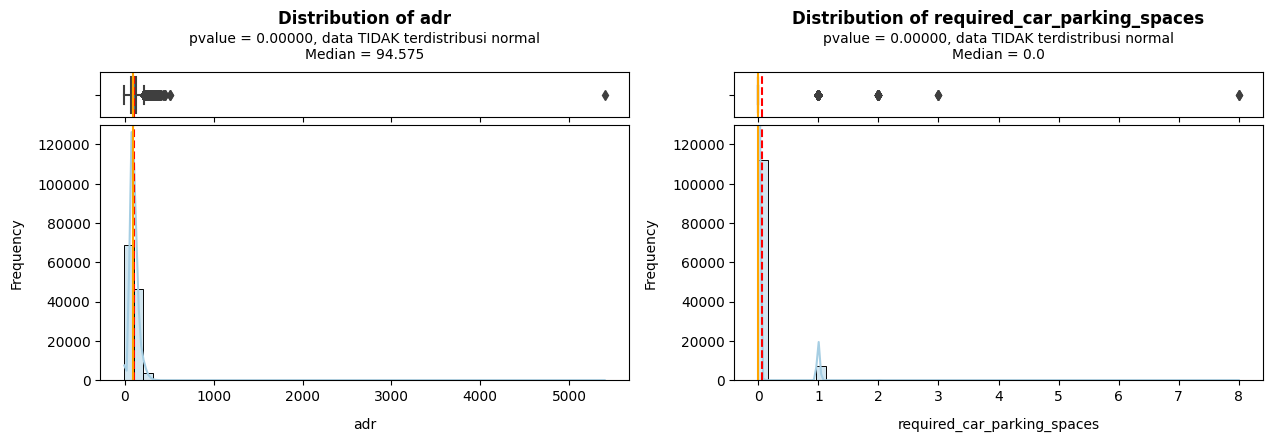

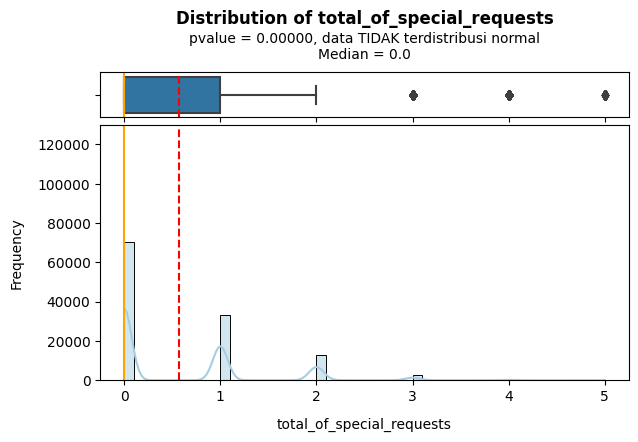

In [8]:
# menampilkan distribusi data pada feature numerikal beserta uji normalitasnya
features = [
    numerical_features[:2],
    numerical_features[2:4],
    numerical_features[4:6],
    numerical_features[6:8],
    numerical_features[8:10],
    numerical_features[10:12],
    numerical_features[12]
]

for plot in features:    
    if plot == numerical_features[12]:
        # plot untuk numerical_features index ke-12
        fig, ax = plt.subplots(
            nrows = 2,
            ncols = 1,
            figsize = (6.82, 4),
            gridspec_kw = {
                "height_ratios" : (.15, .85),
                "hspace" : 0.05
            }
        )
        ax = ax.flatten()
        stat, pvalue = normaltest(df[plot].dropna())
        if pvalue > 0.05:
            distribution = f"pvalue = {pvalue:.5f}, data terdistribusi normal\nMedian = {df[plot].median()}"
        else:
            distribution = f"pvalue = {pvalue:.5f}, data TIDAK terdistribusi normal\nMedian = {df[plot].median()}"

        # menampilkan boxplot & title
        sns.boxplot(x = df[plot], ax = ax[0], color = "#1F78B4", medianprops = dict(color = "orange"))
        ax[0].axvline(df[plot].mean(), color = "red", linestyle = "--")
        ax[0].axvline(df[plot].median(), color = "orange", linestyle = "-")
        ax[0].set_title(f"Distribution of {plot}\n", fontsize = 12, pad = 20, fontweight = "bold")
        ax[0].text(x = 0.5, y = 1.3, s = distribution, ha = "center", transform = ax[0].transAxes)

        # menampilkan histplot
        sns.histplot(data = df[plot], ax = ax[1], kde = True, stat = "count", bins = 50, color = "#A6CEE3")
        ax[1].axvline(df[plot].mean(), color = "red", linestyle = "--")
        ax[1].axvline(df[plot].median(), color = "orange", linestyle = "-")
        ax[1].set_xlabel(plot, labelpad = 10)
        ax[1].set_ylabel("Frequency", labelpad = 10)
        ax[1].set_ylim(0, 130000)
    else:
        # plot untuk numerical_features index ke-0 hingga ke-11
        fig, ax = plt.subplots(
            nrows = 2,
            ncols = 2,
            figsize = (15, 4),
            gridspec_kw = {
                "height_ratios" : (.15, .85),
                "hspace" : 0.05
            }
        )
        ax = ax.flatten()
        for i, num_cols in enumerate(plot):
            stat, pvalue = normaltest(df[num_cols].dropna())
            if pvalue > 0.05:
                distribution = f"pvalue = {pvalue:.5f}, data terdistribusi normal\nMedian = {df[num_cols].median()}"
            else:
                distribution = f"pvalue = {pvalue:.5f}, data TIDAK terdistribusi normal\nMedian = {df[num_cols].median()}"

            # menampilkan boxplot & title
            sns.boxplot(x = df[num_cols], ax = ax[i], color = "#1F78B4", medianprops = dict(color = "orange"))
            ax[i].axvline(df[num_cols].mean(), color = "red", linestyle = "--")
            ax[i].axvline(df[num_cols].median(), color = "orange", linestyle = "-")
            ax[i].set_title(f"Distribution of {num_cols}\n", fontsize = 12, pad = 20, fontweight = "bold")
            ax[i].text(x = 0.5, y = 1.3, s = distribution, ha = "center", transform = ax[i].transAxes)

            # menampilkan histplot
            sns.histplot(data = df[num_cols], ax = ax[i+2], kde = True, stat = "count", bins = 50, color = "#A6CEE3")
            ax[i+2].axvline(df[num_cols].mean(), color = "red", linestyle = "--")
            ax[i+2].axvline(df[num_cols].median(), color = "orange", linestyle = "-")
            ax[i+2].set_xlabel(num_cols, labelpad = 10)
            ax[i+2].set_ylabel("Frequency", labelpad = 10)
            ax[i+2].set_ylim(0, 130000)
    plt.tight_layout()
    plt.show()

Berdasarkan *output* di atas, semua *feature* numerikal memiliki data yang **TIDAK** terdistribusi normal. Hal tersebut didukung dengan visualisasi *histogram* dari semua *feature*-nya yang terlihat ***right-skewed*** atau ***positive skew***, serta telah dibuktikan juga dengan uji normalitas menggunakan D’Agostino and Pearson, di mana semua nilai **pvalue**-nya berada di bawah 0,05. Selain itu, kita dapat mengetahui bahwa semua *feature* numerikal memiliki banyak *outlier*, yang mana hal tersebut akan kita *breakdown* lebih lanjut saat tahap *preprocessing*. Adapun *insight* lainnya terkait semua *feature* di atas yang akan dijabarkan pada tabel di bawah ini.

| Attribute | Insight |
| --- | --- |
| `lead_time` | Mayoritas periode waktu seorang pelanggan untuk menunggu dari tanggal melakukan *booking* hingga tanggal *check-in* berada pada rentang 0 hingga 150 hari. |
| `stays_in_weekend_nights` | Sebagian besar pelanggan yang berencana atau telah melakukan *check-in* saat *weekend* biasanya menginap antara 0 hingga 2 malam. |
| `stays_in_week_nights` | Sebagian besar pelanggan yang berencana atau telah melakukan *check-in* selama hari kerja biasanya menginap antara 0 hingga 5 malam. |
| `adults` | Umumnya, jumlah orang dewasa yang akan atau pernah melakukan *check-in* berada pada rentang 0 hingga 2 orang.  |
| `children` | Sebagian besar *booking* hotel dipesan dengan tidak membawa atau bahkan tidak berniat membawa anak-anak.  |
| `babies` | Hampir semua pemesan yang melakukan *booking* hotel tidak membawa atau bahkan tidak berniat membawa bayi. |
| `previous_cancellations` | Mayoritas pemesan tidak melakukan pembatalan *booking* hotel pada pemesanan sebelumnya. Di sisi lain, bisa saja mayoritas pemesan merupakan pelanggan baru atau bukan *repeated guest* jika kita merujuk pada [deskripsi](https://www.sciencedirect.com/science/article/pii/S2352340918315191#bib5) kolom tersebut. |
| `previous_bookings_not_canceled` | Sebagian besar pelanggan yang melakukan pemesanan hotel sebelumnya tidak membatalkan reservasi mereka. Di sisi lain, bisa saja mayoritas pemesan merupakan pelanggan baru atau bukan *repeated guest* jika kita merujuk pada [deskripsi](https://www.sciencedirect.com/science/article/pii/S2352340918315191#bib5) kolom tersebut. |
| `booking_changes` | Mayoritas pemesan tidak melakukan penggantian data *booking* hotel. |
| `days_in_waiting_list` | Pemesanan pada hotel ini jarang terjadi *waiting list*. |
| `adr` | Median *Average Daily Rate* untuk pemesanan yang dijadwalkan tiba antara tanggal 1 Juli 2015 dan 31 Agustus 2017 berada di angka 94,575 EUR. |
| `required_car_parking_spaces` | Hampir semua pemesan tidak memerlukan lahan untuk parkir mobil. |
| `total_of_special_requests` | Mayoritas pelanggan meminta 0 hingga 1 *special request* saat melakukan pemesanan hotel. |

### `Data Correlation (Numerical Features)`

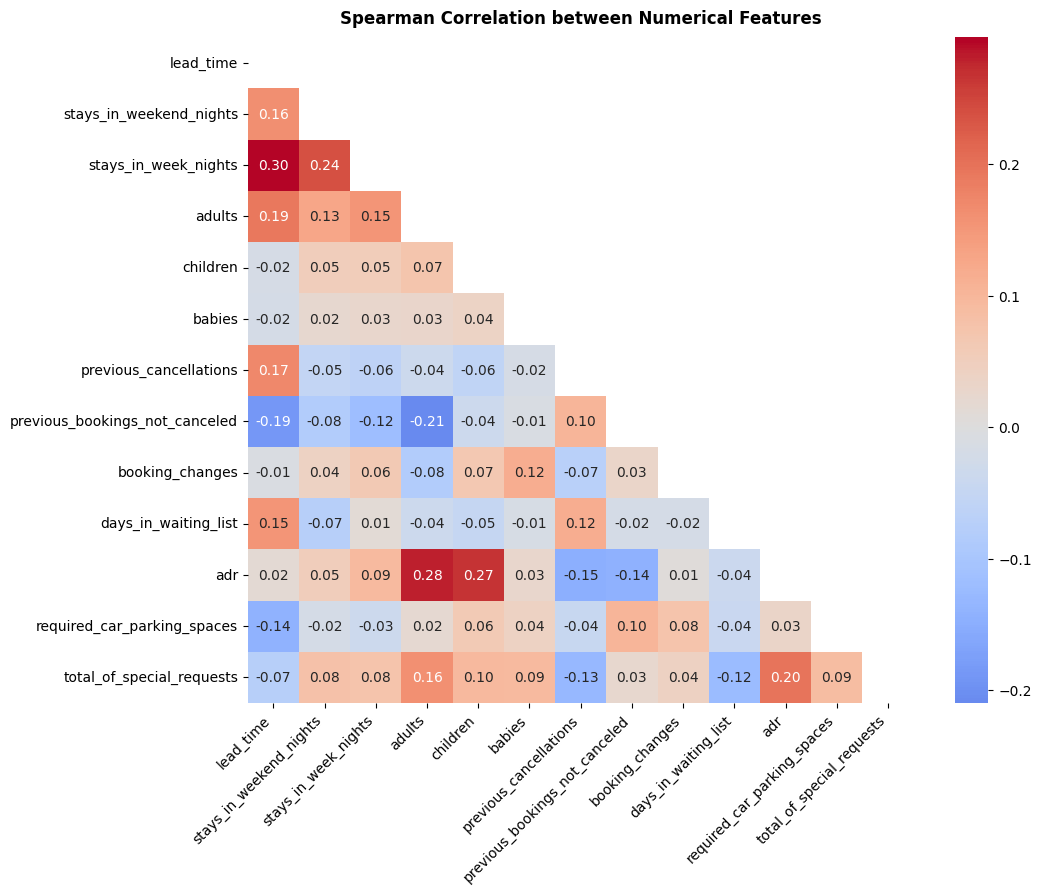

In [9]:
# menghitung korelasi setiap feature numerikal
num_correlation = df[numerical_features].corr(method = "spearman")
matrix = np.triu(num_correlation)
plt.figure(figsize = (11, 11))
ax = sns.heatmap(
    data = num_correlation,
    annot = True,
    fmt = ".2f",
    cmap = "coolwarm",   
    center = 0,
    mask = matrix,
    square = True,
    cbar_kws = {"shrink" : 0.685}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = "right"
)
plt.title("Spearman Correlation between Numerical Features", fontsize = 12, pad = 10, fontweight = "bold")
plt.tight_layout()
plt.show()

Berdasarkan *correlation matrix* di atas, kita dapat melihat bahwa nilai korelasi positif tertinggi terdapat pada hubungan antara kolom `lead_time` dan `stays_in_week_nights`, sedangkan untuk nilai korelasi negatif tertinggi terdapat pada hubungan antara kolom `adults` dan `previous_bookings_not_canceled`. Kita tidak akan berbicara lebih lanjut lagi terkait *correlation matrix* yang disajikan di atas, karena jika kita periksa hubungan antar *feature* numerikal satu dan yang lainnya, terlihat bahwa korelasinya relatif rendah (nilainya berada pada rentang -0,3 hingga 0 hingga 0,3). Hal tersebut mungkin disebabkan oleh variasi yang kompleks dan *non-linear* antar *feature* tersebut, serta sifat unik dari setiap *feature* numerikal yang tidak secara langsung berkorelasi satu sama lain.

### `Data Cardinality (Categorical Features)`

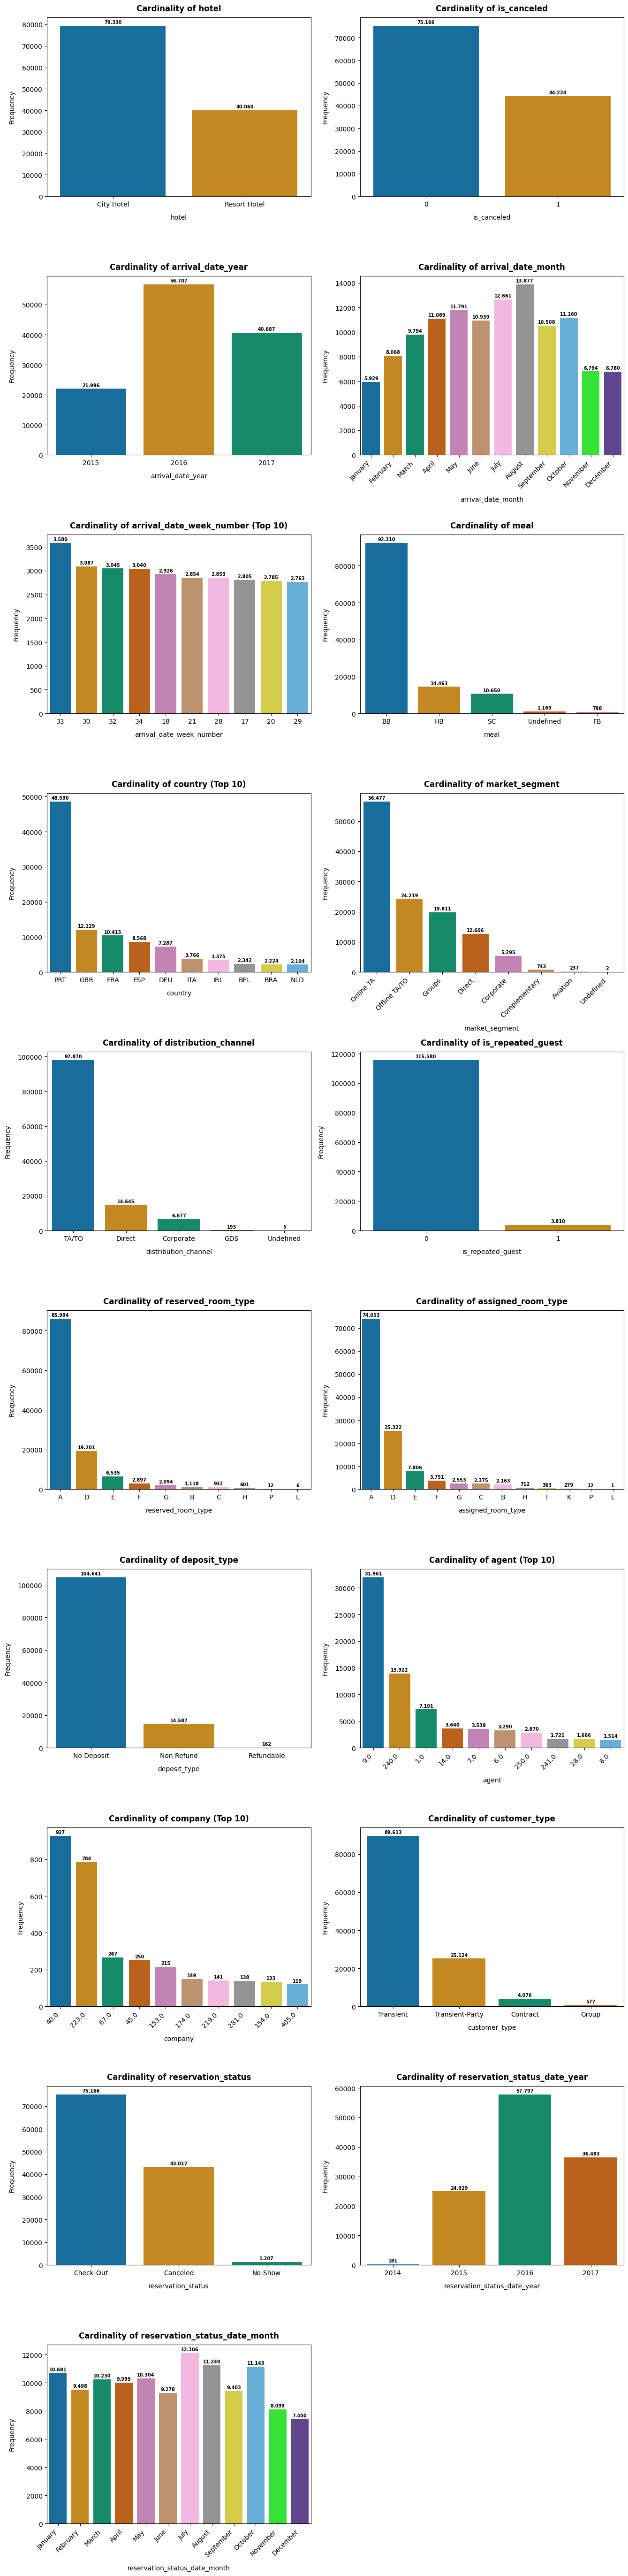

In [10]:
# membuat countplot untuk setiap feature kategorikal
top_ten = [
    "arrival_date_week_number",
    "country",
    "agent",
    "company"
]

unordered_features = [
    "arrival_date_year",
    "arrival_date_month",
    "reservation_status_date_year",
    "reservation_status_date_month"
]

ordered_month = [
    "arrival_date_month",
    "reservation_status_date_month"
]

rotate_labels = [
    "arrival_date_month",
    "market_segment",
    "agent",
    "company",
    "reservation_status_date_month"
]

number_plots = min(len(categorical_features), 20)
fig, ax = plt.subplots(10, 2, figsize = (13.5, 55))
plot_counter = 0
for i in range(10):
    for j in range(2):
        if plot_counter >= number_plots:
            fig.delaxes(ax[i, j])
        else:
            feature = categorical_features[plot_counter]
            if feature in top_ten:
                order = df[feature].value_counts().index[:10]
                title = f"Cardinality of {feature} (Top 10)"
            else:
                if feature in unordered_features:
                    if feature in ordered_month:
                        order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
                    else:    
                        order = None
                else:
                    order = df[feature].value_counts().index
                title = f"Cardinality of {feature}"
            sns.countplot(data = df, x = feature, ax = ax[i, j], order = order)
            ax[i, j].set_title(title, fontsize = 12, pad = 10, fontweight = "bold")
            if feature in rotate_labels:
                ax[i, j].set_xticklabels(ax[i, j].get_xticklabels(), rotation = 45, horizontalalignment = "right")
                ax[i, j].set_xlabel(feature, labelpad = 10)
            else:
                ax[i, j].set_xlabel(feature, labelpad = 10)
            ax[i, j].set_ylabel("Frequency", labelpad = 10)
            for container in ax[i, j].containers:
                ax[i, j].bar_label(
                    container,
                    labels = [f"{x:,.0f}".replace(",", ".") for x in container.datavalues],
                    label_type = "edge",
                    padding = 2,
                    color = "black",
                    fontweight = "bold",
                    fontsize = 7
                )
        plot_counter += 1
plt.tight_layout()
plt.show()


| Attribute | Insight |
| --- | --- |
| `hotel` | Terlihat pada *dataset* bahwa mayoritas pemesan hotel melakukan pemesanan untuk *City Hotel* (informasi ini dapat diketahui juga saat menampilkan *output* *descriptive statistics* di atas). Hal tersebut sangatlah masuk akal, mengingat lokasi dan aksesibilitas untuk *City Hotel* mudah diakses oleh transportasi umum lantaran lokasinya yang berada di daerah Ibu Kota. |
| `is_canceled` | Mayoritas dari jumlah transaksi yang terjadi di hotel ini berhasil, dengan kata lain bahwa sebagian besar transaksi tidak mengalami pembatalan. Hal tersebut bisa disebabkan oleh fakta bahwa sebagian besar pelanggan telah merencanakan reservasi mereka dengan cukup baik dan matang, sehingga cenderung tidak membatalkan reservasinya. Bukti dari pernyataan tersebut dapat didukung oleh kolom `booking_changes` yang menunjukkan bahwa minimnya perubahan yang terjadi pada data pemesanan hotel. |
| `arrival_date_year` | Terjadinya fluktuasi jumlah pemesanan dari tahun 2015 hingga 2017 yang cenderung meningkat dengan puncak konsumennya yang terjadi pada tahun 2016. Alasan mengapa pada tahun 2016 mencatatkan jumlah pemesanan tertinggi yaitu bisa jadi karena meningkatnya popularitas tujuan wisata di Portugal pada periode tersebut, khususnya untuk kota Lisbon dan Algarve. Selain itu, alasan paling masuk akalnya adalah karena *dataset* ini mencakup pemesanan yang dijadwalkan tiba antara tanggal 1 Juli 2015 dan 31 Agustus 2017, sehingga secara otomatis data pemesanan yang berada di tahun 2016 memiliki kuantitas yang lebih besar dibandingkan data pemesanan di tahun 2015 dan 2017. |
| `arrival_date_month` | Bulan Agustus merupakan bulan yang paling banyak diminati oleh para pelanggan. Hal ini mungkin disebabkan oleh popularitasnya yang tinggi sebagai bulan liburan [musim panas di Portugal](https://www.bookmundi.com/ng/summer-in-portugal-weather-beaches-and-more). Cuaca yang hangat dan cerah di bulan Agustus juga membuatnya menjadi pilihan yang menarik bagi wisatawan dalam negeri dan mancanegara untuk menikmati liburan santai di tempat-tempat wisata seperti pantai, sehingga mereka membutuhkan akomodasi untuk tempat menginap. Selain itu, alasan paling masuk akalnya adalah karena *dataset* ini mencakup pemesanan yang dijadwalkan tiba antara tanggal 1 Juli 2015 dan 31 Agustus 2017, sehingga secara otomatis data pemesanan yang berada di bulan Agustus (dan bulan Juli) memiliki kuantitas yang lebih besar dibandingkan data pemesanan di bulan lainnya. |
| `arrival_date_week_number` | Minggu ke-33 menunjukkan tingginya jumlah pemesan yang dijadwalkan untuk *check-in*. Alasan mengapa minggu ke-33 di setiap tahunnya menjadi minggu dengan jumlah reservasi paling tinggi yaitu karena adanya libur musim panas yang umumnya terjadi pada periode tersebut. Faktanya, [minggu ke-33](https://www.calendar-week.org/calendar-weeks/2016) merupakan minggu yang berada pada bulan Agustus, sehingga wajar jika data tertinggi pada kolom ini hasilnya sesuai dengan data tertinggi yang terdapat pada kolom `arrival_date_month`. Selain itu, alasan paling masuk akalnya adalah karena *dataset* ini mencakup pemesanan yang dijadwalkan tiba antara tanggal 1 Juli 2015 dan 31 Agustus 2017, sehingga secara otomatis data pemesanan yang berada di minggu-minggu pada bulan Agustus (dan bulan Juli) memiliki kuantitas yang lebih besar dibandingkan data pemesanan di minggu-minggu pada bulan lainnya. |
| `meal` | Paket makanan BB atau *Bed and Breakfast* lebih sering dipilih oleh pemesan saat melakukan *booking* hotel dengan asumsi agar mereka tidak perlu mencari sarapan di luar hotel setiap pagi demi menghemat waktu dan tenaga. |
| `country` | Diagram menunjukkan bahwa banyaknya pengunjung hotel berasal dari negara dengan kode PRT atau Portugal. Hal tersebut sangatlah masuk akal karena lokasi hotelnya yang berada di negara Portugal itu sendiri. |
| `market_segment` | Berdasarkan segmentasi pasar yang dibuat oleh pihak hotel, transaksi *booking* terbanyak berasal dari *Online Travel Agent* (OTA). Alasan kuatnya adalah karena OTA menawarkan kemudahan dan kenyamanan bagi pelanggan dalam mencari dan memesan akomodasi secara *online*. OTA juga sering kali menawarkan berbagai pilihan akomodasi dengan harga yang kompetitif, serta fitur perbandingan harga dan ulasan dari pengguna sebelumnya yang membantu pelanggan dalam membuat keputusan yang tepat. Selain itu, kerjasama antara hotel dan OTA dapat meningkatkan visibilitas hotel dan mencapai pangsa pasar yang lebih luas, terutama di kalangan wisatawan yang mencari fleksibilitas dan kemudahan dalam merencanakan perjalanan mereka. |
| `distribution_channel` | Mayoritas saluran distribusi untuk setiap *booking* hotel yang dipilih oleh pelanggan berasal dari *Travel Agent* (TA) atau *Tour Operators* (TO). TA/TO sering memiliki pengetahuan yang luas tentang destinasi wisata dan dapat memberikan saran serta paket liburan yang sesuai dengan kebutuhan pelanggan. Selain itu, mereka juga dapat menawarkan paket-paket yang termasuk akomodasi, transportasi, dan aktivitas wisata dengan harga yang kompetitif. Kerjasama antara hotel dan TA/TO juga dapat memberikan manfaat bagi kedua belah pihak dalam hal pemasaran dan peningkatan penjualan. |
| `is_repeated_guest` | Sekitar 96,8% pemesan berasal dari tamu yang tidak termasuk ke dalam kategori tamu berulang atau *repeated guest*. Alasannya mungkin karena pihak hotel melakukan promosi yang lebih ditujukan untuk menarik banyak tamu baru, program loyalitas, atau bisa saja memang karena popularitasnya sebagai tempat penginapan atau destinasi wisata yang menarik bagi wisatawan baru. Selain itu, beberapa tamu mungkin lebih cenderung mencari pengalaman serta variasi baru dalam akomodasi mereka daripada kembali ke tempat yang sama setiap kali mereka melakukan perjalanan. |
| `reserved_room_type` | Sebagian besar pemesan memilih tipe kamar A (sekitar 72%). Kita asumsikan bahwa tipe kamar ini mungkin menawarkan kenyamanan dan fasilitas yang cukup memadai bagi sebagian besar tamu. Selain itu, tipe kamar A mungkin memiliki harga yang lebih terjangkau atau lebih mudah tersedia dibandingkan dengan tipe kamar lainnya. |
| `assigned_room_type` | Terdapat kesenjangan dan ketidaksesuaian antara tipe kamar yang dipesan dengan tipe kamar yang ditetapkan oleh pihak hotel. Terlihat hanya sekitar 86% pemesanan yang memilih tipe kamar A mendapatkan kamar yang sesuai, dengan kata lain 14% pemesanan sisanya ditetapkan dengan tipe kamar yang berbeda. Kesenjangan tersebut dapat disebabkan oleh berbagai faktor, misalnya seperti ketersediaan kamar, kebijakan hotel, permintaan perubahan dari pelanggan, serta kemungkinan adanya kesalahan sistem atau *human error* (baik dari pelanggan atau pegawai hotel) saat proses reservasi. |
| `deposit_type` | Sebagian besar pelanggan tidak melakukan *deposit* saat memesan hotel. Hal tersebut mungkin di karenakan kebijakan hotel yang memperbolehkan reservasi tanpa *deposit* atau karena kebutuhan fleksibilitas serta kenyamanan pelanggan dalam merencanakan perjalanan. |
| `agent` | Pada diagram yang menampilkan peringkat sepuluh teratas dari *agent* yang pernah melakukan *booking* hotel, *agent* bernomor ID 9 merupakan *agent* dengan jumlah pemesanan hotel terbanyak. |
| `company` | Pada diagram yang menampilkan peringkat sepuluh teratas dari *company* yang pernah melakukan *booking* hotel, *company* bernomor ID 40 merupakan *company* dengan jumlah pemesanan hotel terbanyak. |
| `customer_type` | Tipe pelanggan yang paling umum melakukan pemesanan adalah *Transient*, yang menunjukkan bahwa 75% dari total pelanggan hanya memesan hotel untuk jangka waktu yang singkat. |
| `reservation_status` | Sekitar 62,9% pemesanan hotel tidak dibatalkan atau pemesan berhasil melakukan *check-out*. Hal tersebut telah dipaparkan juga pada *insight* kolom `is_canceled` serta tabel *skimming* di atas. |
| `reservation_status_date_year` | Sebagian besar status pemesanan hotel terjadi di tahun 2016, baik itu pemesanan yang dibatalkan ataupun yang berhasil (pelanggan melakukan *check-in* dan berhasil *check-out*). Alasan paling masuk akalnya adalah karena *dataset* ini mencakup pemesanan yang dijadwalkan tiba antara tanggal 1 Juli 2015 dan 31 Agustus 2017, sehingga secara otomatis data pemesanan yang berada di tahun 2016 memiliki kuantitas yang lebih besar dibandingkan data pemesanan di tahun 2015 dan 2017. |
| `reservation_status_date_month` | Pihak hotel lebih banyak menerima kejelasan terkait setiap pemesanan di bulan Juli, dari mulai reservasi yang berhasil (pelanggan melakukan *check-in* dan berhasil *check-out*) hingga yang dibatalkan oleh pelanggan. Alasan di baliknya yaitu karena *dataset* ini mencakup pemesanan yang dijadwalkan tiba antara tanggal 1 Juli 2015 dan 31 Agustus 2017, sehingga secara otomatis data pemesanan yang berada di bulan Juli (dan bulan Agustus) memiliki kuantitas yang lebih besar dibandingkan data pemesanan di bulan lainnya. |

### `Identify Duplicates`

In [11]:
# menampilkan data duplikat
print(f"Jumlah data duplikat: {df.duplicated().sum()}")

Jumlah data duplikat: 31994


Setelah dilakukan pengecekan, ternyata *dataset* ini mengandung data duplikat sebanyak 31.994 data (informasi ini dapat dilihat pada tabel *skimming* di atas). Semua data duplikat harus di hapus agar tidak terjadi bias atau ketidakakuratan yang dapat mempengaruhi hasil analisis dan interpretasi data, sehingga kita perlu melakukan penanganan terhadap data duplikat tersebut pada tahap *preprocessing*.

### `Identify Missing Value`

children    4     
country     488   
agent       16340 
company     112593
dtype: int64


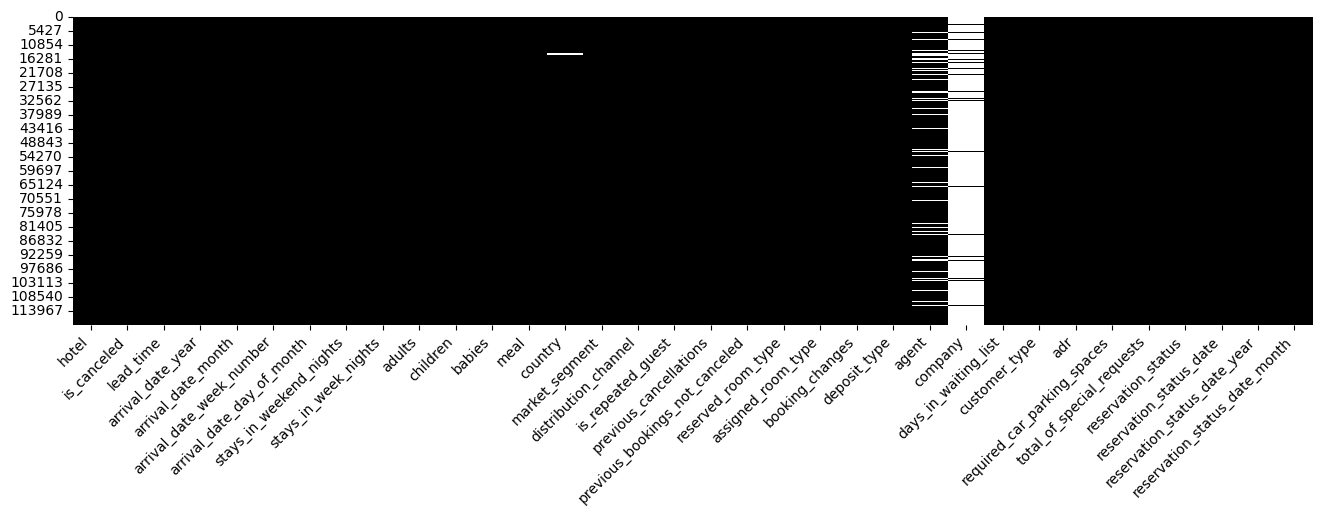

In [12]:
# menampilkan missing value
print(df.isna().sum()[df.isna().sum() > 0])
plt.figure(figsize = (16, 4))
ax = sns.heatmap(data = df.isna(), cmap = "bone", cbar = False)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = "right"
)
plt.show()

Secara garis besar, *dataset* ini memiliki *missing value* pada kolom `children` (0,003%), `country` (0,4%), `agent` (13,6%), dan `company` (94,3%), sehingga kita perlu melakukan penanganan terhadap *missing value*-nya pada tahap *preprocessing* (informasi ini dapat dilihat pada tabel *skimming* di atas). Hal tersebut dapat terlihat sangat jelas ketika menampilkan *output* pertama yang menunjukkan masing-masing jumlah dari *missing value*-nya, serta pada *output* kedua yang memperlihatkan garis putih penanda adanya *missing value*, walaupun pada kolom `children` tidak terlihat adanya garis putih tersebut (asumsi: di karenakan jumlah *missing value* nya yang hanya 4 baris).

## **PREPROCESSING**

### `Remove Data Duplication`

In [13]:
# menghapus data duplikat
df = df.drop_duplicates()
if df.duplicated().sum() == 0:
    print(colored(f"Data duplikat berhasil dihapus!\n", "green"))
    print(f"Jumlah keseluruhan data sebelumnya: {len(df_source)}")
    print(f"Jumlah keseluruhan data sekarang: {len(df)}")
else:
    print(colored(f"Data duplikat BELUM berhasil dihapus!", "red"))

Data duplikat berhasil dihapus!

Jumlah keseluruhan data sebelumnya: 119390
Jumlah keseluruhan data sekarang: 87396


### `Fill Missing Value & Casting Data Type`

Sebelum melakukan penanganan terhadap *missing value*, mari kita lihat terlebih dahulu apakah ada korelasi nulitas antar *feature* yang memiliki *missing value*.

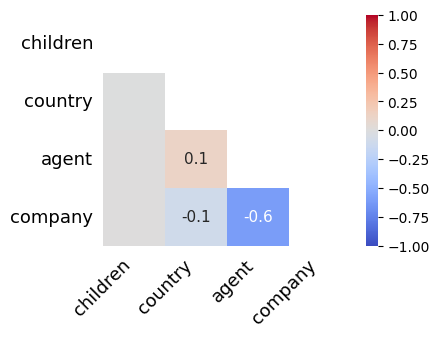

In [14]:
# menampilkan korelasi nulitas antar feature yang memiliki missing value
msno.heatmap(df = df, cmap = "coolwarm", figsize = (4, 3), fontsize = 13)
plt.show()

*Output* di atas merupakan *heatmap* yang menunjukkan korelasi nulitas antar *feature* yang memiliki *missing value*. Korelasi nulitas berkisar dari -1 (jika suatu variabel muncul, maka variabel lainnya pasti tidak muncul) hingga 0 (variabel yang muncul atau tidak muncul sama sekali tidak berpengaruh satu sama lain) hingga 1 (jika suatu variabel muncul, maka variabel lainnya pasti muncul).

Terlihat bahwa rata-rata *missing values* antar *feature* itu hampir tidak berkorelasi atau tidak berpengaruh satu sama lain, dan jika ada pun nilainya hanya 0,1 dan -0,1 yang berarti korelasi nulitasnya sangat rendah. Berbeda halnya dengan kolom `company` dan `agent` yang memiliki korelasi nulitasnya *moderate* dengan nilai -0,6 yang mengartikan jika baris pada kolom `company` berisi data, maka rata-rata baris pada kolom `agent` tidak berisi data atau NaN, dan begitu pula sebaliknya. Hal tersebut dapat didukung oleh *heatmap* yang ditampilkan saat melakukan pengecekan terhadap *missing value* di atas, di mana ketika warna baris pada kolom `company` bergaris hitam, maka warna baris pada kolom `agent` berwarna putih.

Kedua kolom tersebut perlu di-*breakdown* lebih lanjut sebelum dilakukan penanganan terhadap keduanya, dan jika terbukti bahwa kolom `company` dan `agent` saling melengkapi, maka kita akan menyatukan keduanya agar dapat mempermudah proses analisis.

**Penanganan *missing value* pada kolom `children` serta mengubah tipe datanya**

In [15]:
# menampilkan data yang memiliki missing value pada kolom children
display(df[df["children"].isna()])
print(f"Jumlah missing value setelah menghapus data duplikat: {len(df[df['children'].isna()])}")

hotel  is_canceled  lead_time  arrival_date_year  \
40600  City Hotel  1            2          2015                
40667  City Hotel  1            1          2015                
40679  City Hotel  1            1          2015                
41160  City Hotel  1            8          2015                

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
40600  August             32                        3                           
40667  August             32                        5                           
40679  August             32                        5                           
41160  August             33                        13                          

       stays_in_weekend_nights  stays_in_week_nights  adults  children  \
40600  1                        0                     2      NaN         
40667  0                        2                     2      NaN         
40679  0                        2                     3      NaN         
41160  2                        5                     2      NaN         

       babies meal country market_segment distribution_channel  \
40600  0       BB   PRT     Undefined      Undefined             
40667  0       BB   PRT     Direct         Undefined             
40679  0       BB   PRT     Undefined      Undefined             
41160  0       BB   PRT     Online TA      Undefined             

       is_repeated_guest  previous_cancellations  \
40600  0                  0                        
40667  0                  0                        
40679  0                  0                        
41160  0                  0                        

       previous_bookings_not_canceled reserved_room_type assigned_room_type  \
40600  0                               B                  B                   
40667  0                               B                  B                   
40679  0                               B                  B                   
41160  0                               B                  B                   

       booking_changes deposit_type  agent  company  days_in_waiting_list  \
40600  0                No Deposit  NaN    NaN       0                      
40667  0                No Deposit   14.0  NaN       0                      
40679  0                No Deposit  NaN    NaN       0                      
41160  0                No Deposit   9.0   NaN       0                      

         customer_type   adr  required_car_parking_spaces  \
40600  Transient-Party  12.0  0                             
40667  Transient-Party  12.0  0                             
40679  Transient-Party  18.0  0                             
41160  Transient-Party  76.5  0                             

       total_of_special_requests reservation_status reservation_status_date  \
40600  1                          Canceled           2015-08-01               
40667  1                          Canceled           2015-08-04               
40679  2                          Canceled           2015-08-04               
41160  1                          Canceled           2015-08-09               

       reservation_status_date_year reservation_status_date_month  
40600  2015                          August                        
40667  2015                          August                        
40679  2015                          August                        
41160  2015                          August

Jumlah missing value setelah menghapus data duplikat: 4


Untuk penanganan *missing value* pada kolom `children`, kita asumsikan bahwa **pemesan tidak mengisi informasi terkait jumlah anak-anak yang akan ikut *check in* karena memang tidak ada anak-anak yang akan dibawa oleh pemesan**, dengan kata lain data *booking* hotel di atas seharusnya memiliki nilai 0 pada kolom `children`. Maka dari itu, kita akan *assign* nilai **0** pada keempat *missing value* tersebut. Setelah melakukan pengisian *missing value*, kita akan mengubah tipe data pada kolom `children`, mengingat ketika kita mempelajari *dataset* di atas, kolom tersebut masih bertipe data *float* (seharusnya bertipe data *integer*), sehingga kita perlu mengubahnya pada proses ini.

In [16]:
# mengisi nilai 0 pada kolom children yang bernilai NaN
df["children"] = df["children"].fillna(0)

# mengubah tipe data children menjadi integer
df["children"] = df["children"].astype(int)

**Penanganan *missing value* pada kolom `country`**

In [17]:
# menampilkan data yang memiliki missing value pada kolom country
display(df[df["country"].isna()])
print(f"Jumlah missing value setelah menghapus data duplikat: {len(df[df['country'].isna()])}")

hotel  is_canceled  lead_time  arrival_date_year  \
30      Resort Hotel  0            118        2015                
4127    Resort Hotel  1            0          2016                
7092    Resort Hotel  1            8          2016                
7860    Resort Hotel  1            39         2016                
8779    Resort Hotel  1            0          2016                
...              ... ..           ..           ...                
60651   City Hotel    1            0          2016                
61244   City Hotel    1            0          2016                
65907   City Hotel    1            0          2017                
80830   City Hotel    0            4          2015                
101488  City Hotel    0            1          2016                

       arrival_date_month  arrival_date_week_number  \
30      July               27                         
4127    February           8                          
7092    July               30                         
7860    August             36                         
8779    October            42                         
...         ...            ..                         
60651   November           47                         
61244   December           50                         
65907   April              15                         
80830   November           48                         
101488  November           47                         

        arrival_date_day_of_month  stays_in_weekend_nights  \
30      1                          4                         
4127    15                         0                         
7092    21                         0                         
7860    30                         0                         
8779    13                         0                         
...     ..                        ..                         
60651   17                         4                         
61244   6                          0                         
65907   10                         0                         
80830   23                         1                         
101488  13                         2                         

        stays_in_week_nights  adults  children  babies meal country  \
30      10                    1       0         0       BB   NaN      
4127    0                     0       0         0       SC   NaN      
7092    1                     1       0         0       BB   NaN      
7860    5                     2       0         0       HB   NaN      
8779    1                     1       0         0       BB   NaN      
...    ..                    ..      ..        ..       ..   ...      
60651   11                    0       0         0       SC   NaN      
61244   0                     0       0         0       SC   NaN      
65907   0                     0       0         0       SC   NaN      
80830   2                     1       0         0       BB   NaN      
101488  2                     2       0         0       BB   NaN      

       market_segment distribution_channel  is_repeated_guest  \
30      Direct         Direct               0                   
4127    Offline TA/TO  TA/TO                0                   
7092    Corporate      Corporate            0                   
7860    Direct         Direct               0                   
8779    Corporate      Corporate            0                   
...           ...            ...           ..                   
60651   Corporate      Direct               0                   
61244   Complementary  Corporate            0                   
65907   Complementary  Corporate            0                   
80830   Groups         TA/TO                0                   
101488  Direct         Direct               0                   

        previous_cancellations  previous_bookings_not_canceled  \
30      0                       0                                
4127    0                       0     

Jumlah missing value setelah menghapus data duplikat: 452


Sama halnya dengan kolom `children`, penanganan *missing value* pada kolom `country` juga kita asumsikan bahwa **pemesan tidak ingin menginputkan informasi terkait asal negara mereka karena alasan privasi & keamanan, kelalaian saat menginputkan data diri, atau mungkin beberapa *platform* pemesanan hotel tidak meminta informasi terkait negara (data opsional)**. Dengan kata lain, data *booking* hotel di atas seharusnya memiliki data terkait negara di setiap pemesannya. Permasalahannya, kita tidak tahu dari negara mana pemesan itu berasal, sehingga kita memutuskan untuk men-*assign* nilai ***UNKNOWN*** pada seluruh *missing value* tersebut.

In [18]:
# mengisi nilai UNKNOWN pada kolom country yang bernilai NaN
df["country"] = df["country"].fillna("UNKNOWN")

**Penanganan *missing value* pada kolom `agent` dan `company` serta mengubah kedua tipe datanya**

In [19]:
# menampilkan data yang memiliki missing value pada kolom agent
display(df[df["agent"].isna()])
print(f"Jumlah missing value setelah menghapus data duplikat: {len(df[df['agent'].isna()])}\n")

# menampilkan data yang memiliki missing value pada kolom company
display(df[df["company"].isna()])
print(f"Jumlah missing value setelah menghapus data duplikat: {len(df[df['company'].isna()])}")

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel  0            342        2015                
1       Resort Hotel  0            737        2015                
2       Resort Hotel  0            7          2015                
6       Resort Hotel  0            0          2015                
18      Resort Hotel  0            0          2015                
...              ... ..           ..           ...                
119124  City Hotel    0            0          2017                
119151  City Hotel    0            0          2017                
119166  City Hotel    0            0          2017                
119215  City Hotel    0            2          2017                
119248  City Hotel    0            22         2017                

       arrival_date_month  arrival_date_week_number  \
0       July               27                         
1       July               27                         
2       July               27                         
6       July               27                         
18      July               27                         
...      ...               ..                         
119124  August             35                         
119151  August             35                         
119166  August             35                         
119215  August             35                         
119248  August             35                         

        arrival_date_day_of_month  stays_in_weekend_nights  \
0       1                          0                         
1       1                          0                         
2       1                          0                         
6       1                          0                         
18      1                          0                         
...    ..                         ..                         
119124  29                         0                         
119151  29                         0                         
119166  30                         0                         
119215  31                         0                         
119248  29                         0                         

        stays_in_week_nights  adults  children  babies meal country  \
0       0                     2       0         0       BB   PRT      
1       0                     2       0         0       BB   PRT      
2       1                     1       0         0       BB   GBR      
6       2                     2       0         0       BB   PRT      
18      1                     2       0         0       BB   FRA      
...    ..                    ..      ..        ..       ..   ...      
119124  1                     1       0         0       BB   PRT      
119151  1                     2       2         0       BB   NLD      
119166  1                     1       0         0       BB   BRA      
119215  1                     1       0         0       SC   LBN      
119248  3                     1       0         0       BB   PRT      

       market_segment distribution_channel  is_repeated_guest  \
0       Direct         Direct               0                   
1       Direct         Direct               0                   
2       Direct         Direct               0                   
6       Direct         Direct               0                   
18      Corporate      Corporate            0                   
...           ...            ...           ..                   
119124  Complementary  Corporate            0                   
119151  Direct         Direct               0                   
119166  Direct         Direct               0                   
119215  Direct         Direct               0                   
119248  Corporate      Corporate            0                   

        previous_cancellations  previous_bookings_not_canceled  \
0       0                       0                                
1       0                       0     

Jumlah missing value setelah menghapus data duplikat: 12193



hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel  0            342        2015                
1       Resort Hotel  0            737        2015                
2       Resort Hotel  0            7          2015                
3       Resort Hotel  0            13         2015                
4       Resort Hotel  0            14         2015                
...              ... ..            ..          ...                
119385  City Hotel    0            23         2017                
119386  City Hotel    0            102        2017                
119387  City Hotel    0            34         2017                
119388  City Hotel    0            109        2017                
119389  City Hotel    0            205        2017                

       arrival_date_month  arrival_date_week_number  \
0       July               27                         
1       July               27                         
2       July               27                         
3       July               27                         
4       July               27                         
...      ...               ..                         
119385  August             35                         
119386  August             35                         
119387  August             35                         
119388  August             35                         
119389  August             35                         

        arrival_date_day_of_month  stays_in_weekend_nights  \
0       1                          0                         
1       1                          0                         
2       1                          0                         
3       1                          0                         
4       1                          0                         
...    ..                         ..                         
119385  30                         2                         
119386  31                         2                         
119387  31                         2                         
119388  31                         2                         
119389  29                         2                         

        stays_in_week_nights  adults  children  babies meal country  \
0       0                     2       0         0       BB   PRT      
1       0                     2       0         0       BB   PRT      
2       1                     1       0         0       BB   GBR      
3       1                     1       0         0       BB   GBR      
4       2                     2       0         0       BB   GBR      
...    ..                    ..      ..        ..       ..   ...      
119385  5                     2       0         0       BB   BEL      
119386  5                     3       0         0       BB   FRA      
119387  5                     2       0         0       BB   DEU      
119388  5                     2       0         0       BB   GBR      
119389  7                     2       0         0       HB   DEU      

       market_segment distribution_channel  is_repeated_guest  \
0       Direct         Direct               0                   
1       Direct         Direct               0                   
2       Direct         Direct               0                   
3       Corporate      Corporate            0                   
4       Online TA      TA/TO                0                   
...           ...        ...               ..                   
119385  Offline TA/TO  TA/TO                0                   
119386  Online TA      TA/TO                0                   
119387  Online TA      TA/TO                0                   
119388  Online TA      TA/TO                0                   
119389  Online TA      TA/TO                0                   

        previous_cancellations  previous_bookings_not_canceled  \
0       0                       0                                
1       0                       0     

Jumlah missing value setelah menghapus data duplikat: 82137


Seperti yang telah kita ketahui saat melihat korelasi antar *missing values* di atas, kedua kolom tersebut memiliki korelasi nulitas *moderate* dengan nilai -0,6 yang mengartikan bahwa ketika kolom `company` terdapat data, maka kolom `agent` tidak terdapat data, begitupun juga sebaliknya. Namun setelah kita selidiki, ternyata ada 2 kondisi baru di mana **ketika kolom `company` terdapat data, maka kolom `agent` pun terdapat data** dan **ketika kolom `company` tidak terdapat data, maka kolom `agent` pun tidak terdapat data** . Hal tersebut membuat kedua kolom ini memiliki total 4 kondisi yang akan kita asumsikan sebagai berikut:

- Ketika kolom `company` terdapat data, maka kolom `agent` tidak terdapat data (asumsi: perusahaan X atau orang yang mewakilkan perusahaan X memesan hotel tidak melalui *travel agent*).
- Ketika kolom `agent` terdapat data, maka kolom `company` tidak terdapat data (asumsi: seseorang memesan hotel melalui *travel agent*).
- Ketika kolom `company` terdapat data, maka kolom `agent` pun terdapat data (asumsi: perusahaan Y atau orang yang mewakilkan perusahaan Y memesan hotel melalui *travel agent*).
- Ketika kolom `company` tidak terdapat data, maka kolom `agent` pun tidak terdapat data (asumsi: seseorang memesan hotel tidak melalui *travel agent*).

Dari keempat kondisi yang ada, kita memutuskan untuk men-*assign* nilai ***UNKNOWN*** pada seluruh *missing value* di kedua kolom `agent` dan `company`. Selain itu, kita akan menambahkan alfabet **AG** untuk data yang memiliki ID pada kolom `agent` dan alfabet **CO** untuk data yang memiliki ID pada kolom `company`.

Sebelum itu, kita perlu mengubah tipe data kedua *feature* tersebut menjadi *integer* (untuk menghilangkan koma, karena sebelumnya bertipe data *float*). Masalahnya untuk mengubah tipe data menjadi *integer*, kita perlu mengisi terlebih dahulu *missing value* yang ada, sehingga kita putuskan men-*assign* nilai **0** untuk sementara. Setelah proses tersebut, barulah kita ubah lagi tipe datanya menjadi *string* dan mengganti nilai **0** menjadi ***UNKNOWN***.

In [20]:
# proses mengubah tipe data agent dan company menjadi integer, dan mengubahnya lagi menjadi string

# agent
df["agent"] = df["agent"].fillna(0)
df["agent"] = df["agent"].astype(int)
df["agent"] = df["agent"].astype(str)

# company
df["company"] = df["company"].fillna(0)
df["company"] = df["company"].astype(int)
df["company"] = df["company"].astype(str)

# mengisi nilai UNKNOWN pada kolom agent dan company yang bernilai NaN
df = df.replace({"agent" : {"0" : "UNKNOWN"}, "company" : {"0" : "UNKNOWN"}})

In [21]:
# menambahkan alfabet AG untuk kolom agent dan CO untuk kolom company
def new_agent_id(id):
    if id == "UNKNOWN":
        return id    
    else:
        return "AG-" + id

def new_company_id(id):
    if id == "UNKNOWN":
        return id
    else:
        return "CO-" + id

df["agent"] = df["agent"].apply(new_agent_id)
df["company"] = df["company"].apply(new_company_id)

**Mengubah tipe data kolom `reservation_status_date`**

Untuk keperluan analisis, kita akan mengubah tipe data pada kolom `reservation_status_date`, meskipun akhirnya kolom ini tidak akan digunakan saat *modeling* karena datanya yang muncul setelah pemesanan hotel dibatalkan ataupun tidak dibatalkan.

In [22]:
# mengubah tipe data kolom reservation_status_date menjadi datetime
df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date"])

### `Replace Inconsistent Variable`

**Mengganti variabel pada kolom `meal`**

Nama kategori pada kolom ini hanya ditulis dengan singkatan, yang mana dapat membingungkan *audience* ketika mendengarkan kita saat memaparkan hasil analisis. Maka dari itu, kita putuskan untuk mengganti semua nama kategorinya dengan menyesuaikan nama-nama yang ada pada laman [ini](https://www.arbat-house.com/en/articles/types-of-food-in-hotels/), sekaligus juga mengganti kategori ***Undefined*** menjadi **SC** di karenakan kedua kategori tersebut memiliki makna yang sama, yaitu 'tidak memesan makanan'.

In [23]:
# mengganti Undefined menjadi SC
df["meal"] = df["meal"].replace("Undefined", "SC")

# mengganti semua nama kategori
df = df.replace({"meal" : {"BB" : "Bed and Breakfast", "HB" : "Half Board", "FB" : "Full Board", "SC" : "Self Catering"}})

**Mengganti variabel pada kolom `market_segment`**

Terdapat nama kategori yang juga ditulis dengan singkatan pada kolom ini, yaitu ***Online TA*** dan ***Offline TA/TO***. Kedua kategori tersebut akan kita ubah menjadi ***Online Travel Agent*** untuk kategori ***Online TA***, serta ***Offline Travel Agent/Tour Operators*** untuk kategori ***Offline TA/TO***.

In [24]:
# mengganti nama kategori Online TA dan Offline TA/TO
df = df.replace({"market_segment" : {"Online TA" : "Online Travel Agent", "Offline TA/TO" : "Offline Travel Agent/Tour Operators"}})

Selain itu, kita akan mencoba untuk mengubah nilai ***Undefined*** menjadi nilai yang disesuaikan dengan identitas atau saluran distribusi dari pemesan hotel pada data tersebut.

In [25]:
# menampilkan nilai Undefined pada kolom market_segment
df[df["market_segment"] == "Undefined"]

hotel  is_canceled  lead_time  arrival_date_year  \
40600  City Hotel  1            2          2015                
40679  City Hotel  1            1          2015                

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
40600  August             32                        3                           
40679  August             32                        5                           

       stays_in_weekend_nights  stays_in_week_nights  adults  children  \
40600  1                        0                     2       0          
40679  0                        2                     3       0          

       babies               meal country market_segment distribution_channel  \
40600  0       Bed and Breakfast  PRT     Undefined      Undefined             
40679  0       Bed and Breakfast  PRT     Undefined      Undefined             

       is_repeated_guest  previous_cancellations  \
40600  0                  0                        
40679  0                  0                        

       previous_bookings_not_canceled reserved_room_type assigned_room_type  \
40600  0                               B                  B                   
40679  0                               B                  B                   

       booking_changes deposit_type    agent  company  days_in_waiting_list  \
40600  0                No Deposit   UNKNOWN  UNKNOWN  0                      
40679  0                No Deposit   UNKNOWN  UNKNOWN  0                      

         customer_type   adr  required_car_parking_spaces  \
40600  Transient-Party  12.0  0                             
40679  Transient-Party  18.0  0                             

       total_of_special_requests reservation_status reservation_status_date  \
40600  1                          Canceled          2015-08-01                
40679  2                          Canceled          2015-08-04                

       reservation_status_date_year reservation_status_date_month  
40600  2015                          August                        
40679  2015                          August

Di karenakan tidak ada identitas pemesan atau saluran distribusi yang terkait dengan reservasi di atas, maka kita putuskan untuk menghapus kedua data tersebut.

In [26]:
# menghapus data dengan nilai Undefined pada kolom market_segment
drop_data_market_segment = df[df["market_segment"] == "Undefined"].index
df = df.drop(drop_data_market_segment)

**Mengganti variabel pada kolom `distribution_channel`**

Sama halnya dengan kolom `market_segment`, kategori **TA/TO** pada kolom ini pun juga ditulis dengan singkatan dan terdapat kategori lain yang sama-sama ditulis menggunakan singkatan juga, yaitu **GDS** (*Global Distribution System*). Untuk kasus kategori **GDS**, kita akan ubah menjadi **TA/TO** karena **GDS** adalah [*platform* teknologi](https://colorwhistle.com/gds-travel-agency-guide/#:~:text=Many%20travel%20agents%20around%20the,growth%20of%20the%20travel%20industry.) yang biasanya digunakan oleh *Travel Agent/Tour Operators* untuk mengakses dan memesan layanan perjalanan seperti penerbangan, hotel, penyewaan mobil, dan lain-lain.

Biasanya, pelanggan tidak langsung menggunakan **GDS**, namun sebaliknya mereka berinteraksi dengan *Travel Agent/Tour Operators* yang menggunakan GDS untuk mengatur perjalanan mereka. Maka dari itu, kita akan ganti **GDS** menjadi **TA/TO** karena memiliki nilai yang sama, dan setelahnya kita akan mengubah nama kategori **TA/TO** menjadi ***Travel Agent/Tour Operators***.

In [27]:
# mengganti GDS menjadi TA/TO
df["distribution_channel"] = df["distribution_channel"].replace("GDS", "TA/TO")

# mengganti nama kategori TA/TO dan GDS
df = df.replace({"distribution_channel" : {"TA/TO" : "Travel Agent/Tour Operators"}})

Selain itu, kita juga akan mencoba untuk mengubah nilai ***Undefined*** pada kolom ini menjadi nilai yang disesuaikan dengan identitas atau segmen pasar dari pemesan hotel pada data tersebut.

In [28]:
# menampilkan nilai Undefined pada kolom distribution_channel
df[df["distribution_channel"] == "Undefined"]

hotel  is_canceled  lead_time  arrival_date_year  \
14594  Resort Hotel  0            103        2015                
40667  City Hotel    1            1          2015                
41160  City Hotel    1            8          2015                

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
14594  July               28                        5                           
40667  August             32                        5                           
41160  August             33                        13                          

       stays_in_weekend_nights  stays_in_week_nights  adults  children  \
14594  2                        3                     2       1          
40667  0                        2                     2       0          
41160  2                        5                     2       0          

       babies               meal country       market_segment  \
14594  0       Half Board         PRT     Direct                
40667  0       Bed and Breakfast  PRT     Direct                
41160  0       Bed and Breakfast  PRT     Online Travel Agent   

      distribution_channel  is_repeated_guest  previous_cancellations  \
14594  Undefined            0                  0                        
40667  Undefined            0                  0                        
41160  Undefined            0                  0                        

       previous_bookings_not_canceled reserved_room_type assigned_room_type  \
14594  0                               A                  A                   
40667  0                               B                  B                   
41160  0                               B                  B                   

       booking_changes deposit_type    agent  company  days_in_waiting_list  \
14594  0                No Deposit   UNKNOWN  UNKNOWN  0                      
40667  0                No Deposit   AG-14    UNKNOWN  0                      
41160  0                No Deposit   AG-9     UNKNOWN  0                      

         customer_type    adr  required_car_parking_spaces  \
14594  Transient        112.7  1                             
40667  Transient-Party  12.0   0                             
41160  Transient-Party  76.5   0                             

       total_of_special_requests reservation_status reservation_status_date  \
14594  2                          Check-Out         2015-07-10                
40667  1                          Canceled          2015-08-04                
41160  1                          Canceled          2015-08-09                

       reservation_status_date_year reservation_status_date_month  
14594  2015                          July                          
40667  2015                          August                        
41160  2015                          August

Setelah dilakukan pengecekan, ternyata ketiga data di atas memiliki indentitas atau segmen pasar yang bisa kita kaji lebih lanjut untuk menyesuaikan nilai ***Undefined*** pada kolom ini.
1. Untuk data pada baris ke-1, kita bisa mengetahui bahwa data pemesan tidak memiliki ID `agent` dan `company`, serta pihak hotel melabeli `market_segment` pada reservasi tersebut sebagai ***Direct***. Maka dari itu, kita akan menyesuaikan nilainya dengan kondisi yang telah kita ketahui  di atas.
2. Untuk data pada baris ke-2, kita bisa mengetahui bahwa data pemesan hanya memiliki ID `agent` **AG-14**, serta pihak hotel melabeli `market_segment` pada reservasi tersebut sebagai ***Direct***. Maka dari itu, kita akan menyesuaikan nilainya dengan kondisi yang telah kita ketahui  di atas.
3. Untuk data pada baris ke-3, kita bisa mengetahui bahwa data pemesan hanya memiliki ID `agent` **AG-9**, serta pihak hotel melabeli `market_segment` pada reservasi tersebut sebagai ***Online Travel Agent***. Maka dari itu, kita akan menyesuaikan nilainya dengan kondisi yang telah kita ketahui  di atas.

In [29]:
# mencari tahu nilai modus (mode) untuk kondisi data baris ke-1
print(f"Nilai modus untuk kondisi data baris ke-1 adalah {df[(df['agent'] == 'UNKNOWN') & (df['company'] == 'UNKNOWN') & (df['market_segment'] == 'Direct')]['distribution_channel'].mode()[0]}")

Nilai modus untuk kondisi data baris ke-1 adalah Direct


In [30]:
# mencari tahu nilai modus (mode) untuk kondisi data baris ke-2
print(f"Nilai modus untuk kondisi data baris ke-2 adalah {df[(df['agent'] == 'AG-14') & (df['company'] == 'UNKNOWN') & (df['market_segment'] == 'Direct')]['distribution_channel'].mode()[0]}")

Nilai modus untuk kondisi data baris ke-2 adalah Direct


In [31]:
# mencari tahu nilai modus (mode) untuk kondisi data baris ke-3
print(f"Nilai modus untuk kondisi data baris ke-3 adalah {df[(df['agent'] == 'AG-9') & (df['company'] == 'UNKNOWN') & (df['market_segment'] == 'Online Travel Agent')]['distribution_channel'].mode()[0]}")

Nilai modus untuk kondisi data baris ke-3 adalah Travel Agent/Tour Operators


Berdasarkan ketiga *output* tersebut, kita akan mengganti nilai ***Undefined*** pada kolom `distribution_channel` menjadi masing-masing nilai modus di atas.

In [32]:
# mengganti data dengan nilai Undefined pada kolom distribution_market
df.at[df.loc[df[df["distribution_channel"] == "Undefined"].index[2]].name, "distribution_channel"] = "Travel Agent/Tour Operators"
df["distribution_channel"] = df["distribution_channel"].replace("Undefined", "Direct")

### `Adding New Feature for Analysis`

Selain mengganti variabel-variabel di atas, kita juga akan menambahkan 3 *feature* baru yang akan diproyeksikan untuk kebutuhan analisis. *Feature* tersebut di antaranya yaitu:

- `arrival_date`: Tujuan dibuatnya kolom ini yaitu untuk menampilkan *trend* atau pola dari waktu ke waktu terkait jadwal *check-in* hotel pelanggan. Seperti yang telah diketahui, keterangan terkait jadwal *check-in* hotel telah tersedia pada *dataset* ini. Masalahnya, jadwal tersebut dibagi ke dalam 3 *feature* yang masing-masing berisi tahun, bulan, dan tanggal dari jadwal *check-in*, sehingga kita perlu untuk membuat *feature* baru bertipe data *datetime* yang bisa menampung ketiga informasi tersebut agar dapat mempermudah proses analisis.
- `visitor`: Kolom ini berfungsi untuk menghitung jumlah orang yang terdapat dalam satu reservasi, termasuk orang dewasa, anak-anak, dan juga bayi. Jika suatu reservasi menunjukkan tidak adanya pengunjung (nilai pada kolom `visitor` adalah 0), maka kita putuskan untuk menghapus data tersebut dikarenakan tidak relevan untuk dianalisis.
- `lead_time_group`: Mengkategorikan kolom `lead_time` menjadi beberapa kelompok (karena kolomnya yang berjenis *numerical*) agar lebih mudah melakukan analisis hubungan antara pembatalan hotel dengan kolom `lead_time`.
- `visitor_group`:  Mengkategorikan kolom `visitor` menjadi beberapa kelompok (karena kolomnya yang berjenis *numerical*) agar lebih mudah melakukan analisis hubungan antara pembatalan hotel dengan kolom `visitor`.
- `previous_cancellations_group`: Mengkategorikan kolom `previous_cancellations` menjadi 2 kelompok (karena kolomnya yang berjenis *numerical*) agar lebih mudah melakukan analisis hubungan antara pembatalan hotel dengan kolom `previous_cancellations`.

**Menambahkan kolom `arrival_date`**

In [33]:
# membuat kolom arrival_date
def arrival_month(date):
    if "January" in date:
        return date.replace("January", "01")
    elif "February" in date:
        return date.replace("February", "02")
    elif "March" in date:
        return date.replace("March", "03")
    elif "April" in date:
        return date.replace("April", "04")
    elif "May" in date:
        return date.replace("May", "05")
    elif "June" in date:
        return date.replace("June", "06")
    elif "July" in date:
        return date.replace("July", "07")
    elif "August" in date:
        return date.replace("August", "08")
    elif "September" in date:
        return date.replace("September", "09")
    elif "October" in date:
        return date.replace("October", "10")
    elif "November" in date:
        return date.replace("November", "11")
    elif "December" in date:
        return date.replace("December", "12")

df["arrival_date"] = df["arrival_date_year"].map(str) + "-" + df["arrival_date_month"].map(str) + "-" + df["arrival_date_day_of_month"].map(str)
df["arrival_date"] = df["arrival_date"].apply(arrival_month)
df["arrival_date"] = pd.to_datetime(df["arrival_date"])

**Menambahkan kolom `visitor`**

In [34]:
# membuat kolom visitor
df["visitor"] = df["adults"] + df["children"] + df["babies"]

**Menambahkan kolom `lead_time_group`**

In [35]:
# membuat kolom kategori kelompok yang berisi nilai lead_time per-quartal
def category_lead(data):
    if data <= 90:
        return "<91"
    elif 91 <= data <= 180:
        return "91-180"
    elif 181 <= data <= 270:
        return "181-270"
    elif 271 <= data <= 360:
        return "271-360"
    elif 361 <= data <= 450:
        return "361-450"
    elif 451 <= data <= 540:
        return "451-540"
    else:
        return ">540"

df["lead_time_group"] = df["lead_time"].apply(category_lead)

**Menambahkan kolom `visitor_group`**

In [36]:
# membuat kolom kategori kelompok yang berisi nilai visitor
def category_visitor(data):
    if data == 0:
        return "0"
    elif data == 1:
        return "1"
    elif data == 2:
        return "2"
    elif data == 3:
        return "3"
    elif data == 4:
        return "4"
    else:
        return ">4"

df["visitor_group"] = df["visitor"].apply(category_visitor)

**Menambahkan kolom `previous_cancellations_group`**

In [37]:
# Membuat kolom kategori kelompok previous_cancellations
def category_cancellation(data):
    if data == 0:
        return "No"
    else:
        return "Yes"

df["previous_cancellations_group"] = df["previous_cancellations"].apply(category_cancellation)

### `Handling Outlier & Anomaly`

In [38]:
# menampilkan proporsi outlier secara detail pada feature numerikal
list_lower = []
list_upper = []
number_lower = []
number_inside = []
number_upper = []
percentage_outlier = []

for feature in numerical_features:
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    lower_fence = df[feature].quantile(0.25) - 1.5 * IQR
    upper_fence = df[feature].quantile(0.75) + 1.5 * IQR
    list_lower.append(lower_fence)
    list_upper.append(upper_fence)
    number_lower.append(len(df[df[feature] < lower_fence]))
    number_inside.append(len(df[(df[feature] >= lower_fence) & (df[feature] <= upper_fence)]))
    number_upper.append(len(df[df[feature] > upper_fence]))
    percentage_outlier.append(round((len(df[df[feature] < lower_fence]) + len(df[df[feature] > upper_fence])) / len(df) * 100, 2))

outliers = pd.DataFrame({
    "Attribute (Numerical Features)" : numerical_features,
    "Lower Fence" : list_lower,
    "Upper Fence" : list_upper,
    "# Lower" : number_lower,
    "# Inside" : number_inside,
    "# Upper" : number_upper,
    "% Outlier" : percentage_outlier
})

outliers

Attribute (Numerical Features)  Lower Fence  Upper Fence  # Lower  \
0   lead_time                      -160.0        296.0        0         
1   stays_in_weekend_nights        -3.0          5.0          0         
2   stays_in_week_nights           -3.5          8.5          0         
3   adults                          2.0          2.0          16888     
4   children                        0.0          0.0          0         
5   babies                          0.0          0.0          0         
6   previous_cancellations          0.0          0.0          0         
7   previous_bookings_not_canceled  0.0          0.0          0         
8   booking_changes                 0.0          0.0          0         
9   days_in_waiting_list            0.0          0.0          0         
10  adr                            -21.0         227.0        0         
11  required_car_parking_spaces     0.0          0.0          0         
12  total_of_special_requests      -1.5          2.5          0         

    # Inside  # Upper  % Outlier  
0   84998     2396     2.74       
1   87174     220      0.25       
2   85863     1531     1.75       
3   64496     6010     26.20      
4   79030     8364     9.57       
5   86480     914      1.05       
6   85709     1685     1.93       
7   83849     3545     4.06       
8   71492     15902    18.20      
9   86534     860      0.98       
10  84904     2490     2.85       
11  80081     7313     8.37       
12  84721     2673     3.06

Seperti yang telah kita ketahui saat menampilkan visualisasi distribusi data , *feature* numerikal pada *dataset* ini memiliki begitu banyak *outlier*. Dari tabel di atas, kita bisa mengetahui seberapa banyak *outlier* yang terdapat pada *feature* numerikal beserta dengan persentasenya, baik itu *outlier* yang melebihi *lower fence* ataupun *upper fence*. Untuk memutuskan *outlier* mana yang pantas dipertahankan atau dihapus, kita perlu cek terlebih dahulu proporsi dari setiap *outlier* yang ada terhadap *target*.

**Proporsi *target* setelah melalui beberapa tahap *preprocessing***

In [39]:
# menghitung proporsi target
round(df["is_canceled"].value_counts() / len(df) * 100, 2)

is_canceled
0    72.51
1    27.49
Name: count, dtype: float64

 Kita sudah mengetahui bahwa mayoritas pemesanan hotel pada *dataset* ini didominasi oleh reservasi yang tidak dibatalkan atau tidak di-*cancel* dengan persentasenya sebesar 72,51%, sedangkan untuk pemesanan yang dibatalkan yaitu sebesar 27,49%. Artinya, terdapat kondisi di mana *label* atau *target* pada *dataset* ini mengalami [*imbalanced data*](https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data) yang tergolong **mild**. Sekarang, mari kita lihat proporsi data yang menjadi *outlier* di setiap *feature* numerikal.

**Proporsi *outlier* pada kolom `lead_time` terhadap *target***

In [40]:
round(df[df["lead_time"] > 296]["is_canceled"].value_counts() / len(df[df["lead_time"] > 296]) * 100, 2)

is_canceled
0    53.96
1    46.04
Name: count, dtype: float64

**Proporsi *outlier* pada kolom `stays_in_weekend_nights` terhadap *target***

In [41]:
round(df[df["stays_in_weekend_nights"] > 5]["is_canceled"].value_counts() / len(df[df["stays_in_weekend_nights"] > 5]) * 100, 2)

is_canceled
1    50.45
0    49.55
Name: count, dtype: float64

**Proporsi *outlier* pada kolom `stays_in_week_nights` terhadap *target***

In [42]:
round(df[df["stays_in_week_nights"] > 8.5]["is_canceled"].value_counts() / len(df[df["stays_in_week_nights"] > 8.5]) * 100, 2)

is_canceled
0    65.84
1    34.16
Name: count, dtype: float64

**Proporsi *outlier* pada kolom `adults` terhadap *target***

In [43]:
round(df[df["adults"] != 2]["is_canceled"].value_counts() / len(df[df["adults"] != 2]) * 100, 2)

is_canceled
0    76.58
1    23.42
Name: count, dtype: float64

**Proporsi *outlier* pada kolom `children` terhadap *target***

In [44]:
round(df[df["children"] > 0]["is_canceled"].value_counts() / len(df[df["children"] > 0]) * 100, 2)

is_canceled
0    64.31
1    35.69
Name: count, dtype: float64

**Proporsi *outlier* pada kolom `babies` terhadap *target***

In [45]:
round(df[df["babies"] > 0]["is_canceled"].value_counts() / len(df[df["babies"] > 0]) * 100, 2)

is_canceled
0    81.73
1    18.27
Name: count, dtype: float64

**Proporsi *outlier* pada kolom `previous_cancellations` terhadap *target***

In [46]:
round(df[df["previous_cancellations"] > 0]["is_canceled"].value_counts() / len(df[df["previous_cancellations"] > 0]) * 100, 2)

is_canceled
1    67.89
0    32.11
Name: count, dtype: float64

**Proporsi *outlier* pada kolom `previous_bookings_not_canceled` terhadap *target***

In [47]:
round(df[df["previous_bookings_not_canceled"] > 0]["is_canceled"].value_counts() / len(df[df["previous_bookings_not_canceled"] > 0]) * 100, 2)

is_canceled
0    95.01
1    4.99 
Name: count, dtype: float64

**Proporsi *outlier* pada kolom `booking_changes` terhadap *target***

In [48]:
round(df[df["booking_changes"] > 0]["is_canceled"].value_counts() / len(df[df["booking_changes"] > 0]) * 100, 2)

is_canceled
0    84.55
1    15.45
Name: count, dtype: float64

**Proporsi *outlier* pada kolom `days_in_waiting_list` terhadap *target***

In [49]:
round(df[df["days_in_waiting_list"] > 0]["is_canceled"].value_counts() / len(df[df["days_in_waiting_list"] > 0]) * 100, 2)

is_canceled
0    65.81
1    34.19
Name: count, dtype: float64

**Proporsi *outlier* pada kolom `adr` terhadap *target***

In [50]:
round(df[df["adr"] > 227]["is_canceled"].value_counts() / len(df[df["adr"] > 227]) * 100, 2)

is_canceled
0    61.24
1    38.76
Name: count, dtype: float64

**Proporsi *outlier* pada kolom `required_car_parking_spaces` terhadap *target***

In [51]:
round(df[df["required_car_parking_spaces"] > 0]["is_canceled"].value_counts() / len(df[df["required_car_parking_spaces"] > 0]) * 100, 2)

is_canceled
0    100.0
Name: count, dtype: float64

**Proporsi *outlier* pada kolom `total_of_special_requests` terhadap *target***

In [52]:
round(df[df["total_of_special_requests"] > 2.5]["is_canceled"].value_counts() / len(df[df["total_of_special_requests"] > 2.5]) * 100, 2)

is_canceled
0    83.8
1    16.2
Name: count, dtype: float64

Berdasarkan semua *output* di atas, kita mendapatkan informasi bahwasanya *outlier* pada setiap *feature* numerikal memiliki proporsi yang berbeda-beda terhadap *target*. Terlihat bahwa jika kita menghapus semua *outlier* yang ada, kita akan kehilangan mayoritas pemesanan yang tidak di-*cancel* karena persentasenya yang lebih banyak dibandingkan dengan persentase pemesanan yang di*cancel*.

Dari temuan tersebut, kita memutuskan untuk tidak menghapus *outlier* lantaran akan menyebabkan hilangnya informasi yang bisa saja itu sangat penting untuk kebutuhan *modeling*. Terlebih, kita akan menggunakan *RobustScaler* yang tidak terlalu sensitif terhadap banyaknya *outlier*, serta algoritma *tree base* yang mampu menangani hubungan *non-linear* antara *feature* dan *target*. Hal tersebut memungkinkan algoritma untuk menyesuaikan pola yang kompleks dalam data, sehingga dapat membantu mengatasi *outlier* yang mungkin mewakili pola yang tidak biasa.

Berdasarkan pernyataan di atas, kita akan mencoba untuk menangani beberapa data anomali yang ada pada *dataset* ini dengan melakukan pendekatan berdasarkan *domain knowledge*  demi memastikan bahwa model yang dihasilkan tidak terlalu dipengaruhi oleh *outlier*, yang mana hal tersebut dapat mengurangi kinerja model dalam memprediksi data baru.

**Menghapus pemesanan dengan nilai 0 pada kolom `stays_in_weekend_nights` dan `stays_in_week_nights`**

In [53]:
# menampilkan data pemesanan yang jumlah menginap saat weekday dan weekend-nya 0 malam
df[(df["stays_in_weekend_nights"] == 0) & (df["stays_in_week_nights"] == 0)]

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel  0            342        2015                
1       Resort Hotel  0            737        2015                
167     Resort Hotel  0            111        2015                
168     Resort Hotel  0            0          2015                
196     Resort Hotel  0            8          2015                
...              ... ..           ..           ...                
115483  City Hotel    0            15         2017                
117701  City Hotel    0            0          2017                
118029  City Hotel    0            0          2017                
118631  City Hotel    0            78         2017                
118963  City Hotel    0            1          2017                

       arrival_date_month  arrival_date_week_number  \
0       July               27                         
1       July               27                         
167     July               28                         
168     July               28                         
196     July               28                         
...      ...               ..                         
115483  July               27                         
117701  August             32                         
118029  August             33                         
118631  August             34                         
118963  August             35                         

        arrival_date_day_of_month  stays_in_weekend_nights  \
0       1                          0                         
1       1                          0                         
167     6                          0                         
168     6                          0                         
196     7                          0                         
...    ..                         ..                         
115483  6                          0                         
117701  8                          0                         
118029  14                         0                         
118631  23                         0                         
118963  27                         0                         

        stays_in_week_nights  adults  children  babies               meal  \
0       0                     2       0         0       Bed and Breakfast   
1       0                     2       0         0       Bed and Breakfast   
167     0                     2       0         0       Bed and Breakfast   
168     0                     1       0         0       Bed and Breakfast   
196     0                     2       0         0       Bed and Breakfast   
...    ..                    ..      ..        ..                     ...   
115483  0                     1       0         0       Self Catering       
117701  0                     2       0         0       Bed and Breakfast   
118029  0                     2       0         0       Bed and Breakfast   
118631  0                     1       0         0       Bed and Breakfast   
118963  0                     2       0         0       Bed and Breakfast   

       country                       market_segment  \
0       PRT     Direct                                
1       PRT     Direct                                
167     PRT     Online Travel Agent                   
168     PRT     Direct                                
196     PRT     Direct                                
...     ...        ...                                
115483  FRA     Direct                                
117701  PRT     Offline Travel Agent/Tour Operators   
118029  PRT     Direct                                
118631  PRT     Offline Travel Agent/Tour Operators   
118963  PRT     Direct                                

               distribution_channel  is_repeated_guest  \
0       Direct                       0                   
1       Direct                       0                   
167     Travel Agent/Tour Operators  0      

Sangatlah tidak masuk akal jika suatu pemesanan memiliki jumlah menginap saat *weekday* dan *weekend*-nya sama-sama bernilai **0**. Dalam konteks pemesanan hotel, setidaknya ada satu malam yang dibutuhkan seseorang untuk menginap. Maka dari itu, kita memutuskan untuk menghapus data pemesanan yang jumlah menginap saat *weekday* dan *weekend*-nya **0** malam.

In [54]:
# menghapus data pemesanan yang jumlah menginap saat weekday dan weekend-nya 0 malam
anomaly_stay_weekend_week_nights = df[(df["stays_in_weekend_nights"] == 0) & (df["stays_in_week_nights"] == 0)].index
df = df.drop(anomaly_stay_weekend_week_nights)

**Menghapus pemesanan dengan nilai 0 pada kolom `adults`, `children`, dan `babies`**

In [55]:
# menampilkan data pemesanan yang jumlah pengunjungnya 0 orang
df[df["visitor"] < 1]

hotel  is_canceled  lead_time  arrival_date_year  \
2224    Resort Hotel  0            1          2015                
3181    Resort Hotel  0            36         2015                
3684    Resort Hotel  0            165        2015                
3708    Resort Hotel  0            165        2015                
31765   Resort Hotel  0            31         2016                
...              ... ..            ..          ...                
115029  City Hotel    0            107        2017                
115091  City Hotel    0            1          2017                
116251  City Hotel    0            44         2017                
116534  City Hotel    0            2          2017                
117087  City Hotel    0            170        2017                

       arrival_date_month  arrival_date_week_number  \
2224    October            41                         
3181    November           47                         
3684    December           53                         
3708    December           53                         
31765   December           53                         
...          ...           ..                         
115029  June               26                         
115091  June               26                         
116251  July               28                         
116534  July               28                         
117087  July               30                         

        arrival_date_day_of_month  stays_in_weekend_nights  \
2224    6                          0                         
3181    20                         1                         
3684    30                         1                         
3708    30                         2                         
31765   27                         2                         
...     ..                        ..                         
115029  27                         0                         
115091  30                         0                         
116251  15                         1                         
116534  15                         2                         
117087  27                         0                         

        stays_in_week_nights  adults  children  babies               meal  \
2224    3                     0       0         0       Self Catering       
3181    2                     0       0         0       Self Catering       
3684    4                     0       0         0       Self Catering       
3708    4                     0       0         0       Self Catering       
31765   8                     0       0         0       Bed and Breakfast   
...    ..                    ..      ..        ..                     ...   
115029  3                     0       0         0       Bed and Breakfast   
115091  1                     0       0         0       Self Catering       
116251  1                     0       0         0       Self Catering       
116534  5                     0       0         0       Self Catering       
117087  2                     0       0         0       Bed and Breakfast   

       country                       market_segment  \
2224    PRT     Corporate                             
3181    ESP     Groups                                
3684    PRT     Groups                                
3708    PRT     Groups                                
31765   PRT     Direct                                
...     ...        ...                                
115029  CHE     Online Travel Agent                   
115091  PRT     Complementary                         
116251  SWE     Online Travel Agent                   
116534  RUS     Online Travel Agent                   
117087  BRA     Offline Travel Agent/Tour Operators   

               distribution_channel  is_repeated_guest  \
2224    Corporate                    0                   
3181    Travel Agent/Tour Operators  0                   
3684    Travel Agent/Tour Operators  0      

Secara umum, transaksi hotel yang ditujukan untuk **0** orang merupakan hal yang tidak wajar, karena setidaknya minimal ada satu orang yang diharapkan untuk *check-in* pada sebuah reservasi hotel. Maka dari itu, kita memutuskan untuk menghapus data pemesanan yang pengunjungnya berjumlah **0** orang.

In [56]:
# menghapus data pemesanan yang jumlah pengunjungnya 0 orang
anomaly_AdChBa = df[df["visitor"] < 1].index
df = df.drop(anomaly_AdChBa)

**Menghapus pemesanan dengan nilai 9 dan 10 pada kolom `babies`**

In [57]:
# menampilkan data pemesanan yang jumlah bayinya sebanyak 9 dan 10
df[df["babies"] > 2]

hotel  is_canceled  lead_time  arrival_date_year  \
46619  City Hotel  0            37         2016                
78656  City Hotel  0            11         2015                

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
46619  January            3                         12                          
78656  October            42                        11                          

       stays_in_weekend_nights  stays_in_week_nights  adults  children  \
46619  0                        2                     2       0          
78656  2                        1                     1       0          

       babies               meal country       market_segment  \
46619  10      Bed and Breakfast  PRT     Online Travel Agent   
78656  9       Bed and Breakfast  GBR     Corporate             

              distribution_channel  is_repeated_guest  previous_cancellations  \
46619  Travel Agent/Tour Operators  0                  0                        
78656  Corporate                    0                  0                        

       previous_bookings_not_canceled reserved_room_type assigned_room_type  \
46619  0                               D                  D                   
78656  0                               A                  B                   

       booking_changes deposit_type  agent  company  days_in_waiting_list  \
46619  1                No Deposit   AG-9   UNKNOWN  0                      
78656  1                No Deposit   AG-95  UNKNOWN  0                      

         customer_type    adr  required_car_parking_spaces  \
46619  Transient        84.45  0                             
78656  Transient-Party  95.00  0                             

       total_of_special_requests reservation_status reservation_status_date  \
46619  1                          Check-Out         2016-01-14                
78656  0                          Check-Out         2015-10-14                

       reservation_status_date_year reservation_status_date_month  \
46619  2016                          January                        
78656  2015                          October                        

      arrival_date  visitor lead_time_group visitor_group  \
46619 2016-01-12    12       <91             >4             
78656 2015-10-11    10       <91             >4             

      previous_cancellations_group  
46619  No                           
78656  No

Tidaklah masuk akal jika ada pemesanan yang diperuntukkan untuk 2 orang dewasa dan **9** atau **10** bayi. Hal tersebut tidak sesuai dengan industri perhotelan, di mana biasanya setiap bayi akan dihitung sebagai satu tamu dan tidak memerlukan tempat tidur terpisah. Oleh karena itu, jumlah bayi yang jauh lebih banyak daripada jumlah dewasa sangat tidak wajar dan mungkin menunjukkan adanya kesalahan dalam pengisian data. Maka dari itu, kita memutuskan untuk menghapus data pemesanan yang nilai pada kolom `babies`-nya lebih dari 2 bayi.

In [58]:
# menghapus data pemesanan yang jumlah bayinya sebanyak 9 dan 10
anomaly_babies = df[df["babies"] > 2].index
df = df.drop(anomaly_babies)

**Mengganti pemesanan dengan nilai 5.400 EUR pada kolom `adr`**

In [59]:
# menampilkan data pemesanan yang nilai ADR-nya 5.400 EUR
df[df["adr"] == 5400]

hotel  is_canceled  lead_time  arrival_date_year  \
48515  City Hotel  1            35         2016                

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
48515  March              13                        25                          

       stays_in_weekend_nights  stays_in_week_nights  adults  children  \
48515  0                        1                     2       0          

       babies               meal country                       market_segment  \
48515  0       Bed and Breakfast  PRT     Offline Travel Agent/Tour Operators   

              distribution_channel  is_repeated_guest  previous_cancellations  \
48515  Travel Agent/Tour Operators  0                  0                        

       previous_bookings_not_canceled reserved_room_type assigned_room_type  \
48515  0                               A                  A                   

       booking_changes deposit_type  agent  company  days_in_waiting_list  \
48515  1                Non Refund   AG-12  UNKNOWN  0                      

      customer_type     adr  required_car_parking_spaces  \
48515  Transient     5400.0  0                             

       total_of_special_requests reservation_status reservation_status_date  \
48515  0                          Canceled          2016-02-19                

       reservation_status_date_year reservation_status_date_month  \
48515  2016                          February                       

      arrival_date  visitor lead_time_group visitor_group  \
48515 2016-03-25    2        <91             2              

      previous_cancellations_group  
48515  No

Terdapat 1 data yang nilai ADR-nya **5.400 EUR** dan mungkin tidak masuk akal untuk akomodasi dengan jumlah dua orang. ADR mencerminkan rata-rata biaya kamar per malam, dan nilai yang sangat tinggi seperti itu mungkin menunjukkan adanya kesalahan entri data atau adanya faktor eksternal yang tidak biasa. Maka dari itu, kita memutuskan untuk mengganti data pemesanan yang nilai ADR-nya **5.400 EUR** dengan data transaksi yang memiliki karakteristik seperti data tersebut.

In [60]:
# mencari data transaksi yang memiliki karakteristik seperti data dengan pemesanan yang nilai ADR-nya 5.400 EUR
df[(df["hotel"] == "City Hotel") & (df["arrival_date"] == "2016-03-25") & (df["reserved_room_type"] == "A") & (df["assigned_room_type"] == "A") & (df["stays_in_week_nights"] == 1) & (df["meal"] == "Bed and Breakfast")]

hotel  is_canceled  lead_time  arrival_date_year  \
48515  City Hotel  1            35         2016                
48516  City Hotel  1            37         2016                
48518  City Hotel  1            37         2016                

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
48515  March              13                        25                          
48516  March              13                        25                          
48518  March              13                        25                          

       stays_in_weekend_nights  stays_in_week_nights  adults  children  \
48515  0                        1                     2       0          
48516  0                        1                     2       1          
48518  0                        1                     2       1          

       babies               meal country                       market_segment  \
48515  0       Bed and Breakfast  PRT     Offline Travel Agent/Tour Operators   
48516  0       Bed and Breakfast  ESP     Online Travel Agent                   
48518  0       Bed and Breakfast  ESP     Online Travel Agent                   

              distribution_channel  is_repeated_guest  previous_cancellations  \
48515  Travel Agent/Tour Operators  0                  0                        
48516  Travel Agent/Tour Operators  0                  0                        
48518  Travel Agent/Tour Operators  0                  0                        

       previous_bookings_not_canceled reserved_room_type assigned_room_type  \
48515  0                               A                  A                   
48516  0                               A                  A                   
48518  0                               A                  A                   

       booking_changes deposit_type  agent  company  days_in_waiting_list  \
48515  1                Non Refund   AG-12  UNKNOWN  0                      
48516  1                No Deposit   AG-9   UNKNOWN  0                      
48518  3                No Deposit   AG-9   UNKNOWN  0                      

      customer_type     adr  required_car_parking_spaces  \
48515  Transient     5400.0  0                             
48516  Transient     143.1   0                             
48518  Transient     143.1   0                             

       total_of_special_requests reservation_status reservation_status_date  \
48515  0                          Canceled          2016-02-19                
48516  1                          Canceled          2016-02-20                
48518  1                          Canceled          2016-02-20                

       reservation_status_date_year reservation_status_date_month  \
48515  2016                          February                       
48516  2016                          February                       
48518  2016                          February                       

      arrival_date  visitor lead_time_group visitor_group  \
48515 2016-03-25    2        <91             2              
48516 2016-03-25    3        <91             3              
48518 2016-03-25    3        <91             3              

      previous_cancellations_group  
48515  No                           
48516  No                           
48518  No

Ternyata terdapat data yang memiliki karakteristik seperti data anomali tersebut, sehingga kita memutuskan untuk mengganti ADR-nya menjadi **143.1 EUR**.

In [61]:
# mengganti data pemesanan yang nilai ADR-nya 5.400
df["adr"] = df["adr"].replace(5400, 143.1)

**Menghapus pemesanan dengan nilai di bawah sama dengan 0 pada kolom `adr` dan tidak termasuk ke dalam *Complementary* pada kolom `market_segment`**

In [62]:
# menampilkan data pemesanan yang nilai ADR-nya dibawah sama dengan 0 dan tidak termasuk ke dalam Complementary
df[(df["adr"] <= 0) & (df["market_segment"] != "Complementary")]

hotel  is_canceled  lead_time  arrival_date_year  \
421     Resort Hotel  1            57         2015                
428     Resort Hotel  0            57         2015                
1539    Resort Hotel  1            304        2015                
1545    Resort Hotel  1            297        2015                
1587    Resort Hotel  1            333        2015                
...              ... ..            ...         ...                
117023  City Hotel    0            465        2017                
117901  City Hotel    0            479        2017                
117960  City Hotel    0            9          2017                
118142  City Hotel    0            504        2017                
119102  City Hotel    0            518        2017                

       arrival_date_month  arrival_date_week_number  \
421     July               29                         
428     July               29                         
1539    September          36                         
1545    September          36                         
1587    September          36                         
...           ...          ..                         
117023  July               30                         
117901  August             32                         
117960  August             32                         
118142  August             32                         
119102  August             34                         

        arrival_date_day_of_month  stays_in_weekend_nights  \
421     15                         0                         
428     15                         0                         
1539    3                          0                         
1545    3                          1                         
1587    5                          2                         
...    ..                         ..                         
117023  26                         0                         
117901  9                          0                         
117960  12                         2                         
118142  12                         2                         
119102  26                         2                         

        stays_in_week_nights  adults  children  babies               meal  \
421     2                     2       0         0       Full Board          
428     2                     1       0         0       Full Board          
1539    3                     40      0         0       Bed and Breakfast   
1545    3                     2       0         0       Bed and Breakfast   
1587    5                     26      0         0       Bed and Breakfast   
...    ..                     ..     ..        ..                     ...   
117023  3                     1       0         0       Bed and Breakfast   
117901  3                     1       0         0       Bed and Breakfast   
117960  1                     2       0         0       Self Catering       
118142  1                     1       0         0       Bed and Breakfast   
119102  1                     1       0         0       Bed and Breakfast   

       country                       market_segment  \
421     PRT     Groups                                
428     PRT     Groups                                
1539    PRT     Direct                                
1545    PRT     Direct                                
1587    PRT     Offline Travel Agent/Tour Operators   
...     ...                                     ...   
117023  PRT     Offline Travel Agent/Tour Operators   
117901  PRT     Offline Travel Agent/Tour Operators   
117960  FRA     Online Travel Agent                   
118142  PRT     Offline Travel Agent/Tour Operators   
119102  PRT     Groups                                

               distribution_channel  is_repeated_guest  \
421     Direct                       0                   
428     Direct                       0                   
1539    Direct                       0      

Sangat tidak masuk akal jika nilai ADR pada transaksi hotel adalah **0** (bahkan juga negatif). ADR mengacu pada harga rata-rata kamar hotel per malam, oleh karena itu, nilai **0** menandakan bahwa tidak ada biaya yang dibebankan kepada pelanggan untuk menginap di hotel tersebut. Hal tersebut tidak realistis karena hotel biasanya mengenakan biaya kepada pelanggan untuk menginap, kecuali ada pengecualian khusus seperti promo gratis atau ***Complementary***. Maka dari itu, kita memutuskan untuk menghapus data pemesanan yang nilai ADR-nya di bawah sama dengan **0** dan tidak termasuk ke dalam pelanggan ***Complementary***.

In [63]:
# menampilkan data pemesanan yang nilai ADR-nya dibawah sama dengan 0 dan tidak termasuk ke dalam Complementary
anomaly_adr_MarSeg = df[(df["adr"] <= 0) & (df["market_segment"] != "Complementary")].index
df = df.drop(anomaly_adr_MarSeg)

**Menghapus pemesanan dengan nilai lebih dari 3 pada kolom `required_car_parking_spaces`**

In [64]:
# menampilkan data pemesanan yang jumlah kebutuhan tempat parkir mobilnya sebanyak 3 lahan parkir
df[df["required_car_parking_spaces"] > 3]

hotel  is_canceled  lead_time  arrival_date_year  \
29045  Resort Hotel  0            26         2017                
29046  Resort Hotel  0            138        2017                

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
29045  March              11                        14                          
29046  March              12                        19                          

       stays_in_weekend_nights  stays_in_week_nights  adults  children  \
29045  0                        5                     2       0          
29046  2                        2                     2       0          

       babies        meal country market_segment distribution_channel  \
29045  0       Half Board  AUT     Direct         Corporate             
29046  0       Half Board  AUT     Direct         Corporate             

       is_repeated_guest  previous_cancellations  \
29045  1                  0                        
29046  1                  0                        

       previous_bookings_not_canceled reserved_room_type assigned_room_type  \
29045  2                               E                  I                   
29046  2                               E                  F                   

       booking_changes deposit_type    agent  company  days_in_waiting_list  \
29045  1                No Deposit   UNKNOWN  UNKNOWN  0                      
29046  1                No Deposit   UNKNOWN  UNKNOWN  122                    

         customer_type   adr  required_car_parking_spaces  \
29045  Transient-Party  40.0  8                             
29046  Transient-Party  80.0  8                             

       total_of_special_requests reservation_status reservation_status_date  \
29045  1                          Check-Out         2017-03-19                
29046  0                          Check-Out         2017-03-23                

       reservation_status_date_year reservation_status_date_month  \
29045  2017                          March                          
29046  2017                          March                          

      arrival_date  visitor lead_time_group visitor_group  \
29045 2017-03-14    2        <91             2              
29046 2017-03-19    2        91-180          2              

      previous_cancellations_group  
29045  No                           
29046  No

Berdasarkan *output* di atas, jumlah lahan parkir yang dibutuhkan sangat tidak sebanding dengan jumlah pengunjung yang akan melakukan *check-in*. Dalam kasus di atas, **8** lahan parkir untuk 2 orang pengunjung terlalu banyak dan tidak sesuai dengan kebutuhan. Hal tersebut dapat menjadi indikasi adanya data yang tidak akurat dan menjadi anomali pada *dataset*. Maka dari itu, kita memutuskan untuk menghapus data yang nilai lahan parkirnya tidak sebanding dengan jumlah pengunjung yang akan *check-in* dalam satu transaksi.

In [65]:
# menghapus data pemesanan yang jumlah kebutuhan tempat parkir mobilnya sebanyak 3 lahan parkir
anomaly_carspace = df[df["required_car_parking_spaces"] > 3].index
df = df.drop(anomaly_carspace) 

**Menghapus tipe kamar L pada kolom `assigned_room_type`**

In [66]:
# menampilkan tipe kamar L pada kolom assigned_room_type
df[df["assigned_room_type"] == "L"]

hotel  is_canceled  lead_time  arrival_date_year  \
14381  Resort Hotel  1            0          2015                

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
14381  July               29                        17                          

       stays_in_weekend_nights  stays_in_week_nights  adults  children  \
14381  0                        1                     2       0          

       babies               meal country market_segment distribution_channel  \
14381  0       Bed and Breakfast  PRT     Direct         Direct                

       is_repeated_guest  previous_cancellations  \
14381  0                  1                        

       previous_bookings_not_canceled reserved_room_type assigned_room_type  \
14381  2                               L                  L                   

       booking_changes deposit_type    agent  company  days_in_waiting_list  \
14381  0                No Deposit   UNKNOWN  UNKNOWN  0                      

      customer_type  adr  required_car_parking_spaces  \
14381  Transient     8.0  0                             

       total_of_special_requests reservation_status reservation_status_date  \
14381  0                          Canceled          2015-07-17                

       reservation_status_date_year reservation_status_date_month  \
14381  2015                          July                           

      arrival_date  visitor lead_time_group visitor_group  \
14381 2015-07-17    2        <91             2              

      previous_cancellations_group  
14381  Yes

Selain itu, terdapat tipe kamar yang nilainya hanya 1, yaitu kamar **L** pada kolom `assigned_room_type`. Kondisi tersebut akan mengacaukan proses *encoding* karena jumlah datanya yang hanya ada 1 buah. Maka dari itu, kita perlu menghapus data tersebut demi kelancaran proses *encoding* saat pemodelan *machnine learning*.

In [67]:
# menghapus tipe kamar L pada kolom assigned_room_type yang hanya ada 1 data
anomaly_room = df[df["assigned_room_type"] == "L"].index
df = df.drop(anomaly_room)

### `Feature Engineering`

Sebelum kita memilih *feature* apa saja yang akan digunakan pada masing-masing *analysis* dan *modeling*, kita akan melihat kondisi terbaru dari *dataset* yang telah mengalami beberapa perubahan seperti menghapus data duplikat, mengisi *missing value*, mengganti tipe data, mengganti nama variabel, mengganti variabel yang tidak konsisten, menambah kolom baru, dan menghapus *outlier*. Berikut adalah tampilan *dataset* terkini beserta dengan keterangan terbaru dan *descriptive statistics*-nya.

In [68]:
# tampilan dataset pasca melewahi beberapa tahap preprocessing
df = df.reset_index(drop = True)
display(df.head(), df.tail())
print("\n")
display(pd.DataFrame({
    "Attribute"                                 : df.columns.values,
    "Data Type"                                 : df.dtypes.values,
    "Number of Unique"                          : df.nunique().values,
    "Number of Duplicate"                       : df.duplicated().sum(),
    "Missing Value (%)"                         : df.isna().mean().values * 100,
    "Negative Value (%)"                        : [len(df[col][df[col] < 0]) / len(df) * 100 if col in df.select_dtypes(include = np.number).columns else 0 for col in df.columns],
    "'Zero' Value in Numerical Feature (%)"     : [len(df[col][df[col] == 0]) / len(df) * 100 if col in df.select_dtypes(include = np.number).columns else 0 for col in df.columns],
    "'Zero' Value in Categorical Feature (%)"   : [len(df[col][df[col] == "0"]) / len(df) * 100 if col in df.select_dtypes(include = np.object_).columns else 0 for col in df.columns],
    "Unique Sample"                             : [df[col].unique() for col in df.columns]}
).round(4))
print("\n")
display(df.describe(), df.describe(include = "object"))

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel  0            7          2015               July                
1  Resort Hotel  0            13         2015               July                
2  Resort Hotel  0            14         2015               July                
3  Resort Hotel  0            0          2015               July                
4  Resort Hotel  0            9          2015               July                

   arrival_date_week_number  arrival_date_day_of_month  \
0  27                        1                           
1  27                        1                           
2  27                        1                           
3  27                        1                           
4  27                        1                           

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0  0                        1                     1       0         0        
1  0                        1                     1       0         0        
2  0                        2                     2       0         0        
3  0                        2                     2       0         0        
4  0                        2                     2       0         0        

                meal country       market_segment  \
0  Bed and Breakfast  GBR     Direct                
1  Bed and Breakfast  GBR     Corporate             
2  Bed and Breakfast  GBR     Online Travel Agent   
3  Bed and Breakfast  PRT     Direct                
4  Full Board         PRT     Direct                

          distribution_channel  is_repeated_guest  previous_cancellations  \
0  Direct                       0                  0                        
1  Corporate                    0                  0                        
2  Travel Agent/Tour Operators  0                  0                        
3  Direct                       0                  0                        
4  Direct                       0                  0                        

   previous_bookings_not_canceled reserved_room_type assigned_room_type  \
0  0                               A                  C                   
1  0                               A                  A                   
2  0                               A                  A                   
3  0                               C                  C                   
4  0                               C                  C                   

   booking_changes deposit_type    agent  company  days_in_waiting_list  \
0  0                No Deposit   UNKNOWN  UNKNOWN  0                      
1  0                No Deposit   AG-304   UNKNOWN  0                      
2  0                No Deposit   AG-240   UNKNOWN  0                      
3  0                No Deposit   UNKNOWN  UNKNOWN  0                      
4  0                No Deposit   AG-303   UNKNOWN  0                      

  customer_type    adr  required_car_parking_spaces  \
0  Transient     75.0   0                             
1  Transient     75.0   0                             
2  Transient     98.0   0                             
3  Transient     107.0  0                             
4  Transient     103.0  0                             

   total_of_special_requests reservation_status reservation_status_date  \
0  0                          Check-Out         2015-07-02                
1  0                          Check-Out         2015-07-02                
2  1                          Check-Out         2015-07-03                
3  0                          Check-Out         2015-07-03                
4  1                          Check-Out         2015-07-03                

   reservation_status_date_year reservation_status_date_month arrival_date  \
0  2015                          July                         2015-07-01     
1  2015                          July                         2015-07-01     
2  20

hotel  is_canceled  lead_time  arrival_date_year  \
86194  City Hotel  0            23         2017                
86195  City Hotel  0            102        2017                
86196  City Hotel  0            34         2017                
86197  City Hotel  0            109        2017                
86198  City Hotel  0            205        2017                

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
86194  August             35                        30                          
86195  August             35                        31                          
86196  August             35                        31                          
86197  August             35                        31                          
86198  August             35                        29                          

       stays_in_weekend_nights  stays_in_week_nights  adults  children  \
86194  2                        5                     2       0          
86195  2                        5                     3       0          
86196  2                        5                     2       0          
86197  2                        5                     2       0          
86198  2                        7                     2       0          

       babies               meal country                       market_segment  \
86194  0       Bed and Breakfast  BEL     Offline Travel Agent/Tour Operators   
86195  0       Bed and Breakfast  FRA     Online Travel Agent                   
86196  0       Bed and Breakfast  DEU     Online Travel Agent                   
86197  0       Bed and Breakfast  GBR     Online Travel Agent                   
86198  0       Half Board         DEU     Online Travel Agent                   

              distribution_channel  is_repeated_guest  previous_cancellations  \
86194  Travel Agent/Tour Operators  0                  0                        
86195  Travel Agent/Tour Operators  0                  0                        
86196  Travel Agent/Tour Operators  0                  0                        
86197  Travel Agent/Tour Operators  0                  0                        
86198  Travel Agent/Tour Operators  0                  0                        

       previous_bookings_not_canceled reserved_room_type assigned_room_type  \
86194  0                               A                  A                   
86195  0                               E                  E                   
86196  0                               D                  D                   
86197  0                               A                  A                   
86198  0                               A                  A                   

       booking_changes deposit_type   agent  company  days_in_waiting_list  \
86194  0                No Deposit   AG-394  UNKNOWN  0                      
86195  0                No Deposit   AG-9    UNKNOWN  0                      
86196  0                No Deposit   AG-9    UNKNOWN  0                      
86197  0                No Deposit   AG-89   UNKNOWN  0                      
86198  0                No Deposit   AG-9    UNKNOWN  0                      

      customer_type     adr  required_car_parking_spaces  \
86194  Transient     96.14   0                             
86195  Transient     225.43  0                             
86196  Transient     157.71  0                             
86197  Transient     104.40  0                             
86198  Transient     151.20  0                             

       total_of_special_requests reservation_status reservation_status_date  \
86194  0                          Check-Out         2017-09-06                
86195  2                          Check-Out         2017-09-07                
86196  4                          Check-Out         2017-09-07                
86197  0                          Check-Out         2017-09-07                
86198  2             

Attribute       Data Type  Number of Unique  \
0   hotel                           object          2                  
1   is_canceled                     int64           2                  
2   lead_time                       int64           478                
3   arrival_date_year               int64           3                  
4   arrival_date_month              object          12                 
5   arrival_date_week_number        int64           53                 
6   arrival_date_day_of_month       int64           31                 
7   stays_in_weekend_nights         int64           16                 
8   stays_in_week_nights            int64           31                 
9   adults                          int64           5                  
10  children                        int64           5                  
11  babies                          int64           3                  
12  meal                            object          4                  
13  country                         object          178                
14  market_segment                  object          7                  
15  distribution_channel            object          3                  
16  is_repeated_guest               int64           2                  
17  previous_cancellations          int64           15                 
18  previous_bookings_not_canceled  int64           73                 
19  reserved_room_type              object          9                  
20  assigned_room_type              object          10                 
21  booking_changes                 int64           19                 
22  deposit_type                    object          3                  
23  agent                           object          334                
24  company                         object          345                
25  days_in_waiting_list            int64           127                
26  customer_type                   object          4                  
27  adr                             float64         8864               
28  required_car_parking_spaces     int64           4                  
29  total_of_special_requests       int64           6                  
30  reservation_status              object          3                  
31  reservation_status_date         datetime64[ns]  924                
32  reservation_status_date_year    int64           4                  
33  reservation_status_date_month   object          12                 
34  arrival_date                    datetime64[ns]  793                
35  visitor                         int64           6                  
36  lead_time_group                 object          7                  
37  visitor_group                   object          5                  
38  previous_cancellations_group    object          2                  

    Number of Duplicate  Missing Value (%)  Negative Value (%)  \
0   0                    0.0                0.0                  
1   0                    0.0                0.0                  
2   0                    0.0                0.0                  
3   0                    0.0                0.0                  
4   0                    0.0                0.0                  
5   0                    0.0                0.0                  
6   0                    0.0                0.0                  
7   0                    0.0                0.0                  
8   0                    0.0                0.0                  
9   0                    0.0                0.0                  
10  0                    0.0                0.0                  
11  0                    0.0                0.0                  
12  0                    0.0                0.0                  
13  0                    0.0                0.0                  
14  0                    0.0                0.0                  
15  0                    0.0                0.0                  
16  0                 

is_canceled     lead_time  arrival_date_year  \
count  86199.000000  86199.000000  86199.000000        
mean   0.277439      80.225873     2016.214608         
min    0.000000      0.000000      2015.000000         
25%    0.000000      12.000000     2016.000000         
50%    0.000000      50.000000     2016.000000         
75%    1.000000      125.000000    2017.000000         
max    1.000000      709.000000    2017.000000         
std    0.447738      85.848329     0.684667            

       arrival_date_week_number  arrival_date_day_of_month  \
count  86199.000000              86199.000000                
mean   26.811518                 15.819743                   
min    1.000000                  1.000000                    
25%    16.000000                 8.000000                    
50%    27.000000                 16.000000                   
75%    37.000000                 23.000000                   
max    53.000000                 31.000000                   
std    13.651706                 8.837050                    

       stays_in_weekend_nights  stays_in_week_nights        adults  \
count  86199.000000             86199.000000          86199.000000   
mean   1.012158                 2.642989              1.878757       
min    0.000000                 0.000000              0.000000       
25%    0.000000                 1.000000              2.000000       
50%    1.000000                 2.000000              2.000000       
75%    2.000000                 4.000000              2.000000       
max    19.000000                50.000000             4.000000       
std    1.025789                 2.030240              0.502966       

           children        babies  is_repeated_guest  previous_cancellations  \
count  86199.000000  86199.000000  86199.000000       86199.000000             
mean   0.139619      0.010673      0.036300           0.030557                 
min    0.000000      0.000000      0.000000           0.000000                 
25%    0.000000      0.000000      0.000000           0.000000                 
50%    0.000000      0.000000      0.000000           0.000000                 
75%    0.000000      0.000000      0.000000           0.000000                 
max    10.000000     2.000000      1.000000           26.000000                
std    0.457359      0.104438      0.187036           0.371268                 

       previous_bookings_not_canceled  booking_changes  days_in_waiting_list  \
count  86199.000000                    86199.000000     86199.000000           
mean   0.184701                        0.265711         0.735009               
min    0.000000                        0.000000         0.000000               
25%    0.000000                        0.000000         0.000000               
50%    0.000000                        0.000000         0.000000               
75%    0.000000                        0.000000         0.000000               
max    72.000000                       18.000000        391.000000             
std    1.740904                        0.702673         9.956726               

                adr  required_car_parking_spaces  total_of_special_requests  \
count  86199.000000  86199.000000                 86199.000000                
mean   107.727234    0.084711                     0.702270                    
min    0.000000      0.000000                     0.000000                    
25%    73.500000     0.000000                     0.000000                    
50%    99.000000     0.000000                     1.000000                    
75%    135.000000    0.000000                     1.000000                    
max    510.000000    3.000000                     5.000000                    
std    50.866342     0.279990                     0.833036                    

             reservation_status_date  reservation_status_date_year  \
count  86199                          86199.000000                   
mean   2016-09-01 0

hotel arrival_date_month               meal country  \
count   86199       86199              86199              86199    
unique  2           12                 4                  178      
top     City Hotel  August             Bed and Breakfast  PRT      
freq    52776       11150              67148              26588    

             market_segment         distribution_channel reserved_room_type  \
count   86199                86199                        86199               
unique  7                    3                            9                   
top     Online Travel Agent  Travel Agent/Tour Operators  A                   
freq    51244                68517                        55649               

       assigned_room_type deposit_type  agent  company customer_type  \
count   86199              86199        86199  86199    86199          
unique  10                 3            334    345      4              
top     A                  No Deposit   AG-9   UNKNOWN  Transient      
freq    45836              85054        28643  81059    71203          

       reservation_status reservation_status_date_month lead_time_group  \
count   86199              86199                         86199            
unique  3                  12                            7                
top     Check-Out          August                        <91              
freq    62284              9166                          56431            

       visitor_group previous_cancellations_group  
count   86199         86199                        
unique  5             2                            
top     2             No                           
freq    56565         84536

Berdasarkan *output* di atas, terdapat perubahan yang lumayan signifikan terhadap *dataset*, khusunya jumlah *feature* yang mulanya hanya 32 kolom, sekarang berjumlah 39 kolom. Tidak semua *feature* yang ada pada dataset ini akan digunakan dalam tahap *analysis* dan *modeling*. Maka dari itu, kita perlu melakukan *feature engineering* terhadap *dataset* guna memilih *feature* yang paling relevan dan informatif untuk kebutuhan analisis dan pemodelan lebih lanjut. Langkah ini akan membantu mengoptimalkan kualitas data, meningkatkan interpretabilitas model, dan mengurangi kompleksitas serta dimensi *dataset*, sehingga mempercepat proses analisis dan meningkatkan performa model secara keseluruhan.

Berdasarkan *domain knowledge*, terdapat beberapa *feature* yang tidak relevan untuk digunakan pada pemodelan *machine learning*, yang mana di antaranya yaitu:
- `arrival_date_week_number` dan `arrival_date_day_of_month`: Urutan minggu dalam setahun serta tanggal kedatangan dalam sebulan tidak memiliki pengaruh yang signifikan terhadap keputusan pembatalan karena untuk membatalkan atau mempertahankan pemesanan cenderung lebih dipengaruhi oleh faktor-faktor seperti harga, ketersediaan kamar, kebijakan pembatalan, dll.
- `country`: Dalam konteks pemesanan hotel, identitas atau asal negara dari seorang pemesan tidak akan mempengaruhi keputusannya dalam melakukan pembatalan atau tidak di karenakan lebih cenderung dipengaruhi oleh pertimbangan individu yang lebih spesifik daripada asal negara pelanggan.
- `agent` dan `company`: ID dari sebuah *travel agent* dan *company* tidak dimasukkan ke dalam *feature* pemodelan karena biasanya tidak memiliki nilai prediktif yang relevan terhadap *target* yang ingin diprediksi. Di sisi lain, ID hanya berfungsi sebagai pengidentifikasi unik untuk setiap entitas pada *dataset* (dalam hal ini yaitu *travel agent* dan *company*), serta tidak memberikan informasi yang bermakna tentang hubungan antara *feature* dan *target*.
- `reservation_status`, `reservation_status_date`, `reservation_status_date_year`, dan `reservation_status_date_month`: Data pada keempat kolom ini merupakan data yang muncul atau di-*input*-kan setelah adanya keputusan *cancel* atau tidak *cancel* pada sebuah pemesan, sehingga sangat tidak relevan untuk dijadikan sebagai *feature* dalam pemodelan.
- `arrival_date` dan `visitor`: Kedua kolom ini adalah kolom yang ditambahkan untuk kebutuhan analisis, sehingga kita tidak memerlukan keduanya pada pemodelan machine learning. Di samping itu, kolom `arrival_date` merupakan gabungan 2 dari 3 kolom `arrival_date_year`, `arrival_date_month` dan `arrival_date_day_of_month` (kolom ini tidak dimasukkan ke dalam pemodelan), serta kolom `visitor` yang juga hasil dari penggabungan kolom `adults`, `children`, dan `babies`.
- `lead_time_group`, `visitor_group`, dan `previous_cancellations_group`: Ketiga kolom ini hanya dibuat untuk mengelompokkan kolom `lead_time`, `visitor`, dan `previous_cancellations` untuk kebutuhan analisis, sehingga tidak relevan untuk digunakan dalam tahap pemodelan *machine learning*.

In [69]:
# melakukan feature engineering untuk pemodelan
df_model = df.drop(columns = [
    "arrival_date_week_number",
    "arrival_date_day_of_month",
    "country",
    "agent",
    "company",
    "reservation_status", 
    "reservation_status_date",
    "reservation_status_date_year", 
    "reservation_status_date_month",
    "arrival_date",
    "visitor",
    "lead_time_group",
    "visitor_group",
    "previous_cancellations_group"
])

### `Encoding`

Sebelum memulai pemodelan, kita perlu mengubah terlebih dahulu *feature* kategorikal dengan cara melakukan *encoding* di setiap *feature*-nya. Hal-hal tersebut di antaranya yaitu:
- Mengubah *feature* `hotel` menggunakan *OneHotEncoder*, karena *feature* ini tidak memiliki urutan/bukan data ordinal, dan juga jumlah *unique values* datanya yang hanya berjumlah 2 kategori.
- Mengubah *feature* `arrival_date_month` menggunakan *OneHotEncoder*, karena *feature* ini tidak memiliki urutan/bukan data ordinal, dan juga jumlah *unique values* datanya yang hanya berjumlah 12 kategori.
- Mengubah *feature* `meal` menggunakan *OneHotEncoder*, karena *feature* ini tidak memiliki urutan/bukan data ordinal, dan juga jumlah *unique values* datanya yang hanya berjumlah 4 kategori.
- Mengubah *feature* `market_segment` menggunakan *OneHotEncoder*, karena *feature* ini tidak memiliki urutan/bukan data ordinal, dan juga jumlah *unique values* datanya yang hanya berjumlah 7 kategori.
- Mengubah *feature* `distribution_channel` menggunakan *OneHotEncoder*, karena *feature* ini tidak memiliki urutan/bukan data ordinal, dan juga jumlah *unique values* datanya yang hanya berjumlah 3 kategori.
- Mengubah *feature* `reserved_room_type` menggunakan *OneHotEncoder*, karena *feature* ini tidak memiliki urutan/bukan data ordinal, dan juga jumlah *unique values* datanya yang hanya berjumlah 9 kategori.
- Mengubah *feature* `assigned_room_type` menggunakan *OneHotEncoder*, karena *feature* ini tidak memiliki urutan/bukan data ordinal, dan juga jumlah *unique values* datanya yang hanya berjumlah 10 kategori.
- Mengubah *feature* `deposit_type` menggunakan *OneHotEncoder*, karena *feature* ini tidak memiliki urutan/bukan data ordinal, dan juga jumlah *unique values* datanya yang hanya berjumlah 3 kategori.
- Mengubah *feature* `customer_type` menggunakan *OneHotEncoder*, karena *feature* ini tidak memiliki urutan/bukan data ordinal, dan juga jumlah *unique values* datanya yang hanya berjumlah 4 kategori.

Setelah mendefinisikan *feature* di atas pada *OneHotEncoder*, kita perlu menetapkan parameter *remainder* pada *ColumnTransformer* menjadi ***passthrough***. Fungsinya yaitu agar *feature* yang tidak diubah oleh *ColumnTransformer* itu dilewati atau disertakan pada *output*.

In [70]:
# melakukan encoding pada data kategorikal
transformer = ColumnTransformer([
    ("One-Hot Encoding", OneHotEncoder(drop = "first"), [
        "hotel",
        "arrival_date_month",
        "meal",
        "market_segment",
        "distribution_channel",
        "reserved_room_type",
        "assigned_room_type",
        "deposit_type",
        "customer_type"
    ])
], remainder = "passthrough")
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('One-Hot Encoding',
                                 OneHotEncoder(drop='first'),
                                 ['hotel', 'arrival_date_month', 'meal',
                                  'market_segment', 'distribution_channel',
                                  'reserved_room_type', 'assigned_room_type',
                                  'deposit_type', 'customer_type'])])

### `Define Scaler`

Untuk menyesuaikan skala pada *dataset* yang ada, penggunaan *RobustScaler* dipilih sebagai langkah awal dalam melakukan *cross-validation* saat pemodelan *machine learning*. Melihat *dataset* yang akan kita proses ini memiliki banyak sekali *outlier*, *RobustScaler* dipilih karena pemrosesannya yang tidak terlalu berpengaruh terhadap *outlier* tersebut. Dengan mengandalkan *median* dan *quartile*, *RobustScaler* membuat skalanya lebih stabil terhadap nilai yang jauh dari mayoritas data, sehingga menjadi pilihan yang baik untuk menangani *outlier*.

In [71]:
# menentukan scaler
scaler = RobustScaler()

### `Define Resampler`

In [72]:
# menghitung proporsi target
round(df_model["is_canceled"].value_counts() / len(df_model) * 100, 2)

is_canceled
0    72.26
1    27.74
Name: count, dtype: float64

Kita dapat mengetahui bahwa *dataset* ini mengalami *imbalanced data* yang tergolong *mild*, sehingga kita perlu menerapkan metode *oversampling* agar distribusi dari kelas minoritasnya menjadi seimbang. Terdapat beberapa metode *oversampling* yang akan kita lakukan sebagai perbandingan pada pemodelan *machine learning* ini, yang mana di antaranya yaitu:
- **SMOTENC (*Synthetic Minority Over-sampling Technique for Nominal and Continuous*)**: SMOTENC merupakan variasi dari SMOTE yang dapat menangani *feature* kategorikal (nominal) serta *feature* numerikal (kontinu). Cara kerjanya adalah dengan membuat *sample* sintetis baru dari kelas minoritas dengan menggunakan teknik interpolasi antara titik data minoritas yang sudah ada.
- **SMOTE (*Synthetic Minority Over-sampling Technique*)**: Sama halnya dengan SMOTENC, yang berbeda dari SMOTE adalah *resampler* ini hanya bisa menangani *feature* numerikal (kontinu), tidak dengan *feature* kategorikal (nominal).
- ***RandomUnderSampler***: *Resampler* ini bekerja dengan mengurangi jumlah *sample* dari kelas mayoritas secara acak sampai seimbang dengan jumlah *sample* dari kelas minoritas. Dengan cara ini, *RandomUnderSampler* membuang sebagian sampel dari kelas mayoritas untuk menciptakan keseimbangan antara kedua kelas.
- ***RandomOverSampler***: Kebalikannya, *resampler* ini bekerja dengan menambah jumlah *sample* dari kelas minoritas secara acak sampai seimbang dengan jumlah *sample* dari kelas mayoritas.
- ***NearMiss***: *NearMiss* bekerja dengan memilih *sample* dari kelas mayoritas yang memiliki jarak terdekat dengan *sample* dari kelas minoritas. Dengan cara ini, *NearMiss* mempertahankan informasi yang penting dari kelas mayoritas sambil mengurangi jumlah sampel untuk mencapai keseimbangan dengan kelas minoritas.

In [73]:
# menentukan resampler yang akan dibandingkan performanya
smotenc = SMOTENC(categorical_features = [0, 2, 3, 9, 10, 11, 12, 15, 16, 18, 20], random_state = 130224)
smote = SMOTE(random_state = 130224)
rus = RandomUnderSampler(random_state = 130224)
ros = RandomOverSampler(random_state = 130224)
nearmiss = NearMiss()

### `Define Features (X) and Target (y)`

Kolom yang digunakan sebagai *feature* (X) adalah kolom-kolom yang tidak di *drop* pada *feature engineering* dan selain kolom `is_canceled`. Sedangkan kolom yang digunakan sebagai *target* (y) yaitu kolom `is_canceled`.

In [74]:
# menentukan feature dan target
X = df_model.drop(columns = "is_canceled")
y = df_model["is_canceled"]

### `Data Splitting`

Proporsi *splitting* yang digunakan pada pemodelan ini yaitu 80% untuk *train_set* dan 20% untuk *test_set*. Karena kasus pemodelan ini merupakan klasifikasi, maka kita perlu menambahkan parameter **stratify = y** agar proporsi data *test* dan *train* terhadap *target* tetap sama.

In [75]:
# melakukan splitting data dengan proporsi 80:20 untuk data training dan data testing
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 130224)

## **METHODOLOGY (ANALYSIS / MODELING)**

## **`ANALYSIS`**

In [76]:
df_analysis = df.copy()

Proses analisis di sini akan mencari tahu faktor yang menyebabkan terjadinya pembatalan pada pemesanan hotel dengan mengetahui karakteristik dari berbagai *feature* yang tersedia serta akan dikemas menjadi beberapa pertanyaan, yang mana di antaranya yaitu:

1. Bagaimana jarak hari dan waktu tertentu mempengaruhi kebiasaan pembatalan pemesanan hotel?
    - Bagaimana karakteristik dari jarak hari antara tanggal pemesanan hotel hingga tanggal yang dijadwalkan untuk *check-in* hotel?
    - Apakah jumlah pemesanan hotel yang tinggi pada bulan tertentu memiliki dampak pada persentase pembatalan *booking* hotel?
2. Bagaimana fasilitas dan pelayanan hotel mempengaruhi pelanggan dalam membatalkan pesanan hotel?
    - Jenis hotel apakah yang persentase pembatalannya terbesar?
    - Jenis paket makanan apakah yang persentase pembatalannya terbesar?
    - Bagaimana pengaruh jumlah lahan parkir yang dibutuhkan terhadap pembatalan pemesanan hotel?
    - Apakah banyaknya permintaan khusus terkait fasilitas hotel mempengaruhi pembatalan pemesanan hotel?
    - Bagaimana pengaruh perbedaan antara tipe kamar yang dipesan dengan tipe kamar yang disediakan oleh hotel?
3. Bagaimana karakteristik pelanggan yang melakukan pembatalan pemesanan hotel?
    - Bagaimana pengaruh jumlah pengunjung dalam satu transaksi terhadap pembatalan pemesanan hotel?
    - Apakah tipe pelanggan berpengaruh terhadap pembatalan pemesanan hotel? 
    - Bagaimana pengaruh banyaknya reservasi hotel yang dibatalkan sebelumnya terhadap pembatalan pemesanan hotel terkini?
    - Bagaimana pengaruh pemesan hotel yang sebelumnya pernah melakukan reservasi terhadap pembatalan pemesanan hotel?
    - Bagaimana pengaruh tipe deposit yang dipilih oleh pelanggan terhadap pembatalan pemesanan hotel?
    - Bagaimana pengaruh asal negara pelanggan terhadap pembatalan pemesanan hotel?

### `Bagaimana jarak hari dan waktu tertentu mempengaruhi kebiasaan pembatalan pemesanan hotel?`

#### **Bagaimana karakteristik dari jarak hari antara tanggal pemesanan hotel hingga tanggal yang dijadwalkan untuk *check-in* hotel?**

In [77]:
# membuat table distribusi is_canceled berdasarkan kolom lead_time_group beserta persentase canceled-nya
df_lead_time = df_analysis.groupby(["lead_time_group", "is_canceled"]).size().unstack().reset_index()
df_lead_time.columns.name = None
df_lead_time["Total"] = df_lead_time[0] + df_lead_time[1]
df_lead_time["% Canceled"] = (df_lead_time[1] / df_lead_time["Total"] * 100).round(2)
df_lead_time

lead_time_group      0      1  Total  % Canceled
0  181-270         5054   3090   8144   37.94     
1  271-360         1533   1311   2844   46.10     
2  361-450         313    146    459    31.81     
3  451-540         69     73     142    51.41     
4  91-180          11764  6370   18134  35.13     
5  <91             43534  12897  56431  22.85     
6  >540            17     28     45     62.22

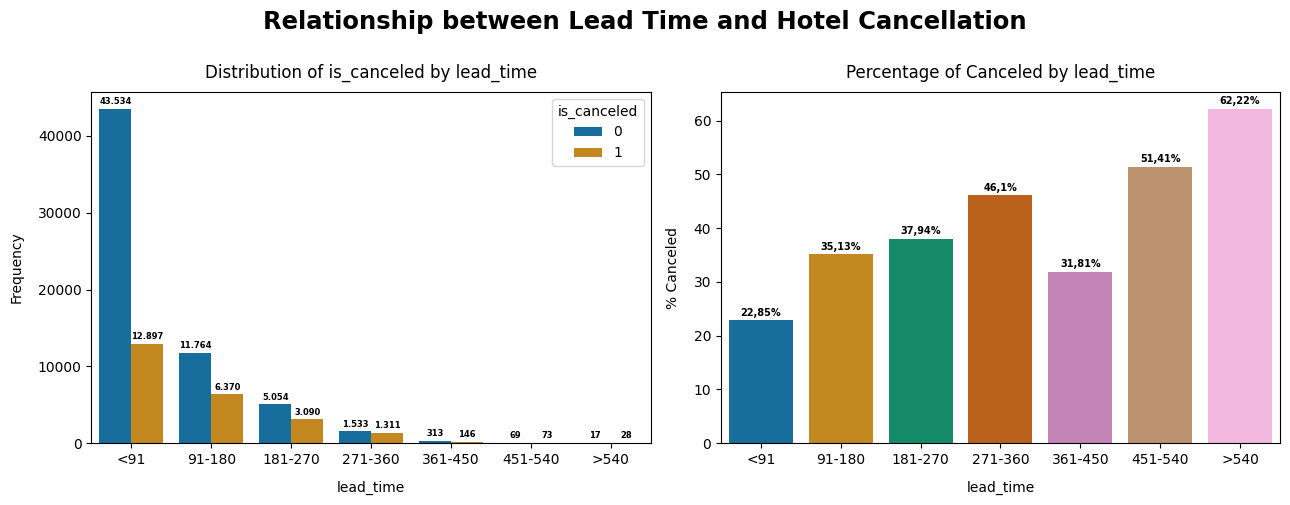

In [78]:
# membuat plot distribusi is_canceled berdasarkan kolom lead_time_group beserta persentase canceled-nya
plt.figure(figsize = (13, 5))
plt.suptitle("Relationship between Lead Time and Hotel Cancellation", fontsize = 17.5, y = 1, fontweight = "bold")

plt.subplot(1, 2, 1)
ax = sns.countplot(data = df_analysis, x = "lead_time_group", hue = "is_canceled", order = df_analysis["lead_time_group"].value_counts().index)
ax.set_title("Distribution of is_canceled by lead_time", pad = 10)
ax.set_xlabel("lead_time", labelpad = 10)
ax.set_ylabel("Frequency", labelpad = 10)
for container in ax.containers:
    ax.bar_label(
        container,
        labels = [f"{x:,.0f}".replace(",", ".") for x in container.datavalues],
        label_type = "edge",
        padding = 2,
        color = "black",
        fontweight = "bold",
        fontsize = 6
    )

plt.subplot(1, 2, 2)
ax = sns.barplot(data = df_lead_time, x = "lead_time_group", y = "% Canceled", order = df_lead_time.sort_values("Total", ascending = False)["lead_time_group"])
ax.set_title("Percentage of Canceled by lead_time", pad = 10)
ax.set_xlabel("lead_time", labelpad = 10)
ax.set_ylabel("% Canceled", labelpad = 10)
for container in ax.containers:
    ax.bar_label(
        container,
        labels = [f"{float(x)}%".replace(".", ",") for x in container.datavalues],
        label_type = "edge",
        padding = 2,
        color = "black",
        fontweight = "bold",
        fontsize = 7
    )

plt.tight_layout()
plt.show()

Berdasarkan grafik di atas, terlihat bahwa transaksi dengan `lead_time` kurang dari 91 hari mencatatkan jumlah pembatalan tertinggi, yaitu mencapai 12.897 transaksi. Akan tetapi, ketika dilakukan pengecekan terhadap transaksi yang tidak *cancel* pada masing-masing kelompok `lead_time`, ternyata persentase *cancel* untuk transaksi dengan `lead_time` kurang dari 91 hari memiliki nilai terendah di angka 22,85%. Jika ditinjau lebih lanjut, terlihat adanya kecenderungan bahwa persentase pembatalan transaksi meningkat seiring bertambah lamanya `lead_time` untuk suatu transaksi. Penyebabnya bisa berasal dari jarak waktu yang terlalu lama antara tanggal pemesanan hingga tanggal yang dijadwalkan untuk *check-in*, sehingga banyak faktor yang bisa dipertimbangkan oleh pemesan untuk melakukan pembatalan.

Dari hasil temuan di atas, kami merekomendasikan kepada pihak hotel untuk membuat kebijakan berikut:
- Batas waktu antara tanggal pemesanan hingga tanggal yang dijadwalkan untuk *check-in* harus dibatasi hingga 1 tahun (365 hari) untuk mengurangi kemungkinan terjadinya *cancel*, sehingga pemesan hanya diizinkan untuk melakukan *booking* maksimal H-365.
- Menerapkan kebijakan *reschedule* dan *refund* untuk pelanggan. Sebagai contoh, pengajuan *reschedule* dan *refund* harus dilakukan paling lambat H-7 sebelum tanggal *check-in*, dan jika melebihi batas waktu yang telah ditentukan, permintaan tersebut tidak dapat diproses. Kebijakan ini dapat menjadi pertimbangan bagi pelanggan untuk tidak serta merta melakukan pembatalan.
- Memberlakukan kebijakan penalti proporsional untuk pelanggan yang membatalkan reservasi mendekati tanggal *check-in*. Sebagai contoh, jika pelanggan membatalkan pada H-3 sebelum tanggal *check-in*, maka akan dikenakan biaya sebesar 50% dari harga kamar, sedangkan jika pembatalan terjadi pada H-1 sebelum tanggal *check-in*, maka transaksi tersebut akan dianggap batal tanpa pengembalian dana.

Tindakan tersebut juga dapat berfungsi sebagai langkah mitigasi risiko bagi hotel untuk merespons strategi ketika calon pelanggan melakukan pembatalan pada waktu yang mendekati tanggal *check-in*. Dengan demikian, hotel memiliki waktu maksimal H-7 untuk mengajukan penawaran atau menjual kamar kepada calon pelanggan baru sebagai respons terhadap pembatalan tersebut.

#### **Apakah jumlah pemesanan hotel yang tinggi pada bulan tertentu memiliki dampak pada persentase pembatalan *booking* hotel?**

In [79]:
# membuat table distribusi is_canceled berdasarkan tahun dan bulan dari arrival_date
df_analysis["arrival_date_year_month"] = df_analysis["arrival_date"].dt.to_period("M").dt.to_timestamp()
df_arrival_year_month = df_analysis.groupby(["arrival_date_year_month", "is_canceled"]).size().unstack().reset_index()
df_arrival_year_month.columns.name = None
df_arrival_year_month["Total"] = df_arrival_year_month[0] + df_arrival_year_month[1]
df_arrival_year_month

arrival_date_year_month     0     1  Total
0  2015-07-01               1118  507   1625 
1  2015-08-01               1829  567   2396 
2  2015-09-01               2215  547   2762 
3  2015-10-01               2190  424   2614 
4  2015-11-01               1384  242   1626 
5  2015-12-01               1548  368   1916 
6  2016-01-01               1520  297   1817 
7  2016-02-01               2239  519   2758 
8  2016-03-01               2892  882   3774 
9  2016-04-01               2705  1007  3712 
10 2016-05-01               2783  938   3721 
11 2016-06-01               2568  909   3477 
12 2016-07-01               2723  1085  3808 
13 2016-08-01               2949  1439  4388 
14 2016-09-01               2748  1073  3821 
15 2016-10-01               2971  1200  4171 
16 2016-11-01               2466  809   3275 
17 2016-12-01               2095  1005  3100 
18 2017-01-01               2067  735   2802 
19 2017-02-01               2356  882   3238 
20 2017-03-01               2698  943   3641 
21 2017-04-01               2724  1393  4117 
22 2017-05-01               3045  1499  4544 
23 2017-06-01               2786  1441  4227 
24 2017-07-01               2908  1595  4503 
25 2017-08-01               2757  1609  4366

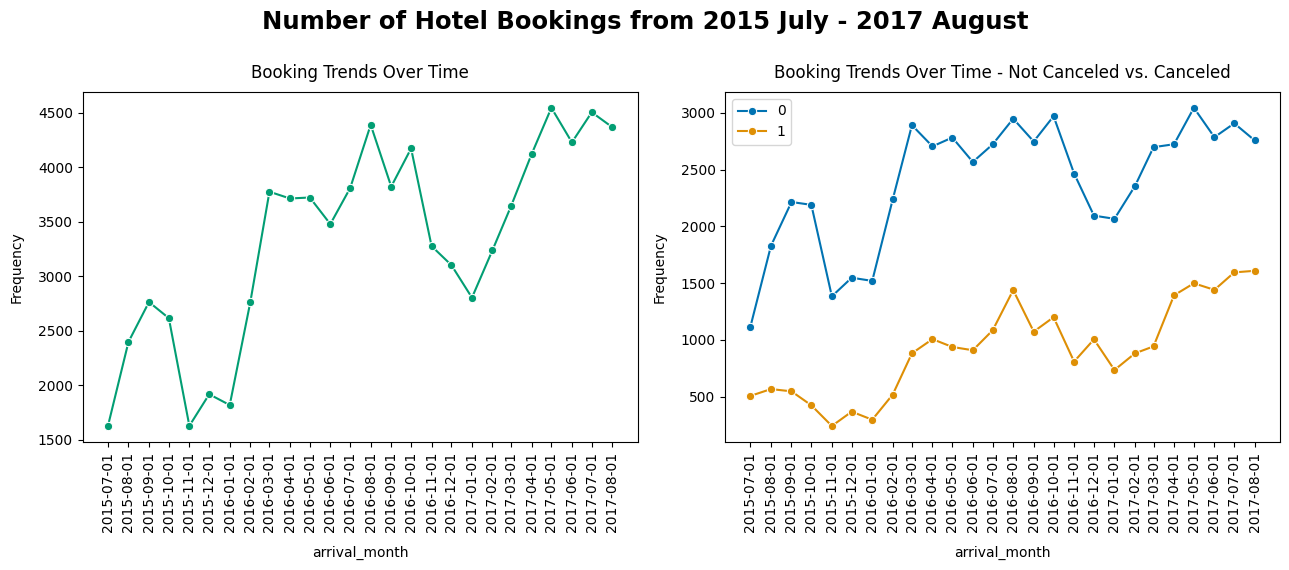

In [80]:
# membuat plot pemesanan dari waktu ke waktu berdasarkan tahun dan bulan dari arrival_date
plt.figure(figsize = (13, 5.65))
plt.suptitle("Number of Hotel Bookings from 2015 July - 2017 August", fontsize = 17.5, y = 1, fontweight = "bold")

plt.subplot(1, 2, 1)
sns.lineplot(data = df_arrival_year_month, x = "arrival_date_year_month", y = "Total", marker = "o", color = "#029E73")
plt.title("Booking Trends Over Time", pad = 10)
plt.xlabel("arrival_month", labelpad = 10)
plt.ylabel("Frequency", labelpad = 10)
plt.xticks(ticks = df_arrival_year_month["arrival_date_year_month"], rotation = "vertical")

plt.subplot(1, 2, 2)
sns.lineplot(data = df_arrival_year_month, x = "arrival_date_year_month", y = 0, marker = "o", color = "#0173B2", label = "0")
sns.lineplot(data = df_arrival_year_month, x = "arrival_date_year_month", y = 1, marker = "o", color = "#DE8F05", label = "1")
plt.title("Booking Trends Over Time - Not Canceled vs. Canceled", pad = 10)
plt.xlabel("arrival_month", labelpad = 10)
plt.ylabel("Frequency", labelpad = 10)
plt.xticks(ticks = df_arrival_year_month["arrival_date_year_month"], rotation = "vertical")

plt.tight_layout()
plt.show()


Dari grafik di atas, terlihat bahwa kecenderungan pemesanan hotel mencapai puncaknya di sekitar bulan Juli-Agustus yang merupakan musim panas dan umumnya termasuk ke dalam *high season*. Meskipun secara umum tren pemesanan hotel cenderung meningkat, tetapi terlihat penurunan pada bulan November-Januari yang merupakan musim dingin. Faktor musiman sangat mempengaruhi keputusan pelanggan dalam melakukan transaksi pada musim-musim tertentu. Oleh karena itu, kami menyarankan untuk meningkatkan pemasaran hotel selama musim dingin dan mengantisipasi pembatalan pemesanan pada musim panas yang merupakan *high season* di Negara Portugal.

In [81]:
# membuat table distribusi is_canceled berdasarkan kolom arrival_date_month beserta persentase canceled-nya
df_arrival_date_month = df_analysis.groupby(["arrival_date_month", "is_canceled"]).size().unstack().reset_index()
df_arrival_date_month.columns.name = None
df_arrival_date_month["Total"] = df_arrival_date_month[0] + df_arrival_date_month[1]
df_arrival_date_month["% Canceled"] = (df_arrival_date_month[1] / df_arrival_date_month["Total"] * 100).round(2)
df_arrival_date_month

arrival_date_month     0     1  Total  % Canceled
0   April              5429  2400  7829   30.66     
1   August             7535  3615  11150  32.42     
2   December           3643  1373  5016   27.37     
3   February           4595  1401  5996   23.37     
4   January            3587  1032  4619   22.34     
5   July               6749  3187  9936   32.08     
6   June               5354  2350  7704   30.50     
7   March              5590  1825  7415   24.61     
8   May                5828  2437  8265   29.49     
9   November           3850  1051  4901   21.44     
10  October            5161  1624  6785   23.94     
11  September          4963  1620  6583   24.61

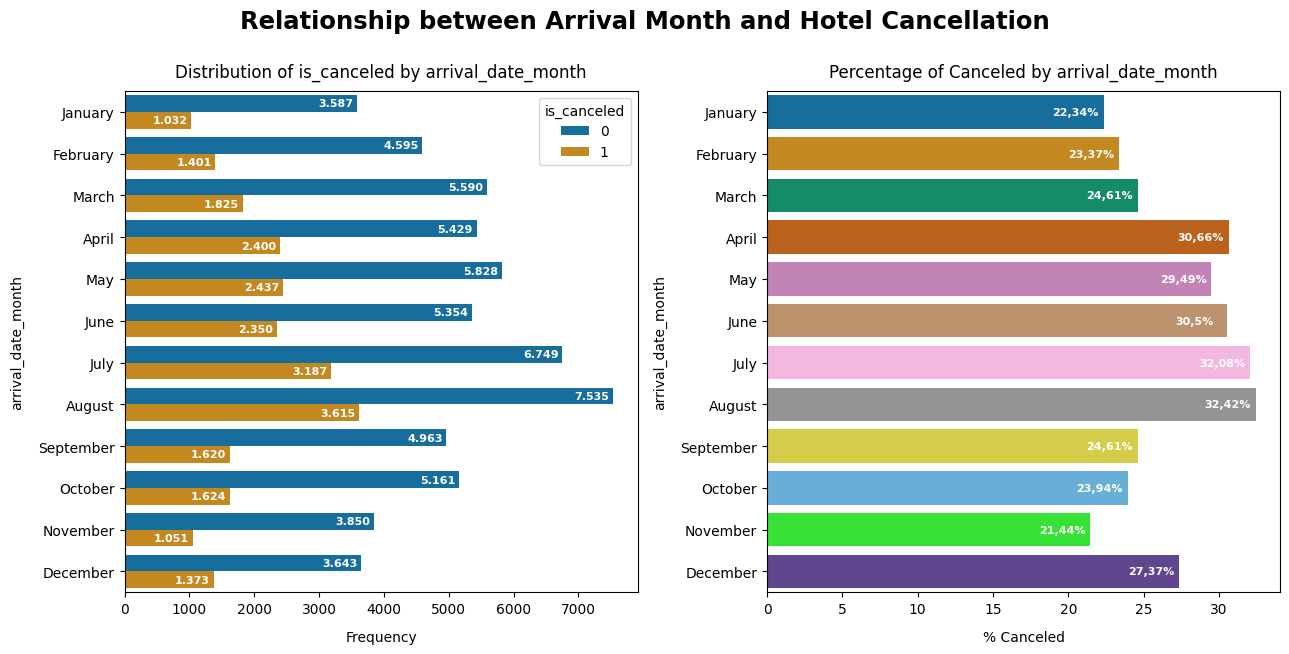

In [82]:
# membuat plot distribusi is_canceled berdasarkan kolom arrival_date_month beserta persentase canceled-nya
plt.figure(figsize = (13, 6.5))
plt.suptitle("Relationship between Arrival Month and Hotel Cancellation", fontsize = 17.5, y = 1, fontweight = "bold")

plt.subplot(1, 2, 1)
ax = sns.countplot(data = df_analysis, y = "arrival_date_month", hue = "is_canceled", order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])
ax.set_title("Distribution of is_canceled by arrival_date_month", pad = 10)
ax.set_xlabel("Frequency", labelpad = 10)
ax.set_ylabel("arrival_date_month", labelpad = 10)
for container in ax.containers:
    ax.bar_label(
        container,
        labels = [f"{x:,.0f}".replace(",", ".") for x in container.datavalues],
        label_type = "edge",
        padding = -28,
        color = "white",
        fontweight = "bold",
        fontsize = 8
    )

plt.subplot(1, 2, 2)
ax = sns.barplot(data = df_arrival_date_month, y = "arrival_date_month", x = "% Canceled", order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])
ax.set_title("Percentage of Canceled by arrival_date_month", pad = 10)
ax.set_xlabel("% Canceled", labelpad = 10)
ax.set_ylabel("arrival_date_month", labelpad = 10)
for container in ax.containers:
    ax.bar_label(
        container,
        labels = [f"{float(x)}%".replace(".", ",") for x in container.datavalues],
        label_type = "edge",
        padding = -37,
        color = "white",
        fontweight = "bold",
        fontsize = 8
    )

plt.tight_layout()
plt.show()

Terdapat kesamaan antara grafik sebelumnya dan grafik di atas, yang mengindikasikan bahwa bulan Juli dan Agustus merupakan bulan yang paling banyak diminati oleh para pengunjung, walaupun terdapat banyak pembatalan *booking* selama periode tersebut. Fenomena itu disebabkan karena adanya musim panas yang khususnya terjadi di wilayah Eropa (termasuk Portugal), di mana bulan tersebut merupakan periode liburan musim panas. Mengingat tingginya persentase pembatalan selama musim panas, kami merekomendasikan kepada pihak hotel untuk mengantisipasi pembatalan pada periode tersebut dengan mempertimbangkan kebijakan harga yang tepat. Sebelumnya, akan lebih baik untuk mengevaluasi harga dengan melihat *Average Daily Rate* (ADR) pada bulan-bulan tersebut.

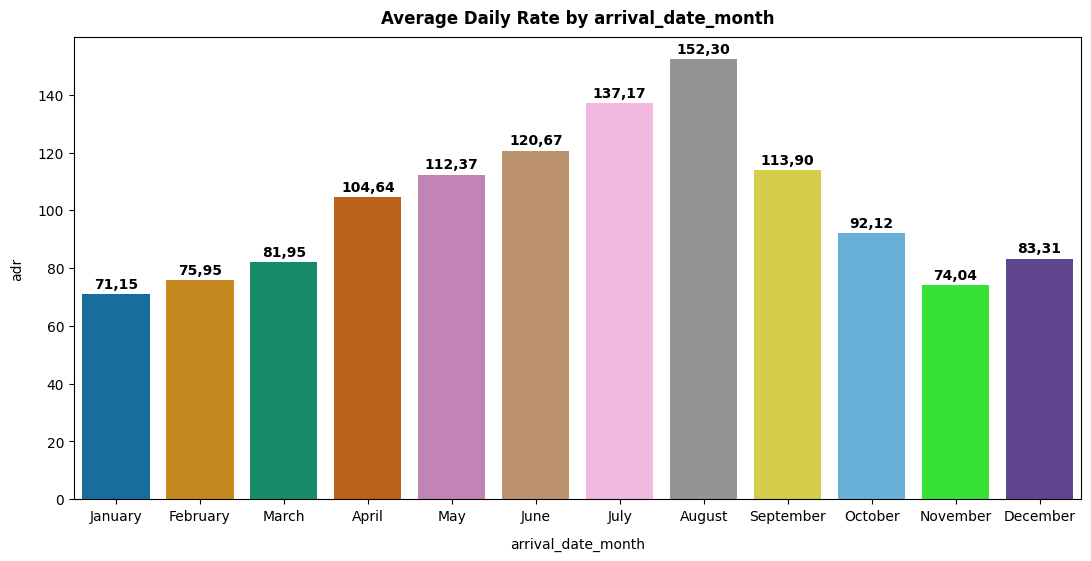

In [83]:
# menampilkan ADR setiap bulannya
plt.figure(figsize = (13, 6))
ax = sns.barplot(data = df_analysis, x = "arrival_date_month", y = "adr", order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"], ci = 0)
ax.set_title("Average Daily Rate by arrival_date_month", pad = 10, fontweight = "bold")
ax.set_xlabel("arrival_date_month", labelpad = 10)
ax.set_ylabel("adr", labelpad = 10)
for container in ax.containers:
    ax.bar_label(
        container,
        labels = [f"{float(x):,.2f}".replace(".", ",") for x in container.datavalues],
        label_type = "edge",
        padding = 2,
        color = "black",
        fontweight = "bold",
        fontsize = 10
    )
plt.show()

Setelah kita tinjau ADR-nya terhadap `arrival_date_month`, kita dapat melihat bahwa ADR cenderung meningkat dari bulan Januari hingga Agustus. Peningkatan tersebut terjadi selama musim dingin menuju musim panas, dengan puncaknya terjadi pada bulan Juli dan Agustus. Penyebabnya mungkin karena tingginya minat pada bulan-bulan tersebut atau peningkatan harga hotel selama *high season*. Secara umum, selama *high season* harga akomodasi dan faktor lain di daerah tujuan wisata cenderung naik, yang juga dapat menjadi pertimbangan bagi pemesan untuk membatalkan *booking*.

Oleh karena itu, kami merekomendasikan beberapa langkah yang dapat diambil oleh pihak hotel untuk mengurangi risiko pembatalan *booking*, yaitu:
- Memberikan penawaran yang lebih menarik kepada calon pelanggan (baik yang berpotensi membatalkan atau tidak) selama *high season*.
- Menarik calon pelanggan dengan memberikan *voucher* diskon seperti *voucher* acara musim panas.

### `Bagaimana fasilitas dan pelayanan hotel mempengaruhi pelanggan dalam membatalkan pemesanan hotel?`

#### **Jenis hotel apakah yang persentase pembatalannya terbesar?**

In [84]:
# membuat table distribusi is_canceled berdasarkan kolom hotel beserta persentase canceled-nya
df_hotel = df_analysis.groupby(["hotel", "is_canceled"]).size().unstack().reset_index()
df_hotel.columns.name = None
df_hotel["Total"] = df_hotel[0] + df_hotel[1]
df_hotel["% Canceled"] = (df_hotel[1] / df_hotel["Total"] * 100).round(2)
df_hotel

hotel      0      1  Total  % Canceled
0  City Hotel    36790  15986  52776  30.29     
1  Resort Hotel  25494  7929   33423  23.72

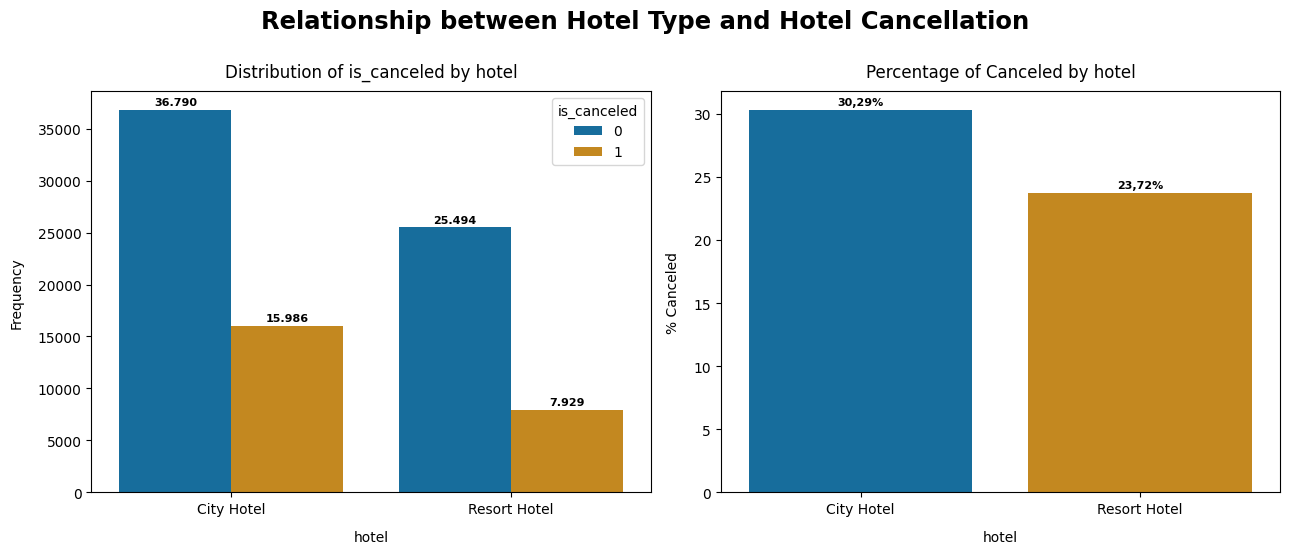

In [85]:
# membuat plot distribusi is_canceled berdasarkan kolom hotel beserta persentase canceled-nya
plt.figure(figsize = (13, 5.5))
plt.suptitle("Relationship between Hotel Type and Hotel Cancellation", fontsize = 17.5, y = 1, fontweight = "bold")

plt.subplot(1, 2, 1)
ax = sns.countplot(data = df_analysis, x = "hotel", hue = "is_canceled", order = df_analysis["hotel"].value_counts().index)
ax.set_title("Distribution of is_canceled by hotel", pad = 10)
ax.set_xlabel("hotel", labelpad = 10)
ax.set_ylabel("Frequency", labelpad = 10)
for container in ax.containers:
    ax.bar_label(
        container,
        labels = [f"{x:,.0f}".replace(",", ".") for x in container.datavalues],
        label_type = "edge",
        padding = 2,
        color = "black",
        fontweight = "bold",
        fontsize = 8
    )

plt.subplot(1, 2, 2)
ax = sns.barplot(data = df_hotel, x = "hotel", y = "% Canceled", order = df_hotel.sort_values("% Canceled", ascending = False)["hotel"])
ax.set_title("Percentage of Canceled by hotel", pad = 10)
ax.set_xlabel("hotel", labelpad = 10)
ax.set_ylabel("% Canceled", labelpad = 10)
for container in ax.containers:
    ax.bar_label(
        container,
        labels = [f"{float(x)}%".replace(".", ",") for x in container.datavalues],
        label_type = "edge",
        padding = 2,
        color = "black",
        fontweight = "bold",
        fontsize = 8
    )

plt.tight_layout()
plt.show()

Dari diagram di atas, terlihat bahwa jumlah pembatalan pemesanan hotel paling banyak terjadi pada kategori *City Hotel*, yaitu mencapai 15.986 transaksi, yang jumlahnya hampir dua kali lipat lebih banyak dibandingkan dengan kategori *Resort Hotel*. Secara proporsi, *City Hotel* pun memiliki persentase yang lebih besar, yaitu sekitar 30%. Faktor utama penyebab tingginya pembatalan pada *City Hotel* dapat dihubungkan dengan mayoritas pemesanan pada kategori tersebut. Persentase pembatalan yang signifikan mungkin disebabkan oleh faktor-faktor seperti perubahan rencana atau pertimbangan lokal yang mempengaruhi keputusan pemesanan.

Selain itu, perlu dicatat bahwa perbandingan kapasitas kamar antara *City Hotel* dan *Resort Hotel* menjadi faktor penentu dalam tingkat pembatalan. *Resort Hotel*, dengan kapasitas kamar yang lebih besar, mungkin mengalami pembatalan yang lebih rendah karena pengambilan keputusan melibatkan lebih banyak orang. Dengan demikian, pengelolaan terhadap *City Hotel* perlu menerapkan strategi khusus, seperti penawaran atau kebijakan pembatalan yang lebih fleksibel untuk mengatasi tingginya tingkat pembatalan pada kategori tersebut.

#### **Jenis paket makanan apakah yang persentase pembatalannya terbesar?**

In [86]:
# membuat table distribusi is_canceled berdasarkan kolom meal beserta persentase canceled-nya
df_meal = df_analysis.groupby(["meal", "is_canceled"]).size().unstack().reset_index()
df_meal.columns.name = None
df_meal["Total"] = df_meal[0] + df_meal[1]
df_meal["% Canceled"] = (df_meal[1] / df_meal["Total"] * 100).round(2)
df_meal

meal      0      1  Total  % Canceled
0  Bed and Breakfast  49178  17970  67148  26.76     
1  Full Board         257    98     355    27.61     
2  Half Board         6520   2437   8957   27.21     
3  Self Catering      6329   3410   9739   35.01

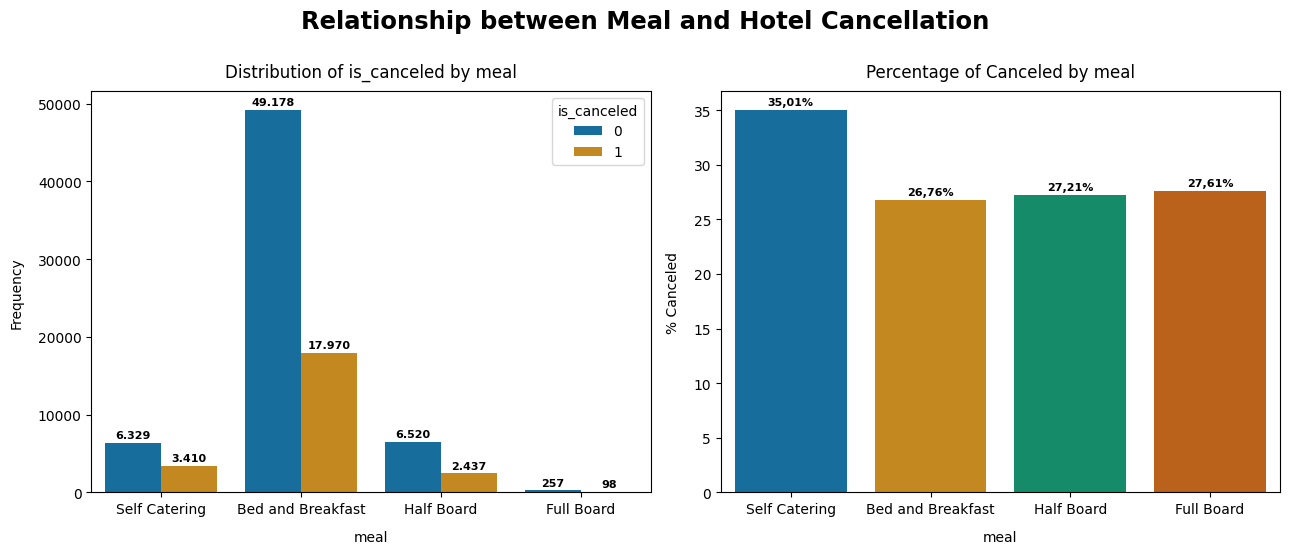

In [122]:
# membuat plot distribusi is_canceled berdasarkan kolom meal beserta persentase canceled-nya
plt.figure(figsize = (13, 5.5))
plt.suptitle("Relationship between Meal and Hotel Cancellation", fontsize = 17.5, y = 1, fontweight = "bold")

plt.subplot(1, 2, 1)
ax = sns.countplot(data = df_analysis, x = "meal", hue = "is_canceled", order = ["Self Catering", "Bed and Breakfast", "Half Board", "Full Board"])
ax.set_title("Distribution of is_canceled by meal", pad = 10)
ax.set_xlabel("meal", labelpad = 10)
ax.set_ylabel("Frequency", labelpad = 10)
for container in ax.containers:
    ax.bar_label(
        container,
        labels = [f"{x:,.0f}".replace(",", ".") for x in container.datavalues],
        label_type = "edge",
        padding = 2,
        color = "black",
        fontweight = "bold",
        fontsize = 8
    )

plt.subplot(1, 2, 2)
ax = sns.barplot(data = df_meal, x = "meal", y = "% Canceled", order = ["Self Catering", "Bed and Breakfast", "Half Board", "Full Board"])
ax.set_title("Percentage of Canceled by meal", pad = 10)
ax.set_xlabel("meal", labelpad = 10)
ax.set_ylabel("% Canceled", labelpad = 10)
for container in ax.containers:
    ax.bar_label(
        container,
        labels = [f"{float(x)}%".replace(".", ",") for x in container.datavalues],
        label_type = "edge",
        padding = 2,
        color = "black",
        fontweight = "bold",
        fontsize = 8
    )

plt.tight_layout()
plt.show()

In [88]:
df_analysis.groupby("meal")["adr"].mean()

meal
Bed and Breakfast    104.864657
Full Board           145.311887
Half Board           135.163770
Self Catering        100.860482
Name: adr, dtype: float64

Dari grafik tersebut, dapat disimpulkan bahwa opsi *Bed and Breakfast* mencatatkan jumlah pembatalan tertinggi, yaitu mencapai 17.970 pemesanan. Hal ini dapat dianggap sebagai sesuatu yang wajar ketika melihat mayoritas pemesan hotel memilih *Bed and Breakfast*, dengan asumsi agar mereka tidak perlu mencari sarapan di luar hotel setiap pagi demi menghemat waktu dan tenaga. Akan tetapi, proporsi pembatalan terbesar terjadi pada kategori *Self Catering* dengan persentase sebesar 35,01%. Kemungkinan besarnya disebabkan oleh perbedaan harga yang tidak signifikan antara *Self Catering* dan *Bed and Breakfast*, yaiut sekitar €4, yang membuat konsumen cenderung memilih opsi sarapan di hotel tanpa harus mencarinya di luar.

##### Menguji independency/keterkaitan antara kolom `is_canceled` dan `meal`

Hipotesis:
- Ho: `is_canceled` dan `meal` tidak terkait/independent (proporsinya sama)
- Ha: `is_canceled` dan `meal` terkait/dependent (proporsinya berbeda signifikan)

In [89]:
# Membuat pivot table untuk analisis chi-squared
meal_pivot = df_analysis.pivot_table(index = "is_canceled", columns = "meal", values = "adr", aggfunc = lambda x : round(x.mean(), 2))
meal_pivot

meal         Bed and Breakfast  Full Board  Half Board  Self Catering
is_canceled                                                          
0            100.59             147.27      128.78      100.72       
1            116.56             140.17      152.26      101.11

In [90]:
# nilai pvalue
stat, pvalue, dof, expected = chi2_contingency(meal_pivot)
pvalue

0.5262137051789904

In [91]:
# chi-squared test
if pvalue > 0.05:
    print(f'''
    pvalue = {pvalue:.5f}. pvalue > 0.05. Gagal menolak Ho.
    Kita TIDAK punya cukup bukti untuk mengatakan bahwa antara is_canceled dan meal ada keterkaitan (dependent)
    (Proporsinya TIDAK berbeda signifikan)
    ''')
else:
    print(f'''
    pvalue = {pvalue:.5f}. pvalue <= 0.05. Menolak Ho.
    Kita punya cukup bukti untuk mengatakan bahwa antara is_canceled dan meal ada keterkaitan (dependent)
    (Proporsinya berbeda signifikan)
    ''')


    pvalue = 0.52621. pvalue > 0.05. Gagal menolak Ho.
    Kita TIDAK punya cukup bukti untuk mengatakan bahwa antara is_canceled dan meal ada keterkaitan (dependent)
    (Proporsinya TIDAK berbeda signifikan)
    


Setelah melakukan pengetesan, ternyata proporsi tersebut tidak menunjukkan perbedaan yang signifikan. Oleh karena itu, kami merekomendasikan kepada tim pemasaran untuk menyusun penawaran menarik, seperti promosi sarapan gratis, khususnya untuk pelanggan *Self Catering* yang memiliki kecenderungan untuk melakukan pembatalan.

#### **Bagaimana pengaruh jumlah lahan parkir yang dibutuhkan terhadap pembatalan pemesanan hotel?**

In [92]:
# membuat table distribusi is_canceled berdasarkan kolom required_car_parking_spaces beserta persentase canceled-nya
df_parking_spaces = df_analysis.groupby(["required_car_parking_spaces", "is_canceled"]).size().unstack().reset_index()
df_parking_spaces.columns.name = None
df_parking_spaces["Total"] = df_parking_spaces[0] + df_parking_spaces[1]
df_parking_spaces["% Canceled"] = (df_parking_spaces[1] / df_parking_spaces["Total"] * 100).round(2)
df_parking_spaces = df_parking_spaces.fillna(0)
df_parking_spaces

required_car_parking_spaces        0        1    Total  % Canceled
0  0                            55016.0  23915.0  78931.0  30.3      
1  1                            7237.0   0.0      0.0      0.0       
2  2                            28.0     0.0      0.0      0.0       
3  3                            3.0      0.0      0.0      0.0

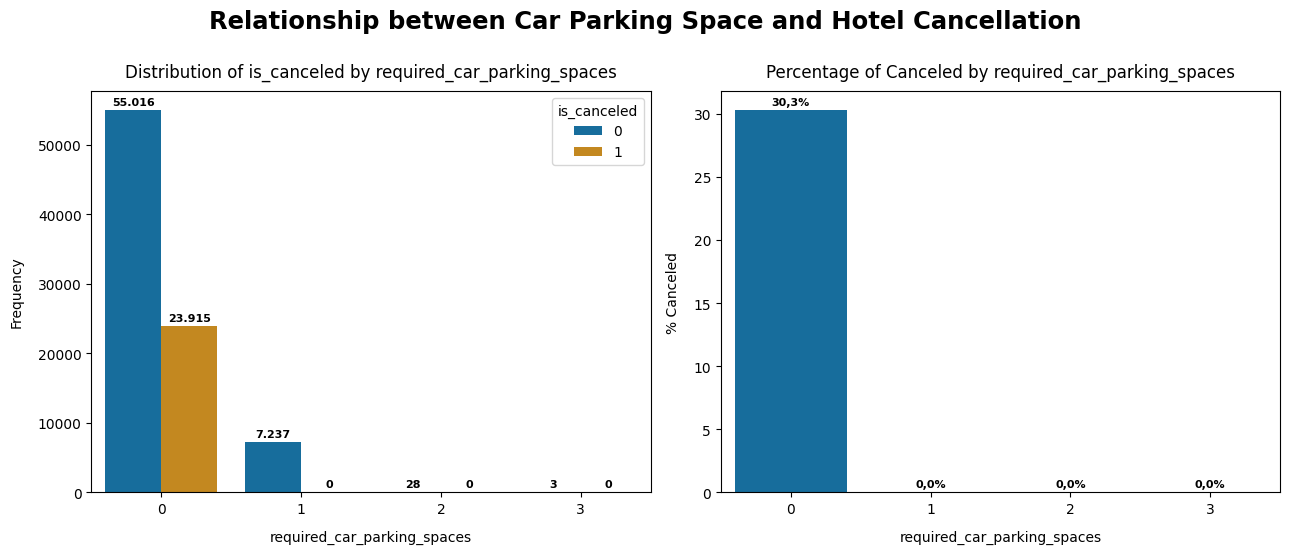

In [93]:
# membuat plot distribusi is_canceled berdasarkan kolom required_car_parking_spaces beserta persentase canceled-nya
plt.figure(figsize = (13, 5.5))
plt.suptitle("Relationship between Car Parking Space and Hotel Cancellation", fontsize = 17.5, y = 1, fontweight = "bold")

plt.subplot(1, 2, 1)
ax = sns.countplot(data = df_analysis, x = "required_car_parking_spaces", hue = "is_canceled", order = df_parking_spaces.index)
ax.set_title("Distribution of is_canceled by required_car_parking_spaces", pad = 10)
ax.set_xlabel("required_car_parking_spaces", labelpad = 10)
ax.set_ylabel("Frequency", labelpad = 10)
for container in ax.containers:
    ax.bar_label(
        container,
        labels = [f"{x:,.0f}".replace(",", ".") for x in container.datavalues],
        label_type = "edge",
        padding = 2,
        color = "black",
        fontweight = "bold",
        fontsize = 8
    )

plt.subplot(1, 2, 2)
ax = sns.barplot(data = df_parking_spaces, x = "required_car_parking_spaces", y = "% Canceled", order = df_parking_spaces.index)
ax.set_title("Percentage of Canceled by required_car_parking_spaces", pad = 10)
ax.set_xlabel("required_car_parking_spaces", labelpad = 10)
ax.set_ylabel("% Canceled", labelpad = 10)
for container in ax.containers:
    ax.bar_label(
        container,
        labels = [f"{float(x)}%".replace(".", ",") for x in container.datavalues],
        label_type = "edge",
        padding = 2,
        color = "black",
        fontweight = "bold",
        fontsize = 8
    )

plt.tight_layout()
plt.show()

Berdasarkan grafik di atas, terlihat bahwa sebagian besar pengunjung tidak memerlukan lahan parkir yang kemungkinannya itu karena mereka tidak membawa kendaraan pribadi. Terdapat 23.915 transaksi yang tidak membutuhkan lahan parkir namun tetap melakukan pembatalan. Sederhananya, hal ini menunjukkan bahwa ketersediaan lahan parkir tidak menjadi faktor utama dalam keputusan untuk membatalkan pemesanan. Pengamatan ini juga diperkuat dengan kenyataan bahwa pelanggan yang memerlukan lahan parkir tidak cenderung melakukan pembatalan pemesanan, yang menunjukkan bahwa hotel mampu memenuhi kebutuhan pemesan terkait fasilitas lahan parkir.

#### **Apakah banyaknya permintaan khusus terkait fasilitas hotel mempengaruhi pembatalan pemesanan hotel?**

In [94]:
# membuat table distribusi is_canceled berdasarkan kolom total_of_special_requests beserta persentase canceled-nya
df_special_request = df_analysis.groupby(["total_of_special_requests", "is_canceled"]).size().unstack().reset_index()
df_special_request.columns.name = None
df_special_request["Total"] = df_special_request[0] + df_special_request[1]
df_special_request["% Canceled"] = (df_special_request[1] / df_special_request["Total"] * 100).round(2)
df_special_request

total_of_special_requests      0      1  Total  % Canceled
0  0                          28600  14486  43086  33.62     
1  1                          22255  6484   28739  22.56     
2  2                          9204   2513   11717  21.45     
3  3                          1906   396    2302   17.20     
4  4                          285    34     319    10.66     
5  5                          34     2      36     5.56

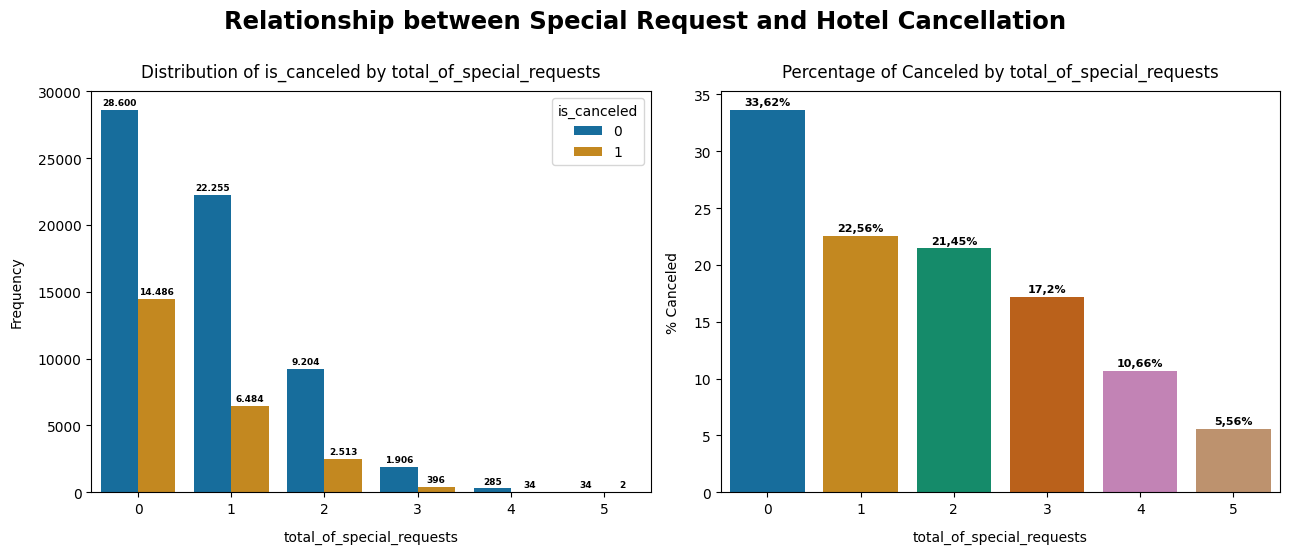

In [95]:
# membuat plot distribusi is_canceled berdasarkan kolom total_of_special_requests beserta persentase canceled-nya
plt.figure(figsize = (13, 5.5))
plt.suptitle("Relationship between Special Request and Hotel Cancellation", fontsize = 17.5, y = 1, fontweight = "bold")

plt.subplot(1, 2, 1)
ax = sns.countplot(data = df_analysis, x = "total_of_special_requests", hue = "is_canceled")
ax.set_title("Distribution of is_canceled by total_of_special_requests", pad = 10)
ax.set_xlabel("total_of_special_requests", labelpad = 10)
ax.set_ylabel("Frequency", labelpad = 10)
for container in ax.containers:
    ax.bar_label(
        container,
        labels = [f"{x:,.0f}".replace(",", ".") for x in container.datavalues],
        label_type = "edge",
        padding = 2,
        color = "black",
        fontweight = "bold",
        fontsize = 6.5
    )

plt.subplot(1, 2, 2)
ax = sns.barplot(data = df_special_request, x = "total_of_special_requests", y = "% Canceled")
ax.set_title("Percentage of Canceled by total_of_special_requests", pad = 10)
ax.set_xlabel("total_of_special_requests", labelpad = 10)
ax.set_ylabel("% Canceled", labelpad = 10)
for container in ax.containers:
    ax.bar_label(
        container,
        labels = [f"{float(x)}%".replace(".", ",") for x in container.datavalues],
        label_type = "edge",
        padding = 2,
        color = "black",
        fontweight = "bold",
        fontsize = 8
    )

plt.tight_layout()
plt.show()

Berdasarkan grafik di atas, sebagian besar pembatalan berasal dari pelanggan yang tidak mengajukan permintaan khusus. Jika diperhatikan lebih lanjut, dapat disimpulkan bahwa semakin banyak jumlah permintaan khusus, maka jumlah pembatalan hotel cenderung berkurang, begitupun dengan persentasenya juga. Namun perlu dicatat bahwa jumlah transaksi yang memiliki permintaan khusus lebih dari 3 memiliki frekuensi transaksi yang lebih sedikit dibandingkan dengan transaksi tanpa permintaan khusus. Oleh karena itu, kami menyarankan kepada tim penyedia layanan hotel untuk proaktif dalam menawarkan opsi permintaan khusus kepada pelanggan yang tidak mengajukan permintaan apapun.

#### **Bagaimana pengaruh perbedaan antara tipe kamar yang dipesan dengan tipe kamar yang disediakan oleh hotel?**

In [96]:
# menggabungkan data pada kolom reserved_room_type & assigned_room_type
df_reserved = df_analysis[["reserved_room_type"]].rename(columns = {"reserved_room_type" : "room_type"})
df_reserved["room_status"] = "reserved"

df_assigned = df_analysis[["assigned_room_type"]].rename(columns = {"assigned_room_type" : "room_type"})
df_assigned["room_status"] = "assigned"

df_room = pd.concat([df_reserved, df_assigned], axis = 0)

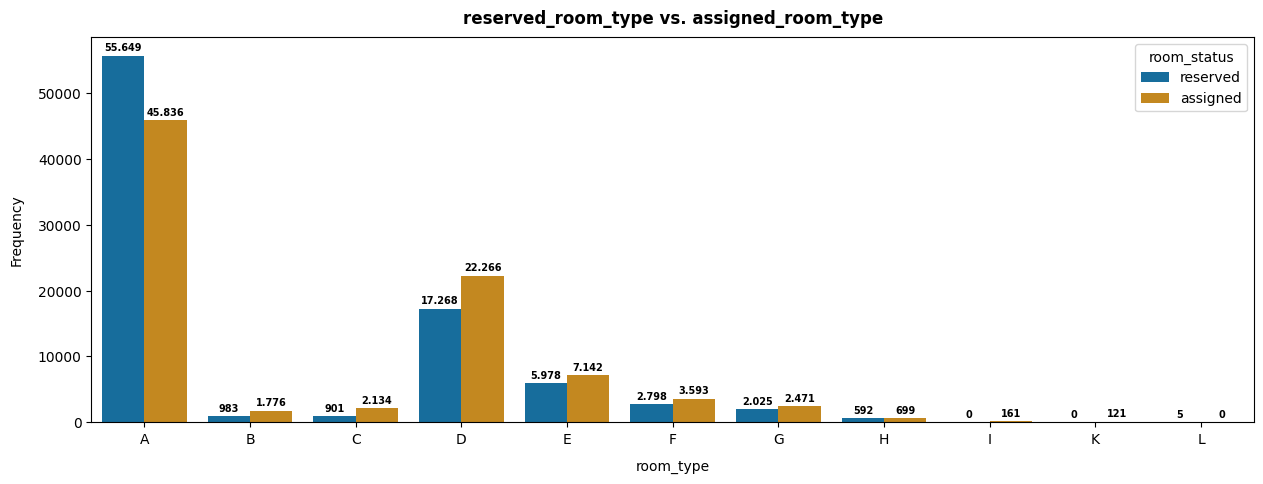

In [97]:
# menampilkan distribusi reserved_room_type & assigned_room_type
plt.figure(figsize = (15, 5))
ax = sns.countplot(data = df_room, x = "room_type", hue = "room_status", order = sorted(df_room["room_type"].unique()))
ax.set_title("reserved_room_type vs. assigned_room_type", fontsize = 12, pad = 10, fontweight = "bold")
ax.set_xlabel("room_type", labelpad = 10)
ax.set_ylabel("Frequency", labelpad = 10)
for container in ax.containers:
    ax.bar_label(
        container,
        labels = [f"{x:,.0f}".replace(",", ".") for x in container.datavalues],
        label_type = "edge",
        padding = 2,
        color = "black",
        fontweight = "bold",
        fontsize = 7
    )
plt.show()

Dari grafik tersebut, dapat disimpulkan bahwa secara umum minat pelanggan cenderung tertuju pada tipe kamar A, D, dan E. Perlu diketahui bahwa sejumlah pelanggan mendapatkan kamar yang tidak sesuai dengan permintaan saat melakukan pemesanan. Situasi ini dapat berpotensi menyebabkan pembatalan oleh pelanggan atau menurunkan tingkat kepuasan mereka. Oleh karena itu, kami memberikan rekomendasi kepada pihak hotel untuk menerapkan tindakan berikut:
- Apabila pihak hotel perlu mengganti kamar yang tidak sesuai dengan pemesanan pelanggan karena keterbatasan ketersediaan, pihak hotel disarankan agar terlebih dahulu menanyakan persetujuan pelanggan terhadap perubahan kamar.
- Pihak hotel sebaiknya memberikan kompensasi kepada pelanggan, seperti menyediakan sarapan gratis jika pelanggan tidak memilih paket sarapan, atau memberikan potongan harga untuk pemesanan selanjutnya.
- Jika ketersediaan kamar di hotel tidak sesuai dengan pemesanan, sebaiknya pihak hotel berusaha memberikan peningkatan kamar secara gratis kepada pelanggan.
- Pihak hotel perlu melakukan perbaikan pada sistem ketersediaan kamar guna menjamin akurasi, sehingga dapat menghindari ketidaksesuaian antara kamar yang dipesan dan yang tersedia.

### `Bagaimana karakteristik pelanggan yang melakukan pembatalan pemesanan hotel?`

#### **Bagaimana pengaruh jumlah pengunjung dalam satu transaksi terhadap pembatalan pemesanan hotel?**

In [98]:
# membuat table distribusi is_canceled berdasarkan kolom visitor_group beserta persentase canceled-nya
df_visitor = df_analysis.groupby(["visitor_group", "is_canceled"]).size().unstack().reset_index()
df_visitor.columns.name = None
df_visitor["Total"] = df_visitor[0] + df_visitor[1]
df_visitor["% Canceled"] = (df_visitor[1] / df_visitor["Total"] * 100).round(2)
df_visitor

visitor_group      0      1  Total  % Canceled
0  1             12573  3054   15627  19.54     
1  2             40498  16067  56565  28.40     
2  3             6868   3156   10024  31.48     
3  4             2243   1606   3849   41.73     
4  >4            102    32     134    23.88

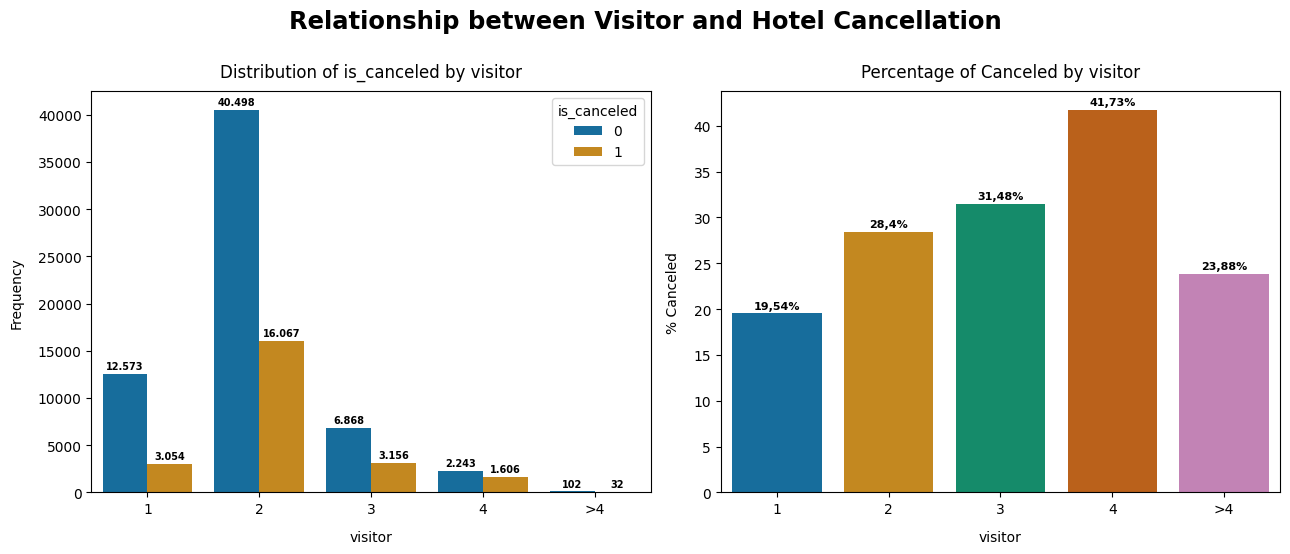

In [99]:
# membuat plot distribusi is_canceled berdasarkan kolom visitor_group beserta persentase canceled-nya
plt.figure(figsize = (13, 5.5))
plt.suptitle("Relationship between Visitor and Hotel Cancellation", fontsize = 17.5, y = 1, fontweight = "bold")

plt.subplot(1, 2, 1)
ax = sns.countplot(data = df_analysis, x = "visitor_group", hue = "is_canceled")
ax.set_title("Distribution of is_canceled by visitor", pad = 10)
ax.set_xlabel("visitor", labelpad = 10)
ax.set_ylabel("Frequency", labelpad = 10)
for container in ax.containers:
    ax.bar_label(
        container,
        labels = [f"{x:,.0f}".replace(",", ".") for x in container.datavalues],
        label_type = "edge",
        padding = 2,
        color = "black",
        fontweight = "bold",
        fontsize = 7
    )

plt.subplot(1, 2, 2)
ax = sns.barplot(data = df_visitor, x = "visitor_group", y = "% Canceled")
ax.set_title("Percentage of Canceled by visitor", pad = 10)
ax.set_xlabel("visitor", labelpad = 10)
ax.set_ylabel("% Canceled", labelpad = 10)
for container in ax.containers:
    ax.bar_label(
        container,
        labels = [f"{float(x)}%".replace(".", ",") for x in container.datavalues],
        label_type = "edge",
        padding = 2,
        color = "black",
        fontweight = "bold",
        fontsize = 8
    )

plt.tight_layout()
plt.show()

Berdasarkan grafik di atas, terlihat bahwa pengunjung yang berjumlah 2 orang mencatatkan jumlah pembatalan tertinggi, yaitu mencapai 16.067 transaksi. Meskipun demikian, jika dilihat proporsinya, pengunjung dengan jumlah 4 orang memiliki persentase paling besar dalam melakukan pembatalan pemesanan hotel. Grafik tersebut menunjukkan adanya kecenderungan, di mana semakin banyak pengunjung dalam satu transaksi, maka peluang atau persentase pembatalannya cenderung lebih tinggi (kita anggap transaksi dengan pengunjung lebih dari 4 sebagai anomali di karenakan jumlah transaksinya yang sedikit). Hal tersebut mungkin disebabkan oleh beberapa faktor, seperti koordinasi yang lebih sulit dalam kelompok yang lebih besar, kecenderungan perencanaan yang lebih kompleks sehingga sangat sensitif terhadap perubahan rencana, atau faktor lain yang mempengaruhi keputusan pembatalan. Oleh karena itu, kami merekomendasikan pada pihak hotel untuk menerapkan kebijakan deposit bagi jumlah pengunjung yang lebih dari satu orang sebagai upaya dalam mengurangi peluang terjadinya *cancel*.

#### **Apakah tipe pelanggan berpengaruh terhadap pembatalan pemesanan hotel?**

In [100]:
# membuat table distribusi is_canceled berdasarkan kolom customer_type beserta persentase canceled-nya
df_customer_type = df_analysis.groupby(["customer_type", "is_canceled"]).size().unstack().reset_index()
df_customer_type.columns.name = None
df_customer_type["Total"] = df_customer_type[0] + df_customer_type[1]
df_customer_type["% Canceled"] = (df_customer_type[1] / df_customer_type["Total"] * 100).round(2)
df_customer_type

customer_type      0      1  Total  % Canceled
0  Contract         2604   511    3115   16.40     
1  Group            478    37     515    7.18      
2  Transient        49593  21610  71203  30.35     
3  Transient-Party  9609   1757   11366  15.46

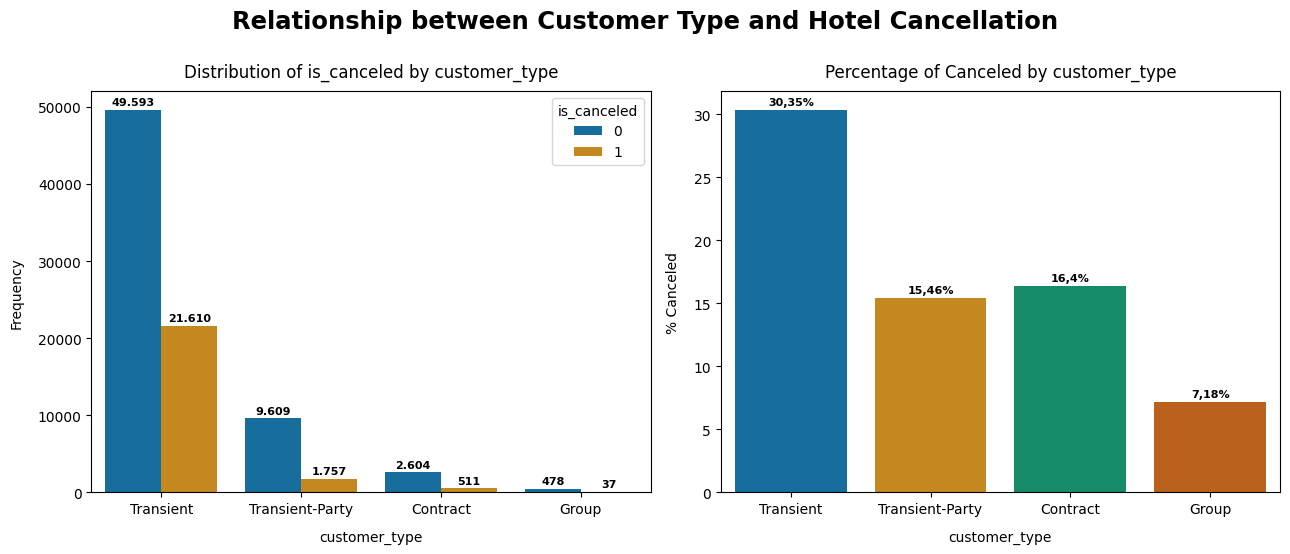

In [123]:
# membuat plot distribusi is_canceled berdasarkan kolom customer_type beserta persentase canceled-nya
plt.figure(figsize = (13, 5.5))
plt.suptitle("Relationship between Customer Type and Hotel Cancellation", fontsize = 17.5, y = 1, fontweight = "bold")

plt.subplot(1, 2, 1)
ax = sns.countplot(data = df_analysis, x = "customer_type", hue = "is_canceled", order = df_customer_type.sort_values("Total", ascending = False)["customer_type"].unique())
ax.set_title("Distribution of is_canceled by customer_type", pad = 10)
ax.set_xlabel("customer_type", labelpad = 10)
ax.set_ylabel("Frequency", labelpad = 10)
for container in ax.containers:
    ax.bar_label(
        container,
        labels = [f"{x:,.0f}".replace(",", ".") for x in container.datavalues],
        label_type = "edge",
        padding = 2,
        color = "black",
        fontweight = "bold",
        fontsize = 8
    )

plt.subplot(1, 2, 2)
ax = sns.barplot(data = df_customer_type, x = "customer_type", y = "% Canceled", order = df_customer_type.sort_values("Total", ascending = False)["customer_type"].unique())
ax.set_title("Percentage of Canceled by customer_type", pad = 10)
ax.set_xlabel("customer_type", labelpad = 10)
ax.set_ylabel("% Canceled", labelpad = 10)
for container in ax.containers:
    ax.bar_label(
        container,
        labels = [f"{float(x)}%".replace(".", ",") for x in container.datavalues],
        label_type = "edge",
        padding = 2,
        color = "black",
        fontweight = "bold",
        fontsize = 8
    )

plt.tight_layout()
plt.show()

Berdasarkan grafik di atas, dapat dilihat bahwa kelompok pelanggan *Transient* merupakan kelompok yang memiliki jumlah pembatalan pemesanan paling tinggi, yaitu mencapai 21.610 transaksi, sedangkan kelompok *Group* memiliki jumlah pembatalan paling rendah dengan hanya 37 transaksi dari total 515 transaksi. Dari segi persentase pun, pelanggan *Transient* menunjukkan tingkat pembatalan yang sangat signifikan. Melihat karakteristik pelanggan *Transient* sebagai pelanggan yang melakukan pemesanan secara individu dan tidak terikat kontrak jangka panjang, seperti wisatawan yang merencanakan liburan atau perjalanan bisnis dalam waktu singkat, kami merekomendasikan kepada tim pemasaran untuk menerapkan paket promosi khusus. Upaya tersebut dapat melibatkan pembuatan iklan yang ditargetkan kepada akun media sosial pribadi, dengan menawarkan promo liburan atau penawaran khusus akhir pekan yang dapat menarik perhatian pelanggan *Transient*, karena secara *domain knowledge* kelompok pelanggan *Transient* lebih cenderung melakukan pemesanan hotel pada akhir pekan.

#### **Bagaimana pengaruh banyaknya reservasi hotel yang dibatalkan sebelumnya terhadap pembatalan pemesanan hotel terkini?**

In [102]:
# membuat table distribusi is_canceled berdasarkan kolom previous_cancellations_group beserta persentase canceled-nya
df_previous_cancellations = df_analysis.groupby(["previous_cancellations_group", "is_canceled"]).size().unstack().reset_index()
df_previous_cancellations.columns.name = None
df_previous_cancellations["Total"] = df_previous_cancellations[0] + df_previous_cancellations[1]
df_previous_cancellations["% Canceled"] = (df_previous_cancellations[1] / df_previous_cancellations["Total"] * 100).round(2)
df_previous_cancellations

previous_cancellations_group      0      1  Total  % Canceled
0  No                           61751  22785  84536  26.95     
1  Yes                          533    1130   1663   67.95

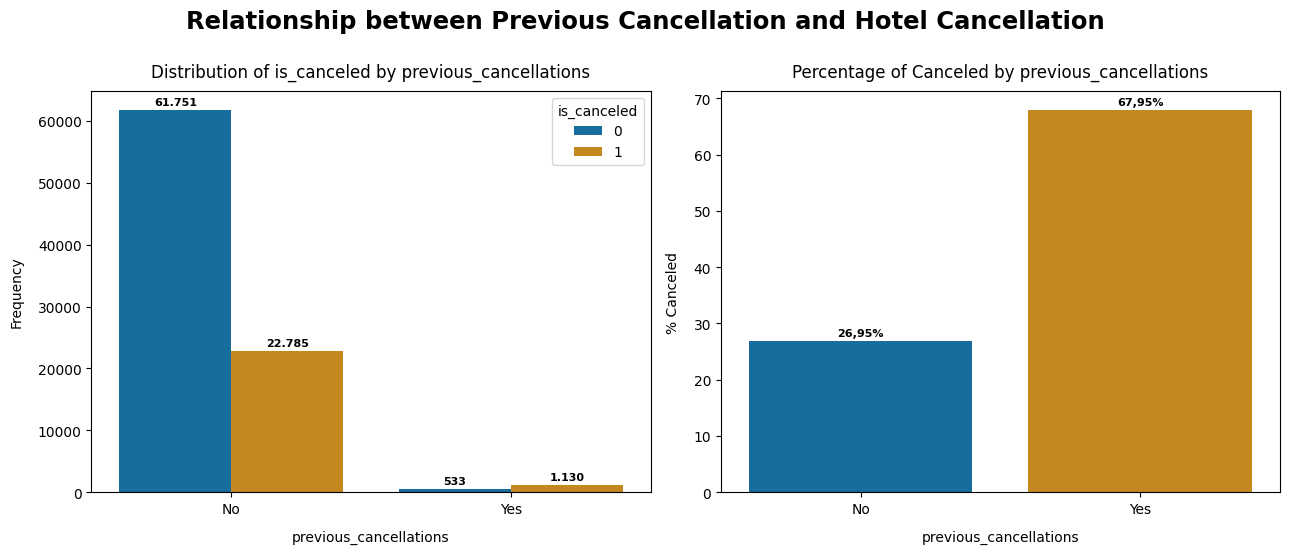

In [103]:
# membuat plot distribusi is_canceled berdasarkan kolom previous_cancellations_group beserta persentase canceled-nya
plt.figure(figsize = (13, 5.5))
plt.suptitle("Relationship between Previous Cancellation and Hotel Cancellation", fontsize = 17.5, y = 1, fontweight = "bold")

plt.subplot(1, 2, 1)
ax = sns.countplot(data = df_analysis, x = "previous_cancellations_group", hue = "is_canceled")
ax.set_title("Distribution of is_canceled by previous_cancellations", pad = 10)
ax.set_xlabel("previous_cancellations", labelpad = 10)
ax.set_ylabel("Frequency", labelpad = 10)
for container in ax.containers:
    ax.bar_label(
        container,
        labels = [f"{x:,.0f}".replace(",", ".") for x in container.datavalues],
        label_type = "edge",
        padding = 2,
        color = "black",
        fontweight = "bold",
        fontsize = 8
    )

plt.subplot(1, 2, 2)
ax = sns.barplot(data = df_previous_cancellations, x = "previous_cancellations_group", y = "% Canceled")
ax.set_title("Percentage of Canceled by previous_cancellations", pad = 10)
ax.set_xlabel("previous_cancellations", labelpad = 10)
ax.set_ylabel("% Canceled", labelpad = 10)
for container in ax.containers:
    ax.bar_label(
        container,
        labels = [f"{float(x)}%".replace(".", ",") for x in container.datavalues],
        label_type = "edge",
        padding = 2,
        color = "black",
        fontweight = "bold",
        fontsize = 8
    )

plt.tight_layout()
plt.show()

Berdasarkan faktor `previous_cancellations`, terlihat bahwa pelanggan yang sebelumnya melakukan pembatalan memiliki persentase pembatalan yang lebih tinggi pada transaksi berikutnya. Oleh karena itu, kami merekomendasikan kepada pihak hotel untuk memberikan perlakuan khusus kepada konsumen yang sebelumnya  melakukan pembatalan. Beberapa rekomendasi tersebut melibatkan:
- Menawarkan opsi untuk *reschedule* jika calon pelanggan mengalami ketidaksesuaian atau ketidakpastian terkait tanggal, dengan harapan ini dapat mencegah calon pelanggan agar tidak langsung melakukan pembatalan.
- Memberikan penawaran terkait permintaan khusus yang dapat dipenuhi oleh pihak hotel, sehingga hal ini dapat menjadi salah satu strategi untuk meningkatkan kepuasan pelanggan dan mengurangi kemungkinan pembatalan.

#### **Bagaimana pengaruh pemesan hotel yang sebelumnya pernah melakukan reservasi terhadap pembatalan pemesanan hotel?**

In [104]:
# membuat table distribusi is_canceled berdasarkan kolom is_repeated_guest beserta persentase canceled-nya
df_repeated_guest = df_analysis.groupby(["is_repeated_guest", "is_canceled"]).size().unstack().reset_index()
df_repeated_guest.columns.name = None
df_repeated_guest["Total"] = df_repeated_guest[0] + df_repeated_guest[1]
df_repeated_guest["% Canceled"] = (df_repeated_guest[1] / df_repeated_guest["Total"] * 100).round(2)
df_repeated_guest

is_repeated_guest      0      1  Total  % Canceled
0  0                  59413  23657  83070  28.48     
1  1                  2871   258    3129   8.25

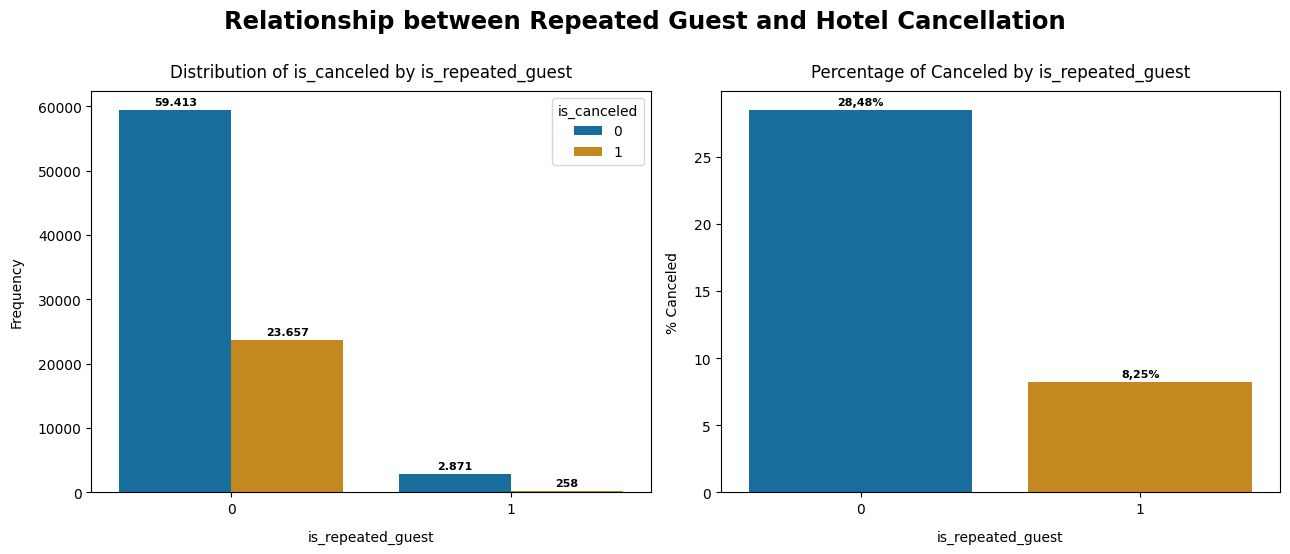

In [105]:
# membuat plot distribusi is_canceled berdasarkan kolom is_repeated_guest beserta persentase canceled-nya
plt.figure(figsize = (13, 5.5))
plt.suptitle("Relationship between Repeated Guest and Hotel Cancellation", fontsize = 17.5, y = 1, fontweight = "bold")

plt.subplot(1, 2, 1)
ax = sns.countplot(data = df_analysis, x = "is_repeated_guest", hue = "is_canceled")
ax.set_title("Distribution of is_canceled by is_repeated_guest", pad = 10)
ax.set_xlabel("is_repeated_guest", labelpad = 10)
ax.set_ylabel("Frequency", labelpad = 10)
for container in ax.containers:
    ax.bar_label(
        container,
        labels = [f"{x:,.0f}".replace(",", ".") for x in container.datavalues],
        label_type = "edge",
        padding = 2,
        color = "black",
        fontweight = "bold",
        fontsize = 8
    )

plt.subplot(1, 2, 2)
ax = sns.barplot(data = df_repeated_guest, x = "is_repeated_guest", y = "% Canceled")
ax.set_title("Percentage of Canceled by is_repeated_guest", pad = 10)
ax.set_xlabel("is_repeated_guest", labelpad = 10)
ax.set_ylabel("% Canceled", labelpad = 10)
for container in ax.containers:
    ax.bar_label(
        container,
        labels = [f"{float(x)}%".replace(".", ",") for x in container.datavalues],
        label_type = "edge",
        padding = 2,
        color = "black",
        fontweight = "bold",
        fontsize = 8
    )

plt.tight_layout()
plt.show()

Dapat dilihat dari grafik di atas bahwa persentase pelanggan yang belum pernah melakukan pemesanan ulang lebih besar daripada pelanggan yang telah melakukan pemesanan ulang. Kemungkinan ini terjadi karena pelanggan yang pernah memesan di hotel tersebut telah memiliki pemahaman tentang fasilitas dan layanan yang disediakan oleh pihak hotel, sehingga berbeda dengan pelanggan yang belum pernah melakukan pemesanan ulang. Selain itu, perbedaan ini juga disebabkan oleh jumlah pelanggan baru yang lebih tinggi. Oleh karena itu, rekomendasi kami kepada pihak hotel adalah memberikan *voucher* diskon untuk setiap pelanggan baru sebagai insentif dalam mendorong mereka melakukan transaksi kembali, selagi membentuk pendekatan untuk memahami alasan di balik keputusan *cancel*.

#### **Bagaimana pengaruh tipe deposit yang dipilih oleh pelanggan terhadap pembatalan pemesanan hotel?**

In [134]:
# membuat table distribusi is_canceled berdasarkan kolom deposit_type beserta persentase canceled-nya
df_deposit_type = df_analysis.groupby(["deposit_type", "is_canceled"]).size().unstack().reset_index()
df_deposit_type.columns.name = None
df_deposit_type["Total"] = df_deposit_type[0] + df_deposit_type[1]
df_deposit_type["% Canceled"] = (df_deposit_type[1] / df_deposit_type["Total"] * 100).round(2)
df_deposit_type

deposit_type      0      1  Total  % Canceled
0  No Deposit   62148  22906  85054  26.93     
1  Non Refund   55     983    1038   94.70     
2  Refundable   81     26     107    24.30

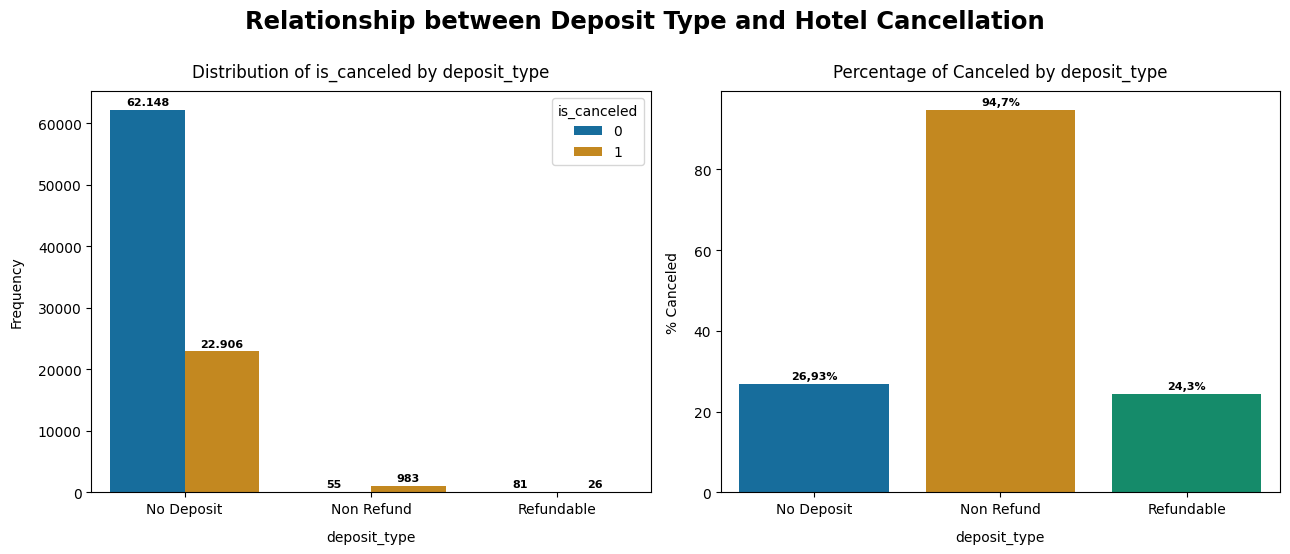

In [135]:
# membuat plot distribusi is_canceled berdasarkan kolom deposit_type beserta persentase canceled-nya
plt.figure(figsize = (13, 5.5))
plt.suptitle("Relationship between Deposit Type and Hotel Cancellation", fontsize = 17.5, y = 1, fontweight = "bold")

plt.subplot(1, 2, 1)
ax = sns.countplot(data = df_analysis, x = "deposit_type", hue = "is_canceled", order = df_deposit_type.sort_values("Total", ascending = False)["deposit_type"].unique())
ax.set_title("Distribution of is_canceled by deposit_type", pad = 10)
ax.set_xlabel("deposit_type", labelpad = 10)
ax.set_ylabel("Frequency", labelpad = 10)
for container in ax.containers:
    ax.bar_label(
        container,
        labels = [f"{x:,.0f}".replace(",", ".") for x in container.datavalues],
        label_type = "edge",
        padding = 2,
        color = "black",
        fontweight = "bold",
        fontsize = 8
    )

plt.subplot(1, 2, 2)
ax = sns.barplot(data = df_deposit_type, x = "deposit_type", y = "% Canceled", order = df_deposit_type.sort_values("Total", ascending = False)["deposit_type"].unique())
ax.set_title("Percentage of Canceled by deposit_type", pad = 10)
ax.set_xlabel("deposit_type", labelpad = 10)
ax.set_ylabel("% Canceled", labelpad = 10)
for container in ax.containers:
    ax.bar_label(
        container,
        labels = [f"{float(x)}%".replace(".", ",") for x in container.datavalues],
        label_type = "edge",
        padding = 2,
        color = "black",
        fontweight = "bold",
        fontsize = 8
    )

plt.tight_layout()
plt.show()

Apabila kita lihat jenis deposit yang dipilih oleh pelanggan, dapat diamati bahwa jumlah pembatalan sering dilakukan oleh pelanggan yang tidak melakukan deposit. Hal tersebut menunjukkan bahwa pelanggan cenderung memilih pembatalan daripada kehilangan uang deposit atau biaya hotel yang tidak dapat dikembalikan. Di sisi lain, persentase tertinggi yang berpeluang melakukan *cancel* ada pada pelanggan yang memilih kategori *Non Refund*. Artinya, pihak hotel tidak mengalami kerugian ketika pelanggan membatalkan reservasi karena uang yang sudah dibayarkan tidak dapat dikembalikan.

Meski begitu, untuk meningkatkan revenue perusahaan, kami merekomendasikan pada pihak hotel untuk menerapkan kebijakan konfirmasi kedatangan kepada pelanggan satu hari sebelum tanggal *check-in*. Jika konfirmasi menunjukkan pembatalan, pihak hotel dapat menjual kembali kamar tersebut kepada pelanggan potensial lainnya, dan jika pembatalan terjadi pada hari kedatangan, hotel dapat melakukan *flash sale* seharga 50%-75% untuk kamar tersebut agar tetap memperoleh keuntungan yang lebih.

Kami pun merekomendasikan untuk membatasi opsi *No Deposit* dengan mengarahkan pelanggan pada pilihan deposit yang lebih fleksibel atau kebijakan *reschedule*, sehingga dapat meningkatkan retensi pelanggan dan mengurangi tingkat pembatalan yang tidak diinginkan.

#### **Bagaimana pengaruh asal negara pelanggan terhadap pembatalan pemesanan hotel?**

In [106]:
# membuat table distribusi is_canceled berdasarkan kolom country beserta persentase canceled-nya
df_country = df_analysis.groupby(["country", "is_canceled"]).size().unstack().reset_index()
df_country.columns.name = None
df_country = df_country.fillna(0)
df_country["Total"] = df_country[0] + df_country[1]
df_country["% Canceled"] = (df_country[1] / df_country["Total"] * 100).round(2)
df_country = df_country.sort_values(1, ascending = False).head(10)
display(df_country, df_country.head(1))

country        0       1    Total  % Canceled
135  PRT     16887.0  9701.0  26588.0  36.49     
59   GBR     8392.0   1983.0  10375.0  19.11     
51   ESP     5330.0   1861.0  7191.0   25.88     
56   FRA     7056.0   1731.0  8787.0   19.70     
81   ITA     1975.0   1074.0  3049.0   35.22     
43   DEU     4316.0   1053.0  5369.0   19.61     
25   BRA     1260.0   726.0   1986.0   36.56     
76   IRL     2343.0   668.0   3011.0   22.19     
170  USA     1405.0   458.0   1863.0   24.58     
15   BEL     1665.0   409.0   2074.0   19.72

country        0       1    Total  % Canceled
135  PRT     16887.0  9701.0  26588.0  36.49

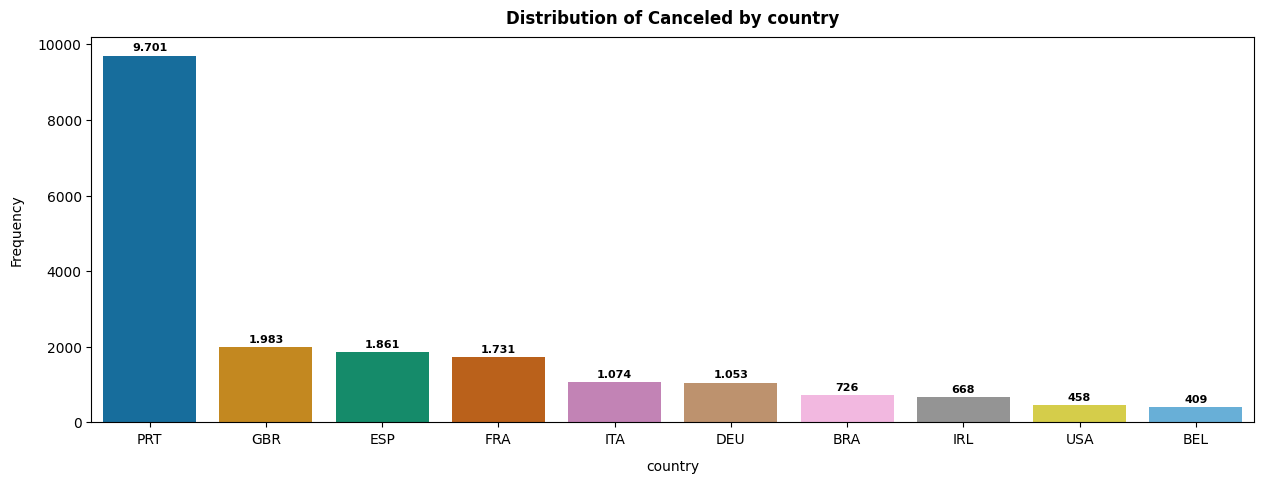

In [107]:
# menampilkan distribusi canceled berdasarkan country
plt.figure(figsize = (15, 5))
ax = sns.countplot(data = df_analysis[df_analysis["is_canceled"] == 1], x = "country", order = df_analysis[df_analysis["is_canceled"] == 1]["country"].value_counts().head(10).index)
ax.set_title("Distribution of Canceled by country", pad = 10, fontweight = "bold")
ax.set_xlabel("country", labelpad = 10)
ax.set_ylabel("Frequency", labelpad = 10)
for container in ax.containers:
    ax.bar_label(
        container,
        labels = [f"{x:,.0f}".replace(",", ".") for x in container.datavalues],
        label_type = "edge",
        padding = 2,
        color = "black",
        fontweight = "bold",
        fontsize = 8
    )
plt.show()

Berdasarkan grafik di atas, terlihat bahwa negara dengan pembatalan terbanyak adalah Portugal. Fenomena ini dapat dijelaskan karena data ini berasal dari hotel yang terletak di negara tersebut, sehingga mayoritas pembatalan (termasuk keseluruhan transaksi) berasal dari pelanggan dalam negeri. Persentase pembatalan oleh pelanggan lokal mencapai 36,49% dari 26.588 transaksi yang berasal dari negara tersebut.

In [108]:
# membuat table distribusi is_canceled berdasarkan kolom deposit_type dan customer_type untuk transaksi di Portugal beserta persentase canceled-nya
df_prt = df_analysis[df_analysis["country"] == "PRT"]

df_prt_deposit_type = df_prt.groupby(["deposit_type", "is_canceled"]).size().unstack().reset_index()
df_prt_deposit_type.columns.name = None
df_prt_deposit_type["Total"] = df_prt_deposit_type[0] + df_prt_deposit_type[1]
df_prt_deposit_type["% Canceled"] = (df_prt_deposit_type[1] / df_prt_deposit_type["Total"] * 100).round(2)

df_prt_customer_type = df_prt.groupby(["customer_type", "is_canceled"]).size().unstack().reset_index()
df_prt_customer_type.columns.name = None
df_prt_customer_type["Total"] = df_prt_customer_type[0] + df_prt_customer_type[1]
df_prt_customer_type["% Canceled"] = (df_prt_customer_type[1] / df_prt_customer_type["Total"] * 100).round(2)

display(df_prt_deposit_type, df_prt_customer_type)

deposit_type      0     1  Total  % Canceled
0  No Deposit   16842  8731  25573  34.14     
1  Non Refund   29     954   983    97.05     
2  Refundable   16     16    32     50.00

customer_type      0     1  Total  % Canceled
0  Contract         356    510   866    58.89     
1  Group            182    36    218    16.51     
2  Transient        13573  7700  21273  36.20     
3  Transient-Party  2776   1455  4231   34.39

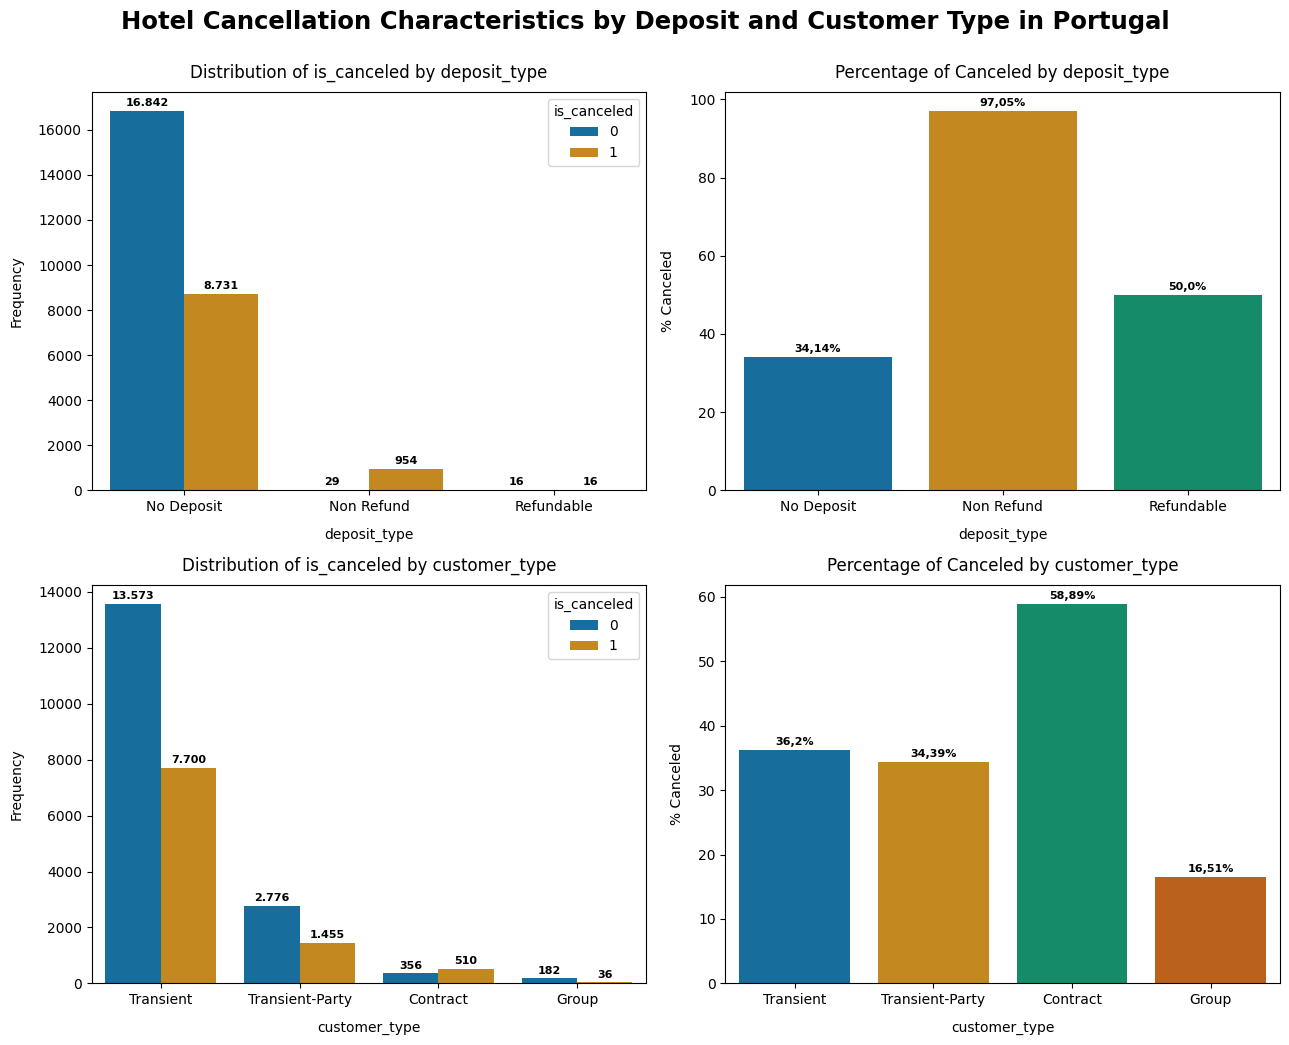

In [124]:
# membuat plot distribusi is_canceled berdasarkan kolom deposit_type dan customer_type untuk transaksi di Portugal beserta persentase canceled-nya
plt.figure(figsize = (13, 10.4))
plt.suptitle("Hotel Cancellation Characteristics by Deposit and Customer Type in Portugal", fontsize = 17.5, y = 1, fontweight = "bold")

plt.subplot(2, 2, 1)
ax = sns.countplot(data = df_prt, x = "deposit_type", hue = "is_canceled", order = df_prt_deposit_type.sort_values("Total", ascending = False)["deposit_type"].unique())
ax.set_title("Distribution of is_canceled by deposit_type", pad = 10)
ax.set_xlabel("deposit_type", labelpad = 10)
ax.set_ylabel("Frequency", labelpad = 10)
for container in ax.containers:
    ax.bar_label(
        container,
        labels = [f"{x:,.0f}".replace(",", ".") for x in container.datavalues],
        label_type = "edge",
        padding = 2,
        color = "black",
        fontweight = "bold",
        fontsize = 8
    )

plt.subplot(2, 2, 2)
ax = sns.barplot(data = df_prt_deposit_type, x = "deposit_type", y = "% Canceled", order = df_prt_deposit_type.sort_values("Total", ascending = False)["deposit_type"].unique())
ax.set_title("Percentage of Canceled by deposit_type", pad = 10)
ax.set_xlabel("deposit_type", labelpad = 10)
ax.set_ylabel("% Canceled", labelpad = 10)
for container in ax.containers:
    ax.bar_label(
        container,
        labels = [f"{float(x)}%".replace(".", ",") for x in container.datavalues],
        label_type = "edge",
        padding = 2,
        color = "black",
        fontweight = "bold",
        fontsize = 8
    )

plt.subplot(2, 2, 3)
ax = sns.countplot(data = df_prt, x = "customer_type", hue = "is_canceled", order = df_prt_customer_type.sort_values("Total", ascending = False)["customer_type"].unique())
ax.set_title("Distribution of is_canceled by customer_type", pad = 10)
ax.set_xlabel("customer_type", labelpad = 10)
ax.set_ylabel("Frequency", labelpad = 10)
for container in ax.containers:
    ax.bar_label(
        container,
        labels = [f"{x:,.0f}".replace(",", ".") for x in container.datavalues],
        label_type = "edge",
        padding = 2,
        color = "black",
        fontweight = "bold",
        fontsize = 8
    )

plt.subplot(2, 2, 4)
ax = sns.barplot(data = df_prt_customer_type, x = "customer_type", y = "% Canceled", order = df_prt_customer_type.sort_values("Total", ascending = False)["customer_type"].unique())
ax.set_title("Percentage of Canceled by customer_type", pad = 10)
ax.set_xlabel("customer_type", labelpad = 10)
ax.set_ylabel("% Canceled", labelpad = 10)
for container in ax.containers:
    ax.bar_label(
        container,
        labels = [f"{float(x)}%".replace(".", ",") for x in container.datavalues],
        label_type = "edge",
        padding = 2,
        color = "black",
        fontweight = "bold",
        fontsize = 8
    )

plt.tight_layout()
plt.show()

Berdasarkan analisis pemesanan hotel yang ada di Portugal, meskipun persentase pembatalan lebih tinggi pada kategori *Non Refund*, pelanggan yang lebih cenderung memilih untuk membatalkan pemesanan adalah mereka yang memilih kategori *No Deposit*. Di sisi lain, meskipun kelompok pelanggan *Contract* memiliki persentase pembatalan yang lebih tinggi, jumlah pembatalan transaksi lebih banyak dilakukan oleh pelanggan dari kelompok *Transient*. Temuan ini cukup memberikan gambaran terkait karakteristik pelanggan lokal yang melakukan *cancel*, sehingga pihak hotel dapat mengambil langkah-langkah strategis yang lebih terarah untuk meminimalkan tingkat pembatalan (rekomendasinya dapat disesuaikan dengan pertanyaan terkait `deposit_type` dan `customer_type` di atas).

## **`MODELING`**

### `Define Algorithm`

In [113]:
# menentukan algoritma yang akan digunakan pada pemodelan
logreg = LogisticRegression(random_state = 130224, max_iter = 1000)
knn = KNeighborsClassifier(n_neighbors = 5)
tree = DecisionTreeClassifier(max_depth = 5, random_state = 130224)
rf = RandomForestClassifier(random_state = 130224)
gradboost = GradientBoostingClassifier(random_state = 130224)
adaboost = AdaBoostClassifier(random_state = 130224)
xgboost = XGBClassifier(random_state = 130224)
lgboost = lgb.LGBMClassifier(random_state = 130224, verbose = -1)

model = [
    ("Logistic Regression", logreg),
    ("K-Nearest Neighbors", knn),
    ("Decision Tree", tree),
    ("Random Forest", rf),
    ("Gradient Boosting", gradboost),
    ("AdaBoost", adaboost),
    ("XGBoost", xgboost),
    ("LightGBM", lgboost)
]

Terdapat 8 jenis algoritma yang akan diterapkan pada pemodelan kali ini, yaitu **Logistic Regression**, **K-Nearest Neighbors**, **Decision Tree**, **Random Forest**, **Gradient Boosting**, **AdaBoost**, **XGBoost**, dan **LightGBM** yang akan diuji untuk menemukan model terbaik dalam memprediksi *target*. Metode *model benchmarking* akan kita lakukan untuk menemukan algoritma terbaik, di mana metode tersebut berfungsi untuk mengevaluasi serta membandingkan kinerja algoritma *machine learning* dalam mempelajari data. *Metrics* yang akan digunakan untuk mengukur kinerja algoritma melibatkan *Recall*, *Precision*, dan *F1 Score*, di mana penentuan algoritma terbaik akan bergantung pada nilai optimal dari ketiga *metrics* tersebut.

*Model benchmarking* akan dilakukan dengan membandingkan dua kondisi, pertama yaitu tanpa metode *oversampling*, kedua yaitu dengan metode *oversampling*. Untuk kondisi pengujian dengan menggunakan *oversampling*, prosedur akan dilakukan dengan membandingkan kelima *resampler* yang telah ditentukan di atas, yaitu **SMOTENC**, **SMOTE**, ***RandomUnderSampler***, ***RandomOverSampler***, dan ***NearMiss*** untuk dicari *resampler* mana yang dapat menangani dengan baik kondisi *imbalanced data*.

### `Benchmark Model & Predict to Test Set (without Oversampling)`

In [114]:
# benchmark model tanpa menggunakan oversampling
def cross_validate_without_sampling(X_train, y_train, model, scoring):
    list_name = []
    list_recall = []
    list_precision = []
    list_f1 = []

    for name, algorithm in model:
        if algorithm in [logreg, knn]:
            pipe_model = Pipeline([
                ("preprocessing", transformer),
                ("scaler", scaler),
                ("algorithm", algorithm)
            ])
        else:
            pipe_model = Pipeline([
                ("preprocessing", transformer),
                ("algorithm", algorithm)
            ])
            
        skfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 130224)

        model_cv = cross_validate(
            estimator = pipe_model,
            X = X_train,
            y = y_train,
            cv = skfold,
            scoring = scoring,
            error_score = "raise",
            n_jobs = -1
        )

        list_name.append(name)
        list_recall.append(round(model_cv["test_recall"].mean(), 3))
        list_precision.append(round(model_cv["test_precision"].mean(), 3))
        list_f1.append(round(model_cv["test_f1"].mean(), 3))

    result = pd.DataFrame({
        "Model" : list_name,
        "Mean Recall" : list_recall,
        "Mean Precision" : list_precision,
        "Mean F1" : list_f1
    })    

    return result.sort_values("Mean Recall", ascending = False)

In [115]:
# predict to test set tanpa menggunakan oversampling
def predict_without_sampling(model):
    list_name = []
    list_recall_score = []
    list_precision_score = []
    list_f1_score = []

    for name, algorithm in model:
        if algorithm in [logreg, knn]:
            pipe_model = Pipeline([
                ("preprocessing", transformer),
                ("scaler", scaler),
                ("algorithm", algorithm)
            ])
        else:
            pipe_model = Pipeline([
                ("preprocessing", transformer),
                ("algorithm", algorithm)
            ])

        pipe_model.fit(X_train, y_train)
        y_pred = pipe_model.predict(X_test)
        recall_scoring = recall_score(y_test, y_pred)
        precision_scoring = precision_score(y_test, y_pred)
        f1_scoring = f1_score(y_test, y_pred)

        list_name.append(name)
        list_recall_score.append(round(recall_scoring, 3))
        list_precision_score.append(round(precision_scoring, 3))
        list_f1_score.append(round(f1_scoring, 3))
    
    result = pd.DataFrame({
        "Model" : list_name,
        "Recall Score" : list_recall_score,
        "Precision Score" : list_precision_score,
        "F1 Score" : list_f1_score
    })    

    return result.sort_values("Recall Score", ascending = False)

In [116]:
# menampilkan hasil benchmark model tanpa menggunakan oversampling
cross_validate_without_sampling(X_train, y_train, model, ["recall", "precision", "f1"])

Model  Mean Recall  Mean Precision  Mean F1
3  Random Forest        0.541        0.708           0.614  
6  XGBoost              0.536        0.729           0.618  
1  K-Nearest Neighbors  0.515        0.603           0.555  
7  LightGBM             0.510        0.732           0.601  
5  AdaBoost             0.468        0.704           0.562  
4  Gradient Boosting    0.463        0.725           0.565  
2  Decision Tree        0.436        0.701           0.538  
0  Logistic Regression  0.421        0.699           0.526

In [117]:
# menampilkan hasil predict to test set tanpa menggunakan oversampling
predict_without_sampling(model)

Model  Recall Score  Precision Score  F1 Score
3  Random Forest        0.545         0.706            0.616   
6  XGBoost              0.539         0.730            0.620   
1  K-Nearest Neighbors  0.521         0.603            0.559   
7  LightGBM             0.512         0.743            0.606   
5  AdaBoost             0.478         0.712            0.572   
4  Gradient Boosting    0.461         0.732            0.566   
2  Decision Tree        0.441         0.701            0.541   
0  Logistic Regression  0.416         0.712            0.525

Dari hasil evaluasi tanpa menggunakan *resampler*, terlihat bahwa rata-rata nilai *Recall* yang diperoleh masih jauh di bawah standar jika dibandingkan dengan rata-rata nilai *Precision* dan *F1 Score* yang membuat hasilnya tidak seimbang, sehingga tidak memungkinkan bagi kita untuk menetapkan algoritma yang paling sesuai berdasarkan nilai-nilai di atas. Fenomena tersebut disebabkan oleh ketidakseimbangan kelas *target* yang mengakibatkan model kurang mampu mempelajari pola yang ada dengan baik, serta mayoritas data cenderung mengarah ke *Precision* (bukan karena nilai *Precision*-nya yang bagus). Dengan demikian, kami akan mencoba menerapkan *resampler* untuk melihat apakah proses tersebut dapat memperlihatkan performa sejati dari setiap algoritma. Setelah proses tersebut, barulah kami dapat menentukan algoritma terbaik yang sesuai dengan kebutuhan bisnis *project* ini.

### `Benchmark Model & Predict to Test Set (with Oversampling)`

In [118]:
# benchmark model menggunakan oversampling
def cross_validate_with_sampling(X_train, y_train, model, scoring, resampler):
    list_name = []
    list_recall = []
    list_precision = []
    list_f1 = []

    for name, algorithm in model:
        if algorithm in [logreg, knn]:
            pipe_model = Pipeline([
                ("preprocessing", transformer),
                ("scaler", scaler),
                ("resampler", resampler),
                ("algorithm", algorithm)
            ])
        else:
            pipe_model = Pipeline([
                ("preprocessing", transformer),
                ("resampler", resampler),
                ("algorithm", algorithm)
            ])
            
        skfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 130224)

        model_cv = cross_validate(
            estimator = pipe_model,
            X = X_train,
            y = y_train,
            cv = skfold,
            scoring = scoring,
            error_score = "raise",
            n_jobs = -1
        )

        list_name.append(name)
        list_recall.append(round(model_cv["test_recall"].mean(), 3))
        list_precision.append(round(model_cv["test_precision"].mean(), 3))
        list_f1.append(round(model_cv["test_f1"].mean(), 3))

    if resampler == smotenc:
        sampling = "SMOTENC"
    elif resampler == smote:
        sampling = "SMOTE"
    elif resampler == rus:
        sampling = "RandomUnderSampler"
    elif resampler == ros:
        sampling = "RandomOverSampler"
    elif resampler == nearmiss:
        sampling = "NearMiss"

    result = pd.DataFrame({
        f"Model - {sampling}" : list_name,
        "Mean Recall" : list_recall,
        "Mean Precision" : list_precision,
        "Mean F1" : list_f1
    })    

    return result.sort_values("Mean Recall", ascending = False)

In [119]:
# predict to test set menggunakan oversampling
def predict_with_sampling(model, resampler):
    list_name = []
    list_recall_score = []
    list_precision_score = []
    list_f1_score = []

    for name, algorithm in model:
        if algorithm in [logreg, knn]:
            pipe_model = Pipeline([
                ("preprocessing", transformer),
                ("scaler", scaler),
                ("resampler", resampler),
                ("algorithm", algorithm)
            ])
        else:
            pipe_model = Pipeline([
                ("preprocessing", transformer),
                ("resampler", resampler),
                ("algorithm", algorithm)
            ])

        pipe_model.fit(X_train, y_train)
        y_pred = pipe_model.predict(X_test)
        recall_scoring = recall_score(y_test, y_pred)
        precision_scoring = precision_score(y_test, y_pred)
        f1_scoring = f1_score(y_test, y_pred)

        list_name.append(name)
        list_recall_score.append(round(recall_scoring, 3))
        list_precision_score.append(round(precision_scoring, 3))
        list_f1_score.append(round(f1_scoring, 3))
    
    if resampler == smotenc:
        sampling = "SMOTENC"
    elif resampler == smote:
        sampling = "SMOTE"
    elif resampler == rus:
        sampling = "RandomUnderSampler"
    elif resampler == ros:
        sampling = "RandomOverSampler"
    elif resampler == nearmiss:
        sampling = "NearMiss"
    
    result = pd.DataFrame({
        f"Model - {sampling}" : list_name,
        "Recall Score" : list_recall_score,
        "Precision Score" : list_precision_score,
        "F1 Score" : list_f1_score
    })    

    return result.sort_values("Recall Score", ascending = False)

**Oversampling with SMOTENC**

In [120]:
# menampilkan hasil benchmark model menggunakan SMOTENC
cross_validate_with_sampling(X_train, y_train, model, ["recall", "precision", "f1"], smotenc)

Model - SMOTENC  Mean Recall  Mean Precision  Mean F1
0  Logistic Regression  0.736        0.487           0.586  
1  K-Nearest Neighbors  0.690        0.483           0.568  
2  Decision Tree        0.625        0.540           0.579  
5  AdaBoost             0.567        0.592           0.578  
3  Random Forest        0.548        0.697           0.614  
6  XGBoost              0.543        0.720           0.619  
7  LightGBM             0.519        0.723           0.604  
4  Gradient Boosting    0.507        0.681           0.581

In [121]:
# menampilkan hasil predict to test set menggunakan SMOTENC
predict_with_sampling(model, smotenc)

Model - SMOTENC  Recall Score  Precision Score  F1 Score
0  Logistic Regression  0.733         0.490            0.587   
1  K-Nearest Neighbors  0.690         0.487            0.571   
2  Decision Tree        0.624         0.543            0.581   
3  Random Forest        0.551         0.698            0.616   
5  AdaBoost             0.549         0.607            0.577   
6  XGBoost              0.544         0.725            0.622   
7  LightGBM             0.524         0.732            0.611   
4  Gradient Boosting    0.506         0.688            0.583

**Oversampling with SMOTE**

In [126]:
# menampilkan hasil benchmark model menggunakan SMOTE
cross_validate_with_sampling(X_train, y_train, model, ["recall", "precision", "f1"], smote)

Model - SMOTE  Mean Recall  Mean Precision  Mean F1
0  Logistic Regression  0.764        0.482           0.591  
1  K-Nearest Neighbors  0.721        0.472           0.571  
5  AdaBoost             0.553        0.596           0.573  
3  Random Forest        0.545        0.698           0.612  
6  XGBoost              0.545        0.723           0.622  
7  LightGBM             0.523        0.723           0.607  
4  Gradient Boosting    0.506        0.685           0.582  
2  Decision Tree        0.456        0.653           0.537

In [127]:
# menampilkan hasil predict to test set menggunakan SMOTE
predict_with_sampling(model, smote)

Model - SMOTE  Recall Score  Precision Score  F1 Score
0  Logistic Regression  0.761         0.487            0.594   
1  K-Nearest Neighbors  0.718         0.474            0.571   
5  AdaBoost             0.554         0.603            0.577   
3  Random Forest        0.552         0.694            0.615   
6  XGBoost              0.551         0.727            0.627   
7  LightGBM             0.520         0.727            0.607   
4  Gradient Boosting    0.499         0.690            0.579   
2  Decision Tree        0.453         0.655            0.536

**Oversampling with *RandomUnderSampler***

In [128]:
# menampilkan hasil benchmark model menggunakan RandomUnderSampler
cross_validate_with_sampling(X_train, y_train, model, ["recall", "precision", "f1"], rus)

Model - RandomUnderSampler  Mean Recall  Mean Precision  Mean F1
6  XGBoost                    0.782        0.557           0.651  
5  AdaBoost                   0.778        0.489           0.601  
7  LightGBM                   0.775        0.554           0.646  
2  Decision Tree              0.770        0.464           0.579  
0  Logistic Regression        0.765        0.480           0.590  
3  Random Forest              0.761        0.558           0.644  
4  Gradient Boosting          0.756        0.523           0.619  
1  K-Nearest Neighbors        0.738        0.460           0.567

In [129]:
# menampilkan hasil predict to test set menggunakan RandomUnderSampler
predict_with_sampling(model, rus)

Model - RandomUnderSampler  Recall Score  Precision Score  F1 Score
6  XGBoost                    0.783         0.564            0.656   
5  AdaBoost                   0.777         0.493            0.603   
2  Decision Tree              0.772         0.474            0.587   
7  LightGBM                   0.770         0.563            0.650   
0  Logistic Regression        0.766         0.485            0.594   
3  Random Forest              0.758         0.565            0.647   
4  Gradient Boosting          0.753         0.536            0.627   
1  K-Nearest Neighbors        0.748         0.468            0.576

**Oversampling with *RandomOverSampler***

In [130]:
# menampilkan hasil benchmark model menggunakan RandomOverSampler
cross_validate_with_sampling(X_train, y_train, model, ["recall", "precision", "f1"], ros)

Model - RandomOverSampler  Mean Recall  Mean Precision  Mean F1
5  AdaBoost                  0.779        0.490           0.602  
0  Logistic Regression       0.768        0.480           0.590  
7  LightGBM                  0.767        0.561           0.648  
2  Decision Tree             0.766        0.465           0.578  
6  XGBoost                   0.765        0.572           0.655  
4  Gradient Boosting         0.756        0.523           0.618  
1  K-Nearest Neighbors       0.711        0.463           0.561  
3  Random Forest             0.611        0.659           0.634

In [131]:
# menampilkan hasil predict to test set menggunakan RandomOverSampler
predict_with_sampling(model, ros)

Model - RandomOverSampler  Recall Score  Precision Score  F1 Score
5  AdaBoost                  0.783         0.494            0.606   
2  Decision Tree             0.776         0.471            0.587   
6  XGBoost                   0.773         0.577            0.661   
7  LightGBM                  0.773         0.565            0.653   
0  Logistic Regression       0.769         0.487            0.596   
4  Gradient Boosting         0.766         0.527            0.624   
1  K-Nearest Neighbors       0.715         0.465            0.563   
3  Random Forest             0.618         0.660            0.639

**Oversampling with *NearMiss***

In [132]:
# menampilkan hasil benchmark model menggunakan NearMiss
cross_validate_with_sampling(X_train, y_train, model, ["recall", "precision", "f1"], nearmiss)

Model - NearMiss  Mean Recall  Mean Precision  Mean F1
3  Random Forest        0.784        0.425           0.551  
6  XGBoost              0.784        0.436           0.560  
7  LightGBM             0.776        0.432           0.555  
4  Gradient Boosting    0.754        0.425           0.544  
2  Decision Tree        0.753        0.383           0.508  
5  AdaBoost             0.742        0.417           0.534  
1  K-Nearest Neighbors  0.643        0.390           0.486  
0  Logistic Regression  0.631        0.384           0.477

In [133]:
# menampilkan hasil predict to test set menggunakan NearMiss
predict_with_sampling(model, nearmiss)

Model - NearMiss  Recall Score  Precision Score  F1 Score
3  Random Forest        0.784         0.424            0.550   
6  XGBoost              0.783         0.435            0.559   
7  LightGBM             0.781         0.436            0.559   
5  AdaBoost             0.752         0.418            0.537   
4  Gradient Boosting    0.751         0.427            0.545   
2  Decision Tree        0.697         0.411            0.517   
1  K-Nearest Neighbors  0.645         0.387            0.483   
0  Logistic Regression  0.629         0.386            0.478

Setelah menggunakan *resampler*, terlihat adanya peningkatan pada nilai *Recall* setiap algoritma yang diuji jika dibandingkan dengan tanpa menggunakan *resampler*. Dari perbandingan nilai *Recall* yang muncul, dapat disimpulkan bahwa ketika melakukan *cross-validation*, metode *oversampling* dengan menggunakan *NearMiss* mencatatkan hasil yang lebih baik daripada *resampler* lainnya. Meskipun jika dilihat lebih teliti, terdapat perbedaan yang tidak terlalu jauh antara menggunakan *NearMiss* dan *RandomUnderSampler*.

Untuk memutuskan *resampler* mana yang akan digunakan, kita perlu memilih terlebih dahulu algoritma yang nilai pada ketiga *metrics*-nya tidak terlalu berbeda atau cukup seimbang. Metode pemilihan yang kita lakukan yaitu dengan melihat rata-rata nilai *metrics* dari keenam percobaan *benchmark model* (baik itu yang menggunakan *resampler* ataupun yang tidak). Berikut adalah rata-rata nilai *Recall*, *Precision*, dan *F1 Score* yang dibuat dalam bentuk tabel.

| <center>Algorithm</center> | <center>Avg. Recall</center> | <center>Avg. Precision</center> | <center>Avg. F1</center> |
| --- | --- | --- | --- |
| Logistic Regression | <center>`0.6808`</center> | <center>0.502</center> | <center>0.56</center> |
| K-Nearest Neighbors | <center>`0.6697`</center> | <center>0.4785</center> | <center>0.5513</center> |
| Decision Tree | <center>0.6343</center> | <center>0.5343</center> | <center>0.5532</center> |
| Random Forest | <center>0.6317</center> | <center>`0.6242`</center> | <center>`0.6115`</center> |
| Gradient Boosting | <center>0.6237</center> | <center>0.5937</center> | <center>0.5848</center> |
| AdaBoost | <center>0.6478</center> | <center>0.548</center> | <center>0.575</center> |
| XGBoost | <center>`0.6592`</center> | <center>`0.6228`</center> | <center>`0.6208`</center> |
| LightGBM | <center>0.645</center> | <center>`0.6208`</center> | <center>`0.6102`</center> |

Berdasarkan tabel di atas, rata-rata nilai pada setiap *metrics* sangatlah variatif. Namun untuk mempermudah keputusan dalam menentukan algoritma yang akan digunakan, kita menandai tiga nilai tertinggi pada setiap *metrics*-nya, di mana **Logistic Regression** mencatatkan nilai rata-rata tertinggi untuk *Recall*, **Random Forest** mencatatkan nilai rata-rata tertinggi untuk *Precision*, sedangkan **XGBoost** mencatatkan nilai rata-rata tertinggi untuk *F1 Score*. Dari ketiga algoritma tersebut, **XGBoost** adalah salah satu algoritma yang termasuk ke dalam irisan tiga nilai tertinggi di setiap *metrics*-nya. Di samping itu, ketiga nilainya pun tidak terlalu berbeda signifikan, sehingga kita memutuskan untuk menggunakan algoritma tersebut untuk proses *modeling* di tahap-tahap selanjutnya. Kita pun memutuskan untuk menggunakan *NearMiss* sebagai metode *oversampling* yang akan digunakan pada proses *hyperparameter tuning* di karenakan performa terhadap algoritma **XGBoost** yang cukup stabil ketika dilakukan *predict* terhadap *test_set*.

### `Hyperparameter Tuning - XGBoost`

Menurut [*official documentation*](https://xgboost.readthedocs.io/en/stable/tutorials/param_tuning.html) XGBoost, terdapat dua cara untuk mengatasi *overfitting*:
1. Mengontrol kompleksitas model secara langsung dengan mengatur parameter *max_depth*, *min_child_weight*, dan *gamma*.
2. Menambahkan *randomness* untuk membuat proses *testing* menjadi kebal terhadap *noise* dengan mengatur parameter *subsample* dan *colsample_bytree*. Kemudian bisa juga untuk menurunkan nilai *eta* atau *learning rate*, serta menaikkan nilai *num_round*.

Selain itu, terdapat cara untuk mengatasi *imbalanced data* dengan menggunakan parameter *scale_pos_weight*, yang berarti kita tidak perlu melakukan *resampler* lagi pada algoritma XGBoost. Berikut adalah *hyperparameter* yang akan kita gunakan untuk proses *tuning* pada algoritma XGBoost:
- ***eta:*** *learning rate* yang mengontrol kontribusi setiap pohon keputusan dalam model. Nilai yang lebih rendah memerlukan lebih banyak pohon untuk model yang kuat.
- ***n_estimators:*** Jumlah iterasi atau pohon keputusan yang akan dibangun.
- ***max_depth:*** Kedalaman maksimum dari setiap pohon keputusan dalam *ensemble*.
- ***min_child_weight:*** Minimum jumlah sampel yang diperlukan untuk membagi *node*.
- ***gamma:*** Minimum penurunan kerugian yang diperlukan untuk membuat *split* tambahan dalam *node*.
- ***subsample:*** Ukuran *sample* yang akan digunakan pada setiap iterasi. Mengatur nilai kurang dari 1 menghasilkan stokastisitas, yang membantu menghindari overfitting.
- ***colsample_bytree:*** Jumlah *feature* yang akan digunakan dalam setiap iterasi. Ini mengontrol variabilitas *feature* antar pohon.
- ***max_delta_step:*** Mengontrol seberapa cepat kita mengizinkan model untuk bergerak.
- ***scale_pos_weight:*** Menyeimbangkan kelas positif dan negatif dalam kasus *imbalanced data*.
- ***max_bin:*** Mengontrol jumlah *bin* yang digunakan untuk menerapkan algoritma *histogram-based split*.

In [138]:
# mendefinisikan hyperparameter untuk tuning algoritma XGBoost
hyperparam_space = {
    "algorithm__eta" : [0.1, 0.2, 0.05],
    "algorithm__n_estimators" : range(300, 1001),
    "algorithm__max_depth" : range(5, 11),
    "algorithm__min_child_weight" : [3, 5, 7],
    "algorithm__gamma" : [0, 0.1, 0.2],
    "algorithm__subsample" : [0.7, 0.8, 0.9],
    "algorithm__colsample_bytree" : [0.7, 0.8, 0.9],
    "algorithm__max_delta_step" : range(1, 11),
    "algorithm__scale_pos_weight" : [10, 20, 30],
    "algorithm__max_bin" : [255, 275, 300, 350]
}

pipe_model = Pipeline([
    ("preprocessing", transformer),
    ("algorithm", xgboost)
])

skfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 130224)

#### **XGBoost - Recall**

In [139]:
# mencari best hyperparameter untuk menghitung Recall
xgboost_tuning_recall = RandomizedSearchCV(
    estimator = pipe_model,
    param_distributions = hyperparam_space,
    cv = skfold,
    scoring = "recall",
    n_jobs = -1,
    n_iter = 300,
    random_state = 130224
)

xgboost_tuning_recall.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=130224, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One-Hot '
                                                                               'Encoding',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['hotel',
                                                                                'arrival_date_month',
                                                                                'meal',
                                                                                'market_segment',
                                                                                'distribution_channel',
                                                                                'reserved_room_type',
                                                                                'assigned_room_type',...
                                        'algorithm__eta': [0.1, 0.2, 0.05],
                                        'algorithm__gamma': [0, 0.1, 0.2],
                                        'algorithm__max_bin': [255, 275, 300,
                                                               350],
                                        'algorithm__max_delta_step': range(1, 11),
                                        'algorithm__max_depth': range(5, 11),
                                        'algorithm__min_child_weight': [3, 5,
                                                                        7],
                                        'algorithm__n_estimators': range(300, 1001),
                                        'algorithm__scale_pos_weight': [10, 20,
                                                                        30],
                                        'algorithm__subsample': [0.7, 0.8,
                                                                 0.9]},
                   random_state=130224, scoring='recall')

In [140]:
# best hyperparameter tuning untuk menghitung Recall
xgboost_tuning_recall.best_params_

{'algorithm__subsample': 0.9,
 'algorithm__scale_pos_weight': 30,
 'algorithm__n_estimators': 434,
 'algorithm__min_child_weight': 3,
 'algorithm__max_depth': 5,
 'algorithm__max_delta_step': 3,
 'algorithm__max_bin': 300,
 'algorithm__gamma': 0,
 'algorithm__eta': 0.05,
 'algorithm__colsample_bytree': 0.7}

In [141]:
# best Recall score
xgboost_tuning_recall.best_score_

0.9880828722542706

#### **XGBoost - Precision**

In [143]:
# mencari best hyperparameter untuk menghitung Precision
xgboost_tuning_precision = RandomizedSearchCV(
    estimator = pipe_model,
    param_distributions = hyperparam_space,
    cv = skfold,
    scoring = "precision",
    n_jobs = -1,
    n_iter = 300,
    random_state = 130224
)

xgboost_tuning_precision.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=130224, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One-Hot '
                                                                               'Encoding',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['hotel',
                                                                                'arrival_date_month',
                                                                                'meal',
                                                                                'market_segment',
                                                                                'distribution_channel',
                                                                                'reserved_room_type',
                                                                                'assigned_room_type',...
                                        'algorithm__eta': [0.1, 0.2, 0.05],
                                        'algorithm__gamma': [0, 0.1, 0.2],
                                        'algorithm__max_bin': [255, 275, 300,
                                                               350],
                                        'algorithm__max_delta_step': range(1, 11),
                                        'algorithm__max_depth': range(5, 11),
                                        'algorithm__min_child_weight': [3, 5,
                                                                        7],
                                        'algorithm__n_estimators': range(300, 1001),
                                        'algorithm__scale_pos_weight': [10, 20,
                                                                        30],
                                        'algorithm__subsample': [0.7, 0.8,
                                                                 0.9]},
                   random_state=130224, scoring='precision')

In [144]:
# best hyperparameter tuning untuk menghitung Precision
xgboost_tuning_precision.best_params_

{'algorithm__subsample': 0.7,
 'algorithm__scale_pos_weight': 10,
 'algorithm__n_estimators': 887,
 'algorithm__min_child_weight': 3,
 'algorithm__max_depth': 10,
 'algorithm__max_delta_step': 9,
 'algorithm__max_bin': 300,
 'algorithm__gamma': 0.1,
 'algorithm__eta': 0.2,
 'algorithm__colsample_bytree': 0.9}

In [145]:
# best Precision score
xgboost_tuning_precision.best_score_

0.5889987704115269

#### **XGBoost - F1 Score**

In [147]:
# mencari best hyperparameter untuk menghitung F1 Score
xgboost_tuning_f1 = RandomizedSearchCV(
    estimator = pipe_model,
    param_distributions = hyperparam_space,
    cv = skfold,
    scoring = "f1",
    n_jobs = -1,
    n_iter = 300,
    random_state = 130224
)

xgboost_tuning_f1.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=130224, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One-Hot '
                                                                               'Encoding',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['hotel',
                                                                                'arrival_date_month',
                                                                                'meal',
                                                                                'market_segment',
                                                                                'distribution_channel',
                                                                                'reserved_room_type',
                                                                                'assigned_room_type',...
                                        'algorithm__eta': [0.1, 0.2, 0.05],
                                        'algorithm__gamma': [0, 0.1, 0.2],
                                        'algorithm__max_bin': [255, 275, 300,
                                                               350],
                                        'algorithm__max_delta_step': range(1, 11),
                                        'algorithm__max_depth': range(5, 11),
                                        'algorithm__min_child_weight': [3, 5,
                                                                        7],
                                        'algorithm__n_estimators': range(300, 1001),
                                        'algorithm__scale_pos_weight': [10, 20,
                                                                        30],
                                        'algorithm__subsample': [0.7, 0.8,
                                                                 0.9]},
                   random_state=130224, scoring='f1')

In [148]:
# best hyperparameter tuning untuk menghitung F1 Score
xgboost_tuning_f1.best_params_

{'algorithm__subsample': 0.9,
 'algorithm__scale_pos_weight': 10,
 'algorithm__n_estimators': 934,
 'algorithm__min_child_weight': 7,
 'algorithm__max_depth': 10,
 'algorithm__max_delta_step': 8,
 'algorithm__max_bin': 275,
 'algorithm__gamma': 0.1,
 'algorithm__eta': 0.1,
 'algorithm__colsample_bytree': 0.8}

In [149]:
# best F1 Score
xgboost_tuning_f1.best_score_

0.6509453234405573

Hasil dari *hyperparameter tuning* terhadap *train_test* menggunakan *RandomizedSearchCV* dengan *n_iter* sebanyak 300 iterasi untuk model XGBoost menghasilkan nilai terbaik serta performa model yang meningkat untuk setiap *metrics* yang diuji. Rangkuman hasil *benchmark model* dan *hyperparameter tuning* dapat dilihat pada tabel di bawah ini.

| <center>Model</center> | <center>Mean Recall</center> | <center>Mean Precision</center> | <center>Mean F1</center> | <center>subsample</center> | <center>scale_pos_weight</center> | <center>n_estimators</center> | <center>min_child_weight</center> | <center>max_depth</center> | <center>max_delta_step</center> | <center>max_bin</center> | <center>gamma</center> | <center>eta</center> | <center>colsample_bytree</center> |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| XGBoost Benchmark (Recall) | <center>0.784</center> | <center>-</center> | <center>-</center> | <center>-</center> | <center>-</center> | <center>-</center> | <center>-</center> | <center>-</center> | <center>-</center> | <center>-</center> | <center>-</center> | <center>-</center> | <center>-</center> |
| XGBoost Tuned (Recall) | <center>0.988</center> | <center>-</center> | <center>-</center> | <center>0.9</center> | <center>30</center> | <center>434</center> | <center>3</center> | <center>5</center> | <center>3</center> | <center>300</center> | <center>0</center> | <center>0.05</center> | <center>0.7</center> |
| XGBoost Benchmark (Precision) | <center>-</center> | <center>0.436</center> | <center>-</center> | <center>-</center> | <center>-</center> | <center>-</center> | <center>-</center> | <center>-</center> | <center>-</center> | <center>-</center> | <center>-</center> | <center>-</center> | <center>-</center> |
| XGBoost Tuned (Precision) | <center>-</center> | <center>0.588</center> | <center>-</center> | <center>0.7</center> | <center>10</center> | <center>887</center> | <center>3</center> | <center>10</center> | <center>9</center> | <center>300</center> | <center>0.1</center> | <center>0.2</center> | <center>0.9</center> |
| XGBoost Benchmark (F1 Score) | <center>-</center> | <center>-</center> | <center>0.560</center> | <center>-</center> | <center>-</center> | <center>-</center> | <center>-</center> | <center>-</center> | <center>-</center> | <center>-</center> | <center>-</center> | <center>-</center> | <center>-</center> |
| XGBoost Tuned (F1 Score) | <center>-</center> | <center>-</center> | <center>0.65</center> | <center>0.9</center> | <center>10</center> | <center>934</center> | <center>7</center> | <center>10</center> | <center>8</center> | <center>275</center> | <center>0.1</center> | <center>0.1</center> | <center>0.8</center> |

### `Predict to Test Set`

In [180]:
# melakukan predict terhadap test set menggunakan algoritma XGBoost
xgboost_pipe_recall = pipe_model = Pipeline([
    ("preprocessing", transformer),
    ("resampler", nearmiss),
    ("algorithm", xgboost)
])

xgboost_pipe_precision = pipe_model = Pipeline([
    ("preprocessing", transformer),
    ("resampler", nearmiss),
    ("algorithm", xgboost)
])

xgboost_pipe_f1 = pipe_model = Pipeline([
    ("preprocessing", transformer),
    ("resampler", nearmiss),
    ("algorithm", xgboost)
])

model_summary = [
    ("XGBoost Benchmark (Recall)", xgboost_pipe_recall),
    ("XGBoost Tuned (Recall)", xgboost_tuning_recall.best_estimator_),
    ("XGBoost Benchmark (Precision)", xgboost_pipe_precision),
    ("XGBoost Tuned (Precision)", xgboost_tuning_precision.best_estimator_),
    ("XGBoost Benchmark (F1 Score)", xgboost_pipe_f1),
    ("XGBoost Tuned (F1 Score)", xgboost_tuning_f1.best_estimator_)
]

In [181]:
# menampilkan perbandingan predict dari hasil benchmark dan hyperparameter tuning
list_name = []
list_predict_score = []

for name, algorithm in model_summary:
    algorithm.fit(X_train, y_train)
    y_pred = algorithm.predict(X_test)
    
    if algorithm in [xgboost_pipe_recall, xgboost_tuning_recall.best_estimator_]:
        scoring = recall_score(y_test, y_pred)
    elif algorithm in [xgboost_pipe_precision, xgboost_tuning_precision.best_estimator_]:
        scoring = precision_score(y_test, y_pred)
    else:
        scoring = f1_score(y_test, y_pred)

    list_name.append(name)
    list_predict_score.append(round(scoring, 3))

In [182]:
df_predict_result = pd.DataFrame({
    "Model" : list_name,
    "Predict Score" : list_predict_score
})
df_predict_result

Model  Predict Score
0  XGBoost Benchmark (Recall)     0.783        
1  XGBoost Tuned (Recall)         0.990        
2  XGBoost Benchmark (Precision)  0.435        
3  XGBoost Tuned (Precision)      0.587        
4  XGBoost Benchmark (F1 Score)   0.559        
5  XGBoost Tuned (F1 Score)       0.651

Setelah melakukan *tuning* pada setiap model, terjadi peningkatan nilai *predict*, dan model XGBoost yang mengukur *Recall* mencatatkan nilai *predict* tertinggi. Oleh karena itu, kita akan putuskan untuk memakai model **XGBoost** dengan metrik *Recall* sebagai model *machine learning* yang akan digunakan untuk proses-proses selanjutnya.

#### Cara kerja algoritma XGBoost

*Extreme Gradient Boosting* atau XGBoost adalah algoritma *machine learning* yang termasuk ke dalam keluarga algoritma *ensemble learning*, khususnya algoritma Gradient Boosting. *Ensemble learning* menggabungkan prediksi yang disebut *weak learner* dari beberapa model untuk meningkatkan kinerja dan ketepatan prediksi secara keseluruhan. Basis dari algoritma ini yaitu Decision Tree yang menghitung nilai *similarity* dan *gain* yang bertujuan untuk menentukan suatu pohon terhadap residual. Pada dasarnya, XGBoost bekerja dengan mengoreksi residual dari *weak learner* sebelumnya. Setiap iterasi dalam Gradient Boosting meningkatkan performa model secara bertahap. Hal ini karena setiap *weak learner* yang ditambahkan berfokus pada kesalahan yang belum dapat dikoreksi oleh *weak learner* sebelumnya.

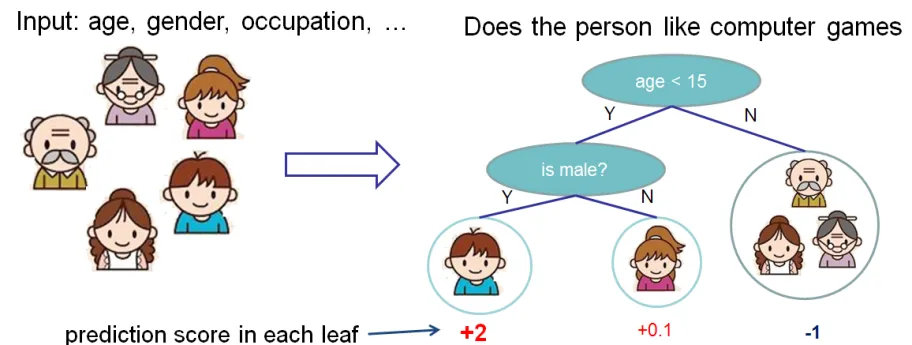

In [211]:
# menyimpan model terbaik
final_model = xgboost_tuning_recall.best_estimator_

# fitting best model
final_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('One-Hot Encoding',
                                                  OneHotEncoder(drop='first'),
                                                  ['hotel',
                                                   'arrival_date_month', 'meal',
                                                   'market_segment',
                                                   'distribution_channel',
                                                   'reserved_room_type',
                                                   'assigned_room_type',
                                                   'deposit_type',
                                                   'customer_type'])])),
                ('algorithm',
                 XGBClassifier(base_score=None, booster=None, cal...
                               eval_metric=None, feature_types=None, gamma=0,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=300, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=3,
                               max_depth=5, max_leaves=None, min_child_weight=3,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=434,
                               n_jobs=None, num_parallel_tree=None, ...))])

### `Feature Importances & SHAP`

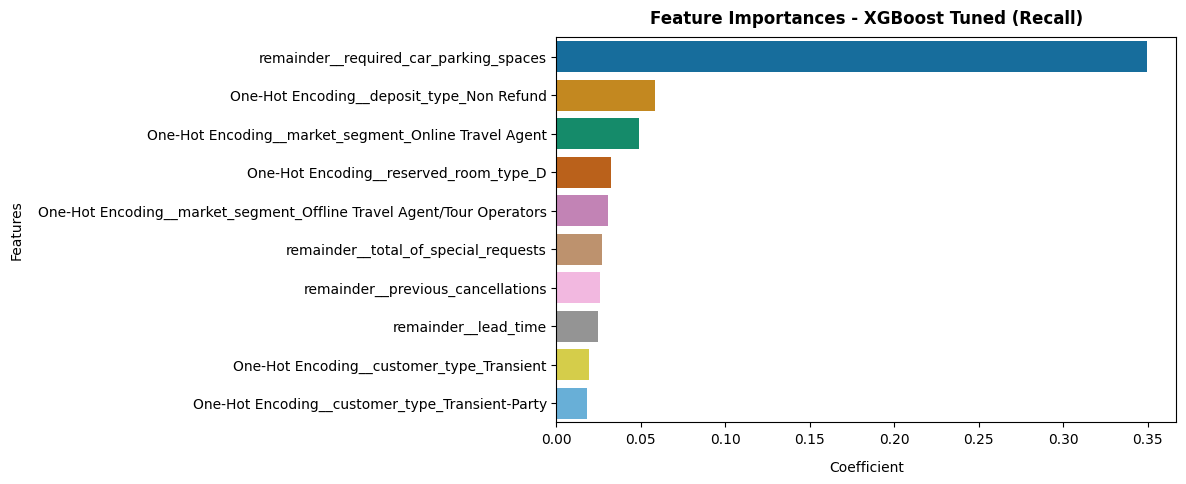

In [212]:
# menampilkan feature importances
feature_importances = pd.Series(final_model["algorithm"].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = False).head(10)

plt.figure(figsize = (8, 5))
sns.barplot(x = feature_importances.values, y = feature_importances.index)
plt.title("Feature Importances - XGBoost Tuned (Recall)", pad = 10, fontweight = "bold")
plt.xlabel("Coefficient", labelpad = 10)
plt.ylabel("Features", labelpad = 10)
plt.show()

Terlihat bahwa dalam model XGBoost yang kita gunakan memiliki beberapa *feature* atau kolom yang signifikansinya tinggi terhadap model, di antaranya yaitu `⁠ required_car_parking_spaces`, `deposit_type`⁠, dan `⁠ market_segment`⁠. Temuan ini cukup sesuai dengan hasil analisis kami, yang mana ketiga fitur tersebut memiliki korelasi dengan target sebagai berikut:
- Fitur `⁠required_car_parking_spaces` memiliki pengaruh paling besar, namun analisisnya menunjukkan bahwa tidak sepenuhnya sesuai dengan pola yang diharapkan. Jika berdasarkan hasil analisis, transaksi yang tidak membutuhkan lahan parkir mobil cenderung melakukan pembatalan pemesanan hotel.
- Fitur `⁠deposit_type` menunjukkan kecenderungan pembatalan pemesanan hotel jika tipe depositnya *Non Refund*.
- Fitur `market_segment` menunjukkan kecenderungan pembatalan pemesanan hotel pada kategori *Online Travel Agent*.


100%|===================| 68886/68959 [08:27<00:00]        

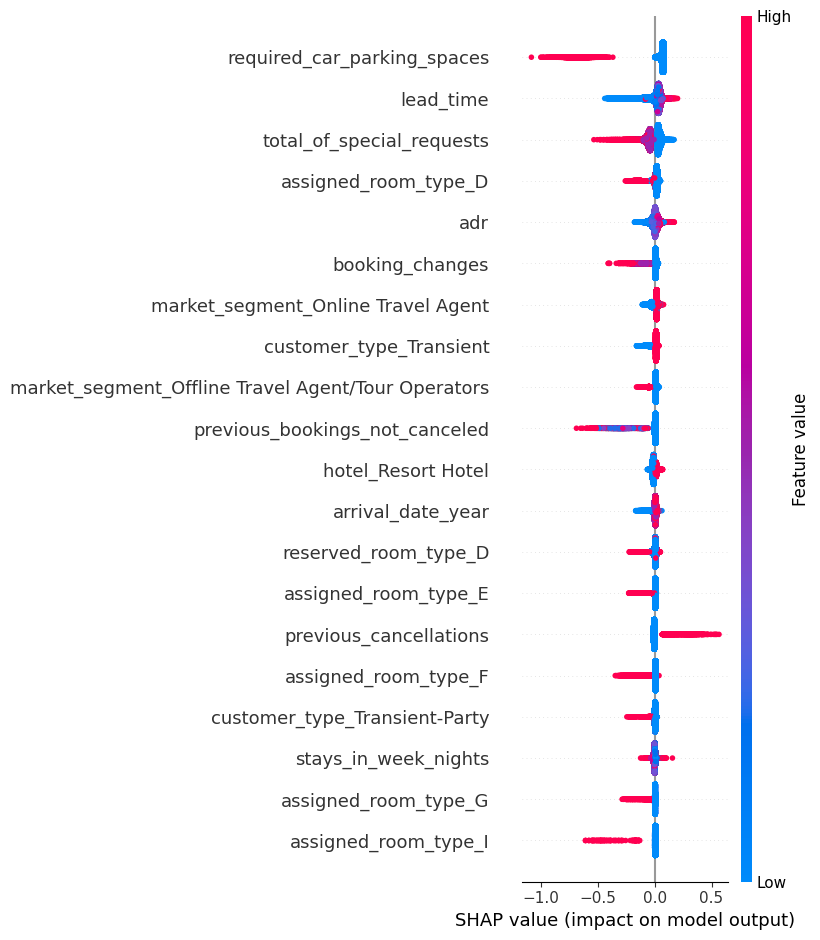

In [190]:
# menampilkan SHAP
X_train_encod = final_model[:-1].fit_transform(X_train)
onehot_feature = list(final_model[0].transformers_[0][1].get_feature_names_out())
remainder_feature = list(X_train.columns[final_model[0].transformers_[1][2]])
feature_names = onehot_feature + remainder_feature
shap_values = shap.TreeExplainer(final_model[-1], data = X_train_encod, feature_dependence = "independent", model_output = "probability").shap_values(X_train_encod)
shap.summary_plot(shap_values, X_train_encod, feature_names = feature_names)

Berdasarkan SHAP value di atas, kita melihat beberapa fitur yang penting diantaranya: 
- `required_car_parking_spaces`: Pengunjung yang tidak membutuhkan lahan parkir memiliki peluang melakukan pembatalan lebih tinggi. Semakin banyaknya lahan parkir yang dibutuhkan oleh pengunjung, maka akan semakin kecil peluangnya dalam melakukan pembatalan hotel.
- `lead_time`: Pemesan yang melakukan *booking* dengan jeda waktu yang lama, peluang melakukan pembatalan *booking* hotelnya akan semakin tinggi.
- `total_of_special_request`: Semakin sedikit jumlah permintan khusus yang dibuat oleh pelanggan kepada pihak hotel, maka akan semakin tinggi kemungkinan customer tersebut melakukan pembatalan booking. jika semakin banyak - permintaan spesial dari customer maka semakin kecil kemungkinan customer tersebut melakukan pembatalan booking hotel
- `assigned_room_type_D`: customer yang mendapatkan kamar type D dari penyedia hotel memiliki kemungkinan semakin kecil untuk melakukan pembatalan booking
- `adr`: transaksi dengan adr semakin besar memiliki kecenderungan untuk melakukan pembatalan hotel semakin tinggi dan semakin kecil biaya adr pada transaksi tersebut semakin kecil pula kecenderungan untuk melakukan pembatalan booking
- `booking_change`: semakin banyak customer melakukan booking change maka semakin kecil kemungkinan customer tersebut melakukan pembatalan pemesanan
- `market_segment_OnlineTravelAgent`: customer yang tidak menggunakan Online Travel Agent memiliki sedikit kemungkinan semakin kecil melakukan pembatalan pemesanan
- `customer_type_transient`: Customer yang bukan merupakan type transient cenderung akan lebih kecil kemungkinannya melakukan pembatalan pemesanan hotel

Dari interpretasi SHAP Value diatas memiliki hasil yang cukup sesuai dengan hasil analisa kami pada tahap

In [219]:
y_proba = final_model.predict_proba(X_test)[:,1]
df_proba = pd.DataFrame(final_model[0].transform(X_test), columns = feature_names)
df_proba["probability"] = y_proba
df_proba = df_proba.round({"probability" : 2})

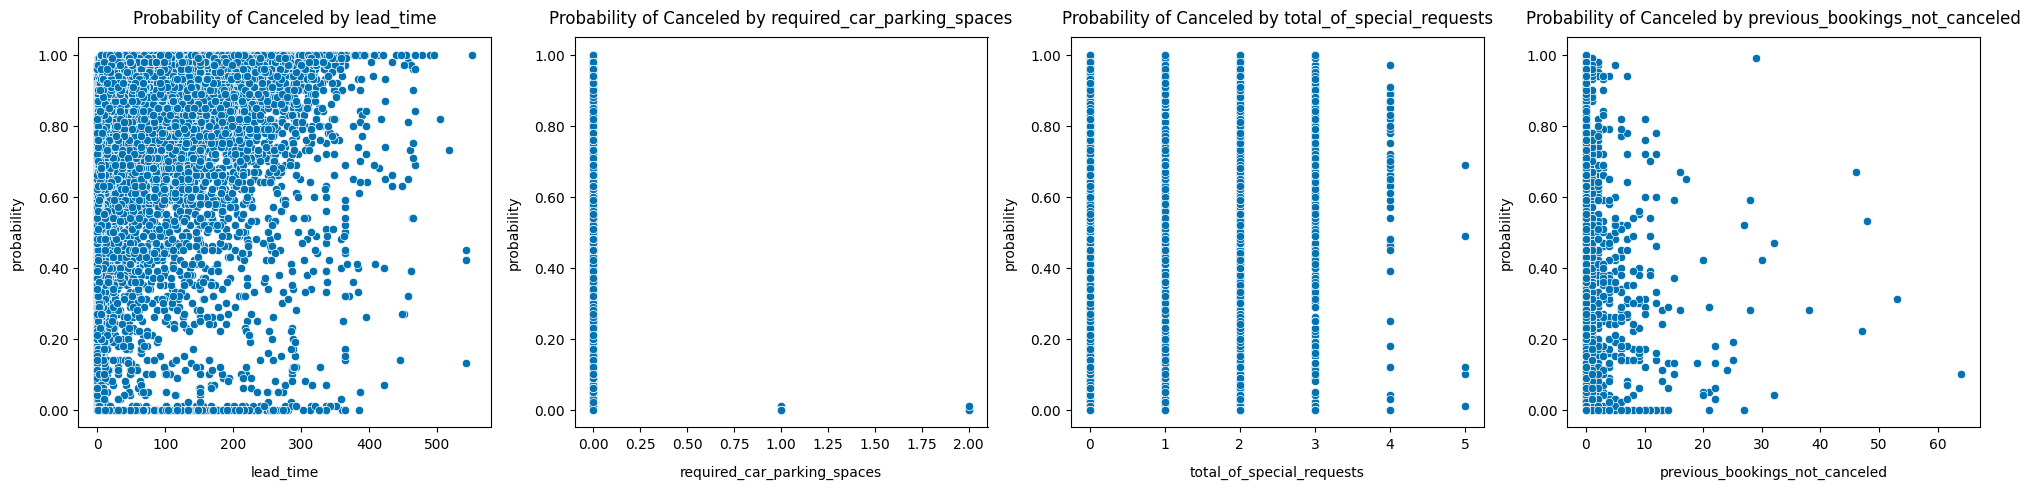

In [233]:
fig, axes = plt.subplots(1, 4, figsize = (20, 5)) 
for i, j in zip(["lead_time", "required_car_parking_spaces", "total_of_special_requests", "previous_bookings_not_canceled"], axes.flatten()):
    ax = sns.scatterplot(data = df_proba, x = i, y = "probability", ax = j)
    ax.set_title(f"Probability of Canceled by {i}", pad = 10)
    ax.set_xlabel(i, labelpad = 10)
    ax.set_ylabel("probability", labelpad = 10)
    ax.yaxis.set_major_formatter(FormatStrFormatter("%.2f"))
plt.tight_layout()
plt.show()

Dari *scatterplot* di atas, terlihat bahwa:
- `lead_time`: Probabilitas pembatalan pemesanan hotel akan semakin tinggi jika jarak antara tanggal pemesanan dengan tanggal yang dijadwalkan untuk *check-in* itu terlalu jauh.
- `required_car_parking_spaces`: Probabilitas pembatalan pemesanan hotel akan semakin rendah jika pemesan tidak memerlukan lahan parkir.
- `total_of_special_requests`: Tidak terdapat pola pada feature ini.
- `previous_bookings_not_canceled`: Orang yang tidak melakukan cancel di pemesanan sebelum-sebelumnya, probabilitasnya dalam membatalkan hotel cenderung rebih rendah.

### `Predict Probability vs. Actual`

In [234]:
# membuat dataframe berisi predict_proba
y_proba = final_model.predict_proba(X_test)[:,1]
df_proba = pd.DataFrame(y_test)
df_proba["probability"] = y_proba

In [235]:
# pengelompokan kelas probabilitas
def probability_range(data):
    if data < 0.1:
        probability_range = "0.0 - 0.1"
    elif 0.1 <= data < 0.2:
        probability_range = "0.1 - 0.2"
    elif 0.2 <= data < 0.3:
        probability_range = "0.2 - 0.3"
    elif 0.3 <= data < 0.4:
        probability_range = "0.3 - 0.4"
    elif 0.4 <= data < 0.5:
        probability_range = "0.4 - 0.5"
    elif 0.5 <= data < 0.6:
        probability_range = "0.5 - 0.6"
    elif 0.6 <= data < 0.7:
        probability_range = "0.6 - 0.7"
    elif 0.7 <= data < 0.8:
        probability_range = "0.7 - 0.8"
    elif 0.8 <= data < 0.9:
        probability_range = "0.8 - 0.9"
    else:
        probability_range = "0.9 - 1.0"
        
    return probability_range

df_proba.insert(1, "probability_range",value = "")
df_proba["probability_range"] = df_proba["probability"].apply(probability_range)

In [236]:
# membuat table distribusi is_canceled berdasarkan kolom probability_range
df_probability = df_proba.groupby(["probability_range", "is_canceled"]).size().unstack().reset_index()
df_probability["total"] = df_probability[1] + df_probability[0]
df_probability["actual_probability"] = (df_probability[1] / df_probability["total"]).round(2)
df_probability["predicted_probability"] = range(5, 105, 10)
df_probability["predicted_probability"] = df_probability["predicted_probability"] / 100
df_probability = df_probability.sort_values("probability_range", ascending = False)
df_probability

is_canceled probability_range     0     1  total  actual_probability  \
9            0.9 - 1.0         3581  3929  7510   0.52                 
8            0.8 - 0.9         2425  564   2989   0.19                 
7            0.7 - 0.8         1523  143   1666   0.09                 
6            0.6 - 0.7         1071  70    1141   0.06                 
5            0.5 - 0.6         678   30    708    0.04                 
4            0.4 - 0.5         577   22    599    0.04                 
3            0.3 - 0.4         426   11    437    0.03                 
2            0.2 - 0.3         311   7     318    0.02                 
1            0.1 - 0.2         239   5     244    0.02                 
0            0.0 - 0.1         1626  2     1628   0.00                 

is_canceled  predicted_probability  
9            0.95                   
8            0.85                   
7            0.75                   
6            0.65                   
5            0.55                   
4            0.45                   
3            0.35                   
2            0.25                   
1            0.15                   
0            0.05

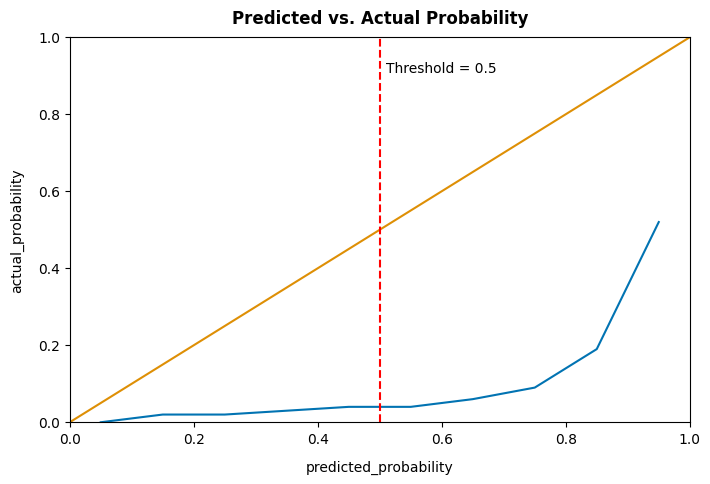

In [237]:
# hubungan antara predicted_probability dengan actual_probability
plt.figure(figsize = (8, 5))
sns.lineplot(data = df_probability.sort_values(by = "probability_range", ascending = True), x = "predicted_probability", y = "actual_probability")
value = [x / 100 for x in range(0, 110, 10)]
sns.lineplot(x = value, y = value)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.axvline(0.5, color = "r", linestyle = "--")
plt.annotate("Threshold = 0.5", (0.51, 0.91))
plt.title("Predicted vs. Actual Probability", pad = 10, fontweight = "bold")
plt.xlabel("predicted_probability", labelpad = 10)
plt.ylabel("actual_probability", labelpad = 10)
plt.show()

Berdasarkan grafik di atas terlihat bahwa :

- Semakin tinggi nilai `predict_probability`, maka persentase pemesanan yang aktualnya *cancel* akan semakin tinggi juga.
- Pada saat nilai `predict_probability` di bawah angka *threshold* (0.5), persentase pemesanan yang aktualnya *cancel* cenderung rendah, yaitu di bawah 5%. Dengan kata lain, model ini mampu memprediksi pemesanan yang tidak *cancel* dengan baik, sehingga jumlah pemesanan yang aktualnya *cancel* masih diprediksi tidak *cancel* (Jumlah *False Negative* hanya sekitar 47 transaksi).
- Namun disisi lain, ketika nilai `predict_probability`-nya di atas angka *threshold* (0.5), persentase transaksi yang aktualnya *cancel* berkisar di antara 6 - 48% saja. Dengan kata lain, model kita belum mampu memprediksi transaksi yang *cancel* dengan baik, terutama ketika nilai `predict_probability`-nya berkisar antara 0.5 - 0.8, sehingga jumlah transaksi yang aktualnya tidak *cancel* masih diprediksi *cancel* (Jumlah *False Positive* cukup tinggi, yaitu di angka 9.278 transaksi).

### `Cost Analysis`

In [1]:
fig, ax = plt.subplots(1, 1, figsize = (8, 5))
ConfusionMatrixDisplay.from_estimator(
    final_model,
    X_test,
    y_test,
    cmap = "rocket",
    ax = ax
)
plt.title("XGBoost Tuned (Recall)", fontweight = "bold")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

NameError: name 'plt' is not defined

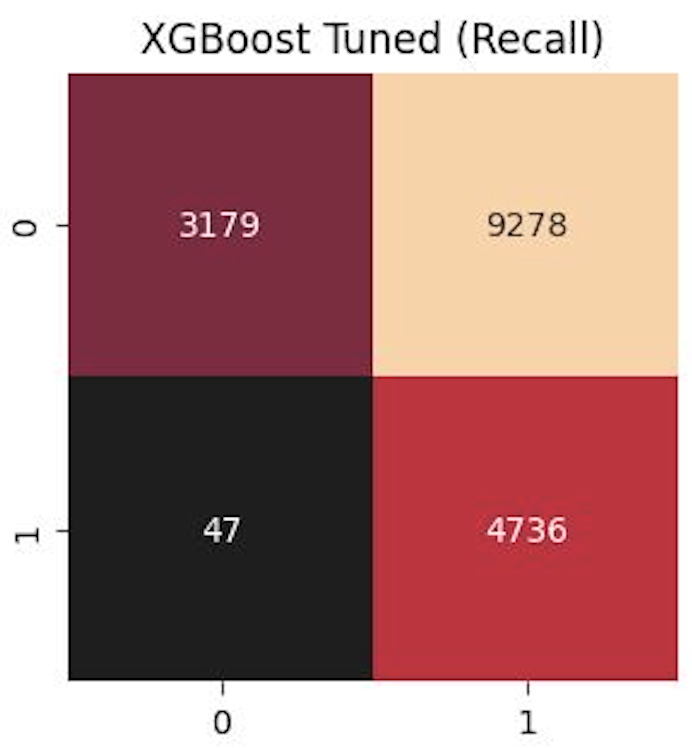

**RECALL**

Berdasarkan confusion matrix pada test set di atas terlihat bahwa dengan model XGBoost yang telah kita buat didapati:
- Pelanggan Hotel aktualnya cancel dan diprediksi akan cancel (True Positive) TP : 4736 orang
- Pelanggan Hotel aktualnya cancel dan diprediksi tidak akan cancel (False Negative) FN : 47 orang
- Pelanggan Hotel aktualnya tidak cancel dan diprediksi tidak akan cancel (True Negative) TN : 3179 orang
- Pelanggan Hotel aktualnya tidak cancel tetapi diprediksi akan cancel (False Positive) FP : 9278 orang

---

Tanpa Machine Learning

Saat kita tidak menggunakan machine learning, kita tidak dapat memprediksi customer yang melakukan cancel atau tidak. Dampaknya adalah tim marketing mengeluarkan biaya marketing untuk seluruh pelanggan.

Jumlah Pelanggan untuk dasar perhitungan :
- Biaya1 (Pelanggan yang diberikan penawaran oleh tim marketing adalah seluruh pelanggan) = 17240 orang (TP+FN+TN+FP)
- Biaya2 (Pelanggan yang aktualnya cancel) = 4783 (TP+FN)
- Pendapatan (Pelanggan yang aktual tidak cancel) = 12457 orang (TN+FP)

Profit Estimation
- Pendapatan - Biaya
- = (Pelanggan Aktual Tidak Cancel x Harga Kamar) - ( (Pelanggan Diberikan Penawaran x Biaya Marketing) + (Pelanggan Aktual Cancel x Harga Kamar) ) 
- = (12457 x 91.85 Euro) - (17240 x 10 Euro + 4783 x 91.85) = 532,457 Euro

Maka Total Income sekitar **532,457 Euro**

---
Saat kita menggunakan machine learning, kita hanya menawarkan penawaran marketing (double booking, promo lain, dll) yang diprediksi akan cancel saja.

Profit Estimation :

- Pendapatan - Biaya
- ( (TN x Harga kamar) + FP(Harga Kamar - Biaya Marketing) - ((FN x Harga Kamar) + (TP x Biaya Marketing[Double Booking, dll]) )
- = (3179 x 91.85 Euro + 9278(91.85 Euro - 10 Euro) - (47 x 91.85 Euro + 4736 x 10 Euro) = 1,000,455 Euro

Maka Total Income sekitar **1,000,455 Euro**

---
Total Income

Berdasarkan test set, model kita dapat meningkatkan keuntungan sekitar **467,998 Euro** atau keuntungan sekitar (1,000,455/532,457) **187%** jika menggunakan RECALL
Recall dapat memprediksi sekitar 99% data secara tepat

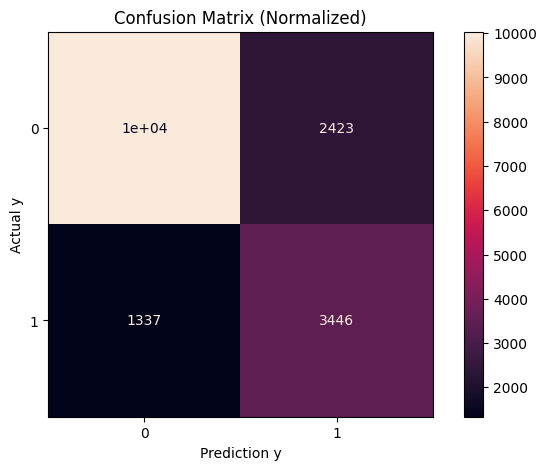

In [242]:
fig, ax = plt.subplots(1,1, figsize=(8, 5))
ConfusionMatrixDisplay.from_estimator(xgboost_tuning_precision.best_estimator_, X_test, y_test, cmap='rocket', ax=ax)

plt.xlabel('Prediction y')
plt.ylabel('Actual y')
plt.title('Confusion Matrix (Normalized)')

plt.show()

**PRECISION**

Berdasarkan confusion matrix pada test set di atas terlihat bahwa dengan model XGBoost yang telah kita buat didapati:
- Pelanggan Hotel aktualnya cancel dan diprediksi akan cancel (True Positive) TP : 3446 orang
- Pelanggan Hotel aktualnya cancel dan diprediksi tidak akan cancel (False Negative) FN : 1337 orang
- Pelanggan Hotel aktualnya tidak cancel dan diprediksi tidak akan cancel (True Negative) TN : 10034 orang
- Pelanggan Hotel aktualnya tidak cancel tetapi diprediksi akan cancel (False Positive) FP : 2423 orang

---

Tanpa Machine Learning

Saat kita tidak menggunakan machine learning, kita tidak dapat memprediksi customer yang melakukan cancel atau tidak. Dampaknya adalah tim marketing mengeluarkan biaya marketing untuk seluruh pelanggan.

Jumlah Pelanggan untuk dasar perhitungan :
- Biaya1 (Pelanggan yang diberikan penawaran oleh tim marketing adalah seluruh pelanggan) = 17240 orang (TP+FN+TN+FP)
- Biaya2 (Pelanggan yang aktualnya cancel) = 4783 (TP+FN)
- Pendapatan (Pelanggan yang aktual tidak cancel) = 12457 orang (TN+FP)

Profit Estimation
- Pendapatan - Biaya
- = (Pelanggan Aktual Tidak Cancel x Harga Kamar) - ( (Pelanggan Diberikan Penawaran x Biaya Marketing) + (Pelanggan Aktual Cancel x Harga Kamar) ) 
- = (12457 x 91.85 Euro) - (17240 x 10 Euro + 4783 x 91.85) = 532,457 Euro

Maka Total Income sekitar **532,457 Euro**

---
Saat kita menggunakan machine learning, kita hanya menawarkan penawaran marketing (double booking, promo lain, dll) yang diprediksi akan cancel saja.

Profit Estimation :

- Pendapatan - Biaya
- ( (TN x Harga kamar) + FP(Harga Kamar - Biaya Marketing) - ((FN x Harga Kamar) + (TP x Biaya Marketing[Double Booking, dll]) )
- = (10034 x 91.85 Euro + 2423(91.85 Euro - 10 Euro) - (1337 x 91.85 Euro + 3446 x 10 Euro) = 961,883 Euro

Maka Total Income sekitar **961,833 Euro**

---
Total Income

Berdasarkan test set, model kita dapat meningkatkan keuntungan sekitar **429,376 Euro** atau keuntungan sekitar (961,833/532,457) **180%** jika menggunakan PRECISION
Namun, Precision hanya dapat memprediksi 58% data secara tepat

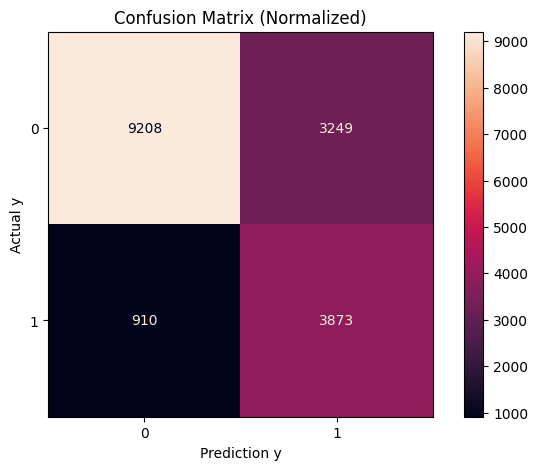

In [243]:
fig, ax = plt.subplots(1,1, figsize=(8, 5))
ConfusionMatrixDisplay.from_estimator(xgboost_tuning_f1.best_estimator_, X_test, y_test, cmap='rocket', ax=ax)

plt.xlabel('Prediction y')
plt.ylabel('Actual y')
plt.title('Confusion Matrix (Normalized)')

plt.show()

**F1**

Berdasarkan confusion matrix pada test set di atas terlihat bahwa dengan model XGBoost yang telah kita buat didapati:
- Pelanggan Hotel aktualnya cancel dan diprediksi akan cancel (True Positive) TP : 3873 orang
- Pelanggan Hotel aktualnya cancel dan diprediksi tidak akan cancel (False Negative) FN : 910 orang
- Pelanggan Hotel aktualnya tidak cancel dan diprediksi tidak akan cancel (True Negative) TN : 9208 orang
- Pelanggan Hotel aktualnya tidak cancel tetapi diprediksi akan cancel (False Positive) FP : 3249 orang

---

Tanpa Machine Learning

Saat kita tidak menggunakan machine learning, kita tidak dapat memprediksi customer yang melakukan cancel atau tidak. Dampaknya adalah tim marketing mengeluarkan biaya marketing untuk seluruh pelanggan.

Jumlah Pelanggan untuk dasar perhitungan :
- Biaya1 (Pelanggan yang diberikan penawaran oleh tim marketing adalah seluruh pelanggan) = 17240 orang (TP+FN+TN+FP)
- Biaya2 (Pelanggan yang aktualnya cancel) = 4783 (TP+FN)
- Pendapatan (Pelanggan yang aktual tidak cancel) = 12457 orang (TN+FP)

Profit Estimation
- Pendapatan - Biaya
- = (Pelanggan Aktual Tidak Cancel x Harga Kamar) - ( (Pelanggan Diberikan Penawaran x Biaya Marketing) + (Pelanggan Aktual Cancel x Harga Kamar) ) 
- = (12457 x 91.85 Euro) - (17240 x 10 Euro + 4783 x 91.85) = 532,457 Euro

Maka Total Income sekitar **532,457 Euro**

---
Saat kita menggunakan machine learning, kita hanya menawarkan penawaran marketing (double booking, promo lain, dll) yang diprediksi akan cancel saja.

Profit Estimation :

- Pendapatan - Biaya
- ( (TN x Harga kamar) + FP(Harga Kamar - Biaya Marketing) - ((FN x Harga Kamar) + (TP x Biaya Marketing[Double Booking, dll]) )
- = (9208 x 91.85 Euro + 3249(91.85 Euro - 10 Euro) - (910 x 91.85 Euro + 3873 x 10 Euro) = 989,371 Euro

Maka Total Income sekitar **989,371 Euro**

---
Total Income

Berdasarkan test set, model kita dapat meningkatkan keuntungan sekitar **456,914 Euro** atau keuntungan sekitar (989,371/532,457) **185%** jika menggunakan PRECISION
Namun, Precision hanya dapat memprediksi 58% data secara tepat

### `Evaluation Metrics for Bussiness`

| Metrics | Score Model | Keuntungan |
| --- | --- | --- |
| `Recall` | 0.99 | 467.998 |
| `Precision` | 0.58 | 429.376 |
| `F1 Score` | 0.65 | 456.914 |

- Berdasarkan kost analisis dan ketepatan prediksi model diatas Kami menggunakan model **RECALL** sebagai evaluation metrics pada Hotel Booking Demand Cancellation.
- Hal ini karena untuk penanganan kerugian nilai FP menggunakan Double booking bisa di minimalisasi sekitar 50% dari total konsumen yang diprediksi cancel untuk mengurangi negatif review dengan tidak menjangkau seluruh yang di prediksi cancel karena dapat ditangani oleh Tim Marketing dalam melakukan campaign.
- Pihak hotel juga tidak perlu memberikan deposit karena nilai FN yang kecil untuk menghindari Chargeback karena Hotel disini mayoritas tanpa melakukan deposit sehingga menggunakan deposit pada banyak pelanggan dapat mengakibatkan kehilangan konsumen. 
- Sedangkan jika menggunakan Presisi keuntungan dari double booking harus diseimbangakan dengan deposit yang mana cukup beresiko karena model hanya dapat memprediksi sekitar 58% secara tepat bgeitupula dengan F1 Score yang hanya dapat memprediksi datasets sebanyak 65%

### `Model Limitation`

Model ini hanya dapat digunakan pada rentang data yang digunakan pada pemodelan ini yaitu :

| Feature | Data Type | Limitasi |
| --- | --- | --- |
| `lead_time` | Integer | Jarak hari antara tanggal *booking* hotel hingga tanggal yang dijadwalkan untuk *check-in* di rentang 0-709 |
| `arrival_date_year` | Integer | Tahun dijadwalkan *check-in* di rentang 2015-2017 |
| `stays_in_weekend_nights` | Integer | Jumlah malam di akhir pekan (Sabtu atau Minggu) yang di-*booking* di rentang 0-19 |
| `stays_in_week_nights` | Integer | Jumlah malam dalam seminggu (Senin - Jum'at) yang di-*booking* di rentang 0-50 |
| `adults` | Integer | Jumlah orang dewasa di rentang 0-4 |
| `children` | Float | Jumlah anak-anak di rentang 0-10 |
| `babies` | Integer | Jumlah bayi di rentang 0-2 |
| `is_repeated_guest` | Integer | Nilai yang berasal dari pemesan yang berulang atau tidak di rentang 0-1 |
| `previous_cancellations` | Integer | Jumlah Pemesanan yang dibatalkan sebelumnya di rentang 0-26 |
| `previous_bookings_not_canceled` | Integer | Jumlah *booking* hotel sebelumnya yang tidak dibatalkan di rentang 0-72 |
| `booking_changes` | Integer | Jumlah perubahan yang dilakukan pada *booking* hotel di rentang 0-18 |
| `days_in_waiting_list` | Integer | Jumlah hari untuk setiap *booking* hotel yang masuk ke dalam *waiting list* di rentang 0-391 |
| `adr` | Float | Rata-rata tarif harian atau *Average Daily Rate* di rentang 0-510 |
| `required_car_parking_spaces` | Integer | Jumlah ruang parkir mobil yang dibutuhkan pemesan di rentang 0-3 |
| `total_of_special_requests` | Integer | Jumlah permintaan khusus yang dibuat oleh pemesan di rentang 0-5 |

## **CONCLUSION AND RECOMMENDATION**

### `Conclusion`

**Karakteristik customer & hotel terhadap tingkat pembatalan pemesanan hotel:**

1. Bagaimana karakteristik jarak hari dan waktu tertentu mempengaruhi kebiasaan pembatalan pemesanan hotel?
    - Pembatalan pemesanan hotel rentan dilakukan ketika antara **waktu pemesanan dengan waktu kedatangan jaraknya terlalu jauh** 
    - Waktu yang tingkat cancellationnya tinggi terjadi pada high season seperti liburan **summer season** atau kisaran bulan **Juli-September** (Festival Anggur)

2. Bagaimana karakteristik fasilitas dan pelayanan hotel mempengaruhi pelanggan dalam membatalkan pesanan hotel?
    - Jenis hotel **City hotel** memiliki proporsi lebih tinggi dilakukannya cancel
    - Customer hotel yang memesan paket **self catering** memiliki peluang lebih tinggi untuk melakukan pembatalan
    - **Car space parking** bukan menjadi faktor utama yang menyebabkan pengunjung melakukan pembatalan
    - Customer dengan **jumlah permintaan khusus** semakin banyak, maka jumlah maupun proporsi pembatalan hotel cenderung berkurang
    - Secara umum minat pelanggan cenderung tertuju pada tipe kamar A, D, dan E. sebagian pelanggan mendapatkan kamar yang tidak sesuai dengan permintaan saat melakukan pemesanan

3. Bagaimana karakteristik pelanggan yang melakukan pembatalan pemesanan hotel?
    - Semakin banyaknya jumlah **visitor**, proporsi tingkat pembatalan hotel cenderung semakin naik
    - Customer dengan kategori **transient** berpeluang lebih besar melakukan pembatalan pemesanan
    - Pelanggan yang **sebelumnya melakukan pembatalan** memiliki persentase pembatalan yang lebih tinggi pada transaksi berikutnya
    - Pelanggan yang **belum pernah melakukan pemesanan ulang** lebih besar daripada pelanggan yang telah **melakukan pemesanan ulang**
    - Pelanggan dengan persentase tertinggi yang berpeluang melakukan *cancel* ada pada pelanggan yang memilih kategori **Non Refund**, sedangkan mayoritas pelanggan menggunakan **No Deposit**
    - Mayoritas pemesan merupakan pelanggan lokal (portugal) dengan persentase pembatalan oleh pelanggan mencapai 36,49% dari 26.588 transaksi yang berasal dari negara tersebut dengan karakteristik **Non Refund** dan type customer **Contact** untuk diwilayah portugal

**Karakteristik Model Machine Learning yang didapat:**

Berdasarakan analisis dan penegmbangan model yang telah dilakukan, model prediktif yang mampu mengidentifikasi customer yang memiliki potensi melakukan cancel didapat menggunakan algoritma XGBoost dengan parameter `Scale_post_weight`. 
- Parameter ini digunakan untuk imbalance data dengan `Scale_post_weight`: 30. 
- Hyperparameter tuning dilakukan untuk mendapatkan nilai metriks evaluasi yang maksimal dengan mengontrol kompleksitas model secara langsung dengan `min_child_weight`: 3 dan `gamma`: 0 
- Beberapa Fitur yang paling berpengaruh terhadap target (Is_canceled) diantaranya `required_car_parking_spaces`, `deposit_type`, dan `market_segment`
- Interpretasi SHAP Untuk model XGBoost :
    - `required_car_parking_spaces`: Customer yang meminta lahan parkir mobil semakin banyak akan semakin kecil kemungkinannya melakukan pembatalan hotel
    - `lead_time`: customer hotel yang melakukan booking dengan jeda waktu yang lama akan semakin besar potensi melakukan pembatalan booking hotel
    - `total_of_special_request`: semakin sedikit permintan spesial dari customer terhadap penyedia hotel semakin tinggi kemungkinan customer tersebut melakukan pembatalan booking
    

- Model XGBoost yang dipilih pada metrics evaluation ini adalah **RECALL** karena memiliki score sebesar **99%** dan memberikan keuntungan yang cukup besar dari segi Bisnis jika dilihat melalui Cost Analysis.
- Sebelum menggunakan machine learning, Tim Marketing memberikan penawaran (Double Booking) yang berefek pada penanganan negatif review atau promo bundling lain secara acak. Dengan Machine learning kita bisa memprioritaskan kepada Pelangganan Potensial untuk menghemat budget.
- Kita juga dapat membuat campaign dengan target audience yang lebih terarah dan terukur dengan adanya machine learning.

Selain itu juga **RECALL** memberikan penanganan nilai error yang cenderung lebih aman untuk dataset ini karena Hotel ini tidak memakai deposit untuk menghindari chargeback sehingga meminimalisasi FN adalah langkah yang tepat. Score 99 artinya bahwa model mampu mengidentifikasi dan menangkap data yang memiliki potensi pembatalan booking hotel dengan baik sesuai dengan tujuan penelitian yang dilakukan.

### `Recommendation`

Analisis :
- Berdasarkan jeda waktu pemesan terhadap kedatangan booking kami merekomendasikan untuk pihak hotel membatasi waktu pemesanan ke waktu check in maksimal tidak lebih dari setahun 
- Menerapkan sistem reschedule/refund terhadap customer dengan maksimal hari pengajuan, dan memberikan kebijakan proporsional penalty terhadap customer yang melakukan cancellation mendekati waktu check in
- Untuk meningkatkan revenue perusahaan akibat pembatalan pemesanan, pihak hotel dapat menerapkan untuk melakukan konfirmasi kedatangan terhadap customer pada H-1 tanggal kedatangan. Apabila dikonfirmasi pelanggan melakukan cancel, maka pihak hotel dapat menjual kembali kamar yang tersedia. Dan apabila konfirmasi terjadi bersamaan pada tanggal kedatngan maka pihak hotel dapat menjual kamar tersebut dengan harga flash sale agar dapat tetap mendapatkan keuntungan
- Menerapkan sistem double booking pada high season atau pada bulan rentan tinggi  terjadinya cancel seperti pada bulan Agustus
- Merekomendasikan tim marketing untuk memberikan penawaran menarik berupa promosi free sarapan untuk pemesan self catering yang melakukan cancel
- Untuk mengurangi tingkat cancellation pada kasus no deposit, pihak hotel menerapkan pembayaran dimuka dan mengahapus kebijakan no deposit diganti dengan kebijakan reschedule
- Tim penyedia layanan hotel untuk menawarkan kebutuhan special request kepada pemesan yang tidak melakukan special request terlebih dahulu
- Membuat paket promo seperti iklan yang ditargetkan kepada akun sosial media pribadi berupa promo liburan atau promo akhir pekan dengan target audience type customer transient karena customer dengan type transient paling banyak melakukan pembatalan hotel, customer tersebut banyak melakukan pemesanan pada saat weekend sehingga kami merekomendasikan promo akhir pekan

Modeling:
- Melakukan pemodelan dengan menggunakan feature selection.
- Mendeploy machine learning menggunakan streamlit.
- Mencoba pemodelan dengan menggunakan algoritma machine learning yang lain (Misalnya seperti CatBoost, SVM, dll.).
- Melakukan penambahan data pada kelas minoritas (transaksi yang tidak cancel) agar dapat membantu meningkatkan performa model.

# **`Save Model`**

In [ ]:
final_model.fit(X, y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('One-Hot Encoding',
                                                  OneHotEncoder(drop='first'),
                                                  ['hotel',
                                                   'arrival_date_month', 'meal',
                                                   'market_segment',
                                                   'distribution_channel',
                                                   'reserved_room_type',
                                                   'assigned_room_type',
                                                   'deposit_type',
                                                   'customer_type'])])),
                ('algorithm',
                 XGBClassifier(base_score=None, booster=None, cal...
                               eval_metric=None, feature_types=None, gamma=0,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=300, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=3,
                               max_depth=5, max_leaves=None, min_child_weight=3,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=434,
                               n_jobs=None, num_parallel_tree=None, ...))])

In [ ]:
pickle.dump(final_model, open("final_model_for_hotel_booking_demand.sav", "wb"))

# **`Load Model`**

In [ ]:
model_loaded = pickle.load(open('final_model_for_hotel_booking_demand.sav','rb'))

# **`Predict Model`**

In [ ]:
df_test_1 = pd.DataFrame({
    "hotel" : ["City Hotel"], 
    "lead_time" : [69], 
    "arrival_date_year" : [2015], 
    "arrival_date_month" : ["January"], 
    "stays_in_weekend_nights" : [2], 
    "stays_in_week_nights" : [10], 
    "adults" : [2],
    "children" : [1], 
    "babies" : [0], 
    "meal" : ["Half Board"], 
    "market_segment" : ["Direct"], 
    "distribution_channel" : ["Corporate"], 
    "is_repeated_guest" : [0],
    "previous_cancellations" : [1], 
    "previous_bookings_not_canceled" : [2], 
    "reserved_room_type" : ["A"], 
    "assigned_room_type" : ["A"],
    "booking_changes" : [4],
    "deposit_type" : ["No Deposit"],
    "days_in_waiting_list" : [2],
    "customer_type" : ["Transient"],
    "adr" : [169],
    "required_car_parking_spaces" : [2],
    "total_of_special_requests" : [4]
})

# print sample data
display(df_test_1)

# predict that data
print("Predict proba: ",model_loaded.predict_proba(df_test_1))
print("Predict range: ",model_loaded.predict(df_test_1))

hotel  lead_time  arrival_date_year arrival_date_month  \
0  City Hotel  69         2015               January             

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0  2                        10                    2       1         0        

         meal market_segment distribution_channel  is_repeated_guest  \
0  Half Board  Direct         Corporate            0                   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0  1                       2                               A                   

  assigned_room_type  booking_changes deposit_type  days_in_waiting_list  \
0  A                  4                No Deposit   2                      

  customer_type  adr  required_car_parking_spaces  total_of_special_requests  
0  Transient     169  2                            4

Predict proba:  [[9.990100e-01 9.899829e-04]]
Predict range:  [0]


In [ ]:
df_test_2 = pd.DataFrame({
    "hotel" : ["Resort Hotel"], 
    "lead_time" : [9], 
    "arrival_date_year" : [2016], 
    "arrival_date_month" : ["August"], 
    "stays_in_weekend_nights" : [2], 
    "stays_in_week_nights" : [10], 
    "adults" : [5],
    "children" : [0], 
    "babies" : [0], 
    "meal" : ["Bed and Breakfast"], 
    "market_segment" : ["Direct"], 
    "distribution_channel" : ["Travel Agent/Tour Operators"], 
    "is_repeated_guest" : [0],
    "previous_cancellations" : [1], 
    "previous_bookings_not_canceled" : [2], 
    "reserved_room_type" : ["A"], 
    "assigned_room_type" : ["D"],
    "booking_changes" : [4],
    "deposit_type" : ["No Deposit"],
    "days_in_waiting_list" : [2],
    "customer_type" : ["Transient-Party"],
    "adr" : [169],
    "required_car_parking_spaces" : [2],
    "total_of_special_requests" : [4]
})

# print sample data
display(df_test_2)

# predict that data
print("Predict proba: ",model_loaded.predict_proba(df_test_2))
print("Predict range: ",model_loaded.predict(df_test_2))

hotel  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel  9          2016               August              

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0  2                        10                    5       0         0        

                meal market_segment         distribution_channel  \
0  Bed and Breakfast  Direct         Travel Agent/Tour Operators   

   is_repeated_guest  previous_cancellations  previous_bookings_not_canceled  \
0  0                  1                       2                                

  reserved_room_type assigned_room_type  booking_changes deposit_type  \
0  A                  D                  4                No Deposit    

   days_in_waiting_list    customer_type  adr  required_car_parking_spaces  \
0  2                     Transient-Party  169  2                             

   total_of_special_requests  
0  4

Predict proba:  [[9.9963188e-01 3.6811468e-04]]
Predict range:  [0]
